Finans tweetlerinin pozitif veya negatif olduğunun tespiti

In [ ]:
%cd /content/drive/My Drive/Bitirme/Datasets/
df=pd.read_csv("PreprocessedSon2_df.csv",index_col=0)


# [1. Ön işleme Yok](#b1)

* #### [Kütüphanelerin Yüklenmesi ve Veri Seti İşlemleri](#b1)

###### [1.Kütüphaneler yüklenmesi](#b1)

In [ ]:
# Gerekli kütüphaneleri belirtilen versiyonlarda kur
!pip install --upgrade --no-cache-dir numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 pandas==2.2.2 tensorflow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 tensorflow-decision-forests==1.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Gerekli kütüphaneler
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

#from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential


In [ ]:
"""from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping"""


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


######[Dosyanın Yüklenmesi ve veri setinin incelenmesi](#b1)

In [ ]:
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bitirme/Datasets/
#df=pd.read_csv("Loan.csv",index_col=0)


""" # Yeni Bir dosya kaydetme koddunu buraya yazıyoruz
PreprocessedSon2_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon2_df.csv'
df.to_csv(PreprocessedSon2_df_file_path, index=False)"""


Mounted at /content/drive
/content/drive/My Drive/Bitirme/Datasets


" # Yeni Bir dosya kaydetme koddunu buraya yazıyoruz\nPreprocessedSon2_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon2_df.csv'\ndf.to_csv(PreprocessedSon2_df_file_path, index=False)"

In [ ]:
"""
Kaggle API ile yükleme
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'"""

"\nKaggle API ile yükleme\nimport numpy as np\nimport pandas as pd\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\nos.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'"

In [ ]:
df=pd.read_csv("PreprocessedSon2_df.csv",index_col=0)

In [ ]:
df3=pd.read_csv("IMDB_df.csv",index_col=0)

In [ ]:
df2=pd.read_csv("USAir_balanced_df.csv",index_col=0)

In [ ]:
df4=pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
df2

score
text                                                                                                                                       
At Wipro, growth remains a mirage                                                                                                        -1
Why Chinese stocks leave US investors vulnerable                                                                                         -1
US stocks finish mixed amid more tech selling                                                                                            -1
Opec reduces estimate on oil demand growth                                                                                               -1
Immediate support for rupee is placed at 55.10: Bonanza                                                                                  -1
...                                                                                                                                     ...
It will also strengthen Ruukki 's offshore business .                                                                                     1
APL Apollo Tubes hits record high; HDFC MF buys shares                                                                                    1
`` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . ''       1
Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral                                                                           1
Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth                                            1

[14741 rows x 1 columns]

In [ ]:
df.head()

Text  \
index                                                            
0                            At Wipro, growth remains a mirage   
1             Why Chinese stocks leave US investors vulnerable   
2                US stocks finish mixed amid more tech selling   
3                   Opec reduces estimate on oil demand growth   
4      Immediate support for rupee is placed at 55.10: Bonanza   

                                                                  tokens  \
index                                                                      
0                             ["['Micro', 'growth', 'remain', 'murat']"]   
1      ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2           ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3         ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4       ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

       text_length                                        hibrit  \
index                                                              
0               33                   wipro growth remains mirage   
1               48  chinese stocks leave us investors vulnerable   
2               45      us stocks finish mixed amid tech selling   
3               42       opec reduces estimate oil demand growth   
4               55        immediate support rupee placed bonanza   

                               USAirPrePro  \
index                                        
0                wipro growth remain mirag   
1      chines stock leav u investor vulner   
2        u stock finish mix amid tech sell   
3       opec reduc estim oil demand growth   
4        immedi support rupe place bonanza   

                                    USAirPrePro2  \
index                                              
0                    wipro growth remains mirage   
1      chinese stock leave u investor vulnerable   
2         u stock finish mixed amid tech selling   
3        opec reduces estimate oil demand growth   
4         immediate support rupee placed bonanza   

                                      MuammerNLPPrePRro  \
index                                                     
0                        At Wipro growth remains mirage   
1      Why Chinese stocks leave US investors vulnerable   
2         US stocks finish mixed amid more tech selling   
3            Opec reduces estimate on oil demand growth   
4      Immediate support for rupee is placed at Bonanza   

                                            MuammerNLPPrePRro2  \
index                                                            
0                            At Wipro, growth remains a mirage   
1             Why Chinese stocks leave US investors vulnerable   
2                US stocks finish mixed amid more tech selling   
3                   Opec reduces estimate on oil demand growth   
4      Immediate support for rupee is placed at 55.10: Bonanza   

                      MuammerNLPLSTMPrePRro  score  
index                                               
0               wipro , growth remain mirag     -1  
1      chines stock leav us investor vulner     -1  
2        us stock finish mix amid tech sell     -1  
3        opec reduc estim oil demand growth     -1  
4         immedi support rupe place bonanza     -1

In [ ]:
#df2 = df2.reset_index()

In [ ]:

df = df.reset_index()
df.isnull().values.any()

df.head()

index                                                     Text  \
0      0                        At Wipro, growth remains a mirage   
1      1         Why Chinese stocks leave US investors vulnerable   
2      2            US stocks finish mixed amid more tech selling   
3      3               Opec reduces estimate on oil demand growth   
4      4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  
0           wipro , growth remain mirag     -1  
1  chines stock leav us investor vulner     -1  
2    us stock finish mix amid tech sell     -1  
3    opec reduc estim oil demand growth     -1  
4     immedi support rupe place bonanza     -1

In [ ]:
df.columns

Index(['index', 'Text', 'tokens', 'text_length', 'hibrit', 'USAirPrePro',
       'USAirPrePro2', 'MuammerNLPPrePRro', 'MuammerNLPPrePRro2',
       'MuammerNLPLSTMPrePRro', 'score'],
      dtype='object')

In [ ]:
df = df.drop(columns=['index'])


In [ ]:
df.shape

(14741, 10)

In [ ]:
print(len(df))

14741


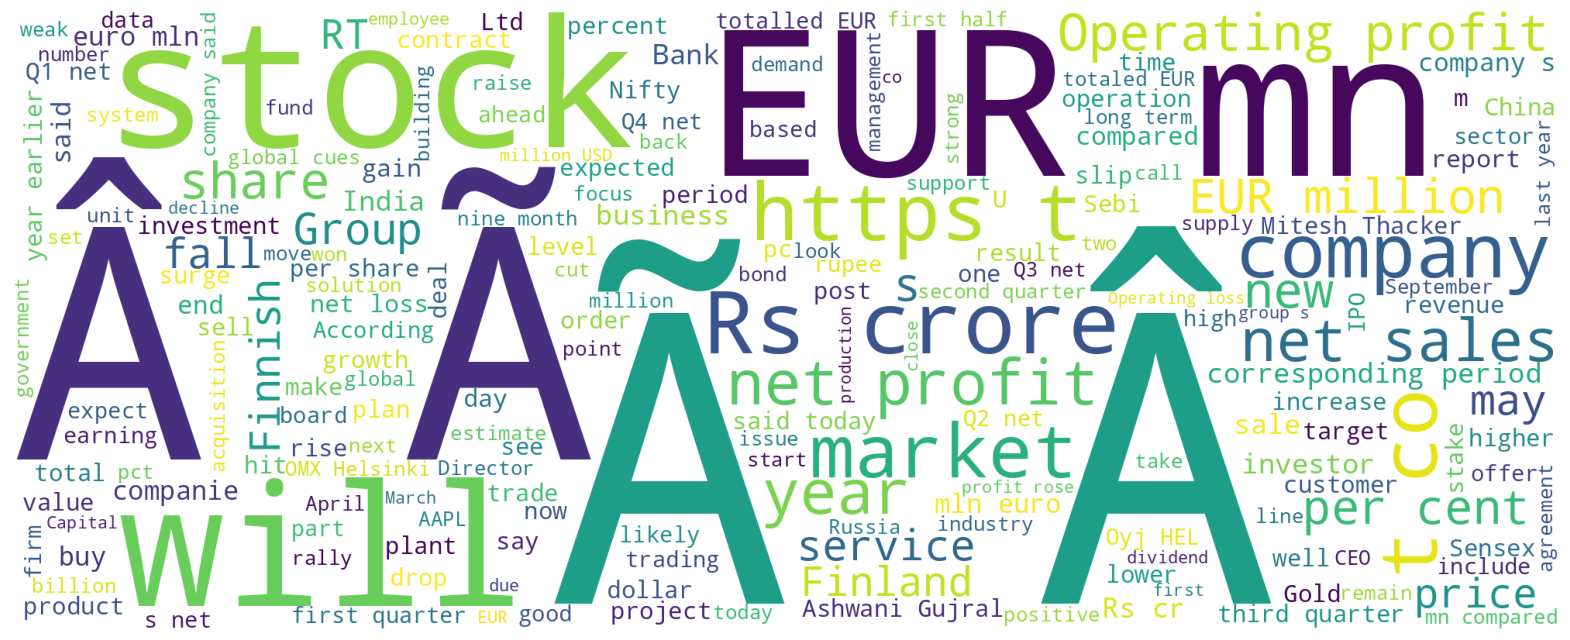

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in df.Text)
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

1.Kütüphaneler yüklenmesi

* #### [BOW](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)
    * #### [Decission Tree](#log)
    * #### [Random Forest](#log)
    
    

###### [1.Kütüphaneler yüklenmesi](#b1)

In [ ]:
# Gerekli kütüphaneleri belirtilen versiyonlarda kur
!pip install --upgrade --no-cache-dir numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 pandas==2.2.2 tensorflow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 tensorflow-decision-forests==1.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Gerekli kütüphaneler
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

#from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential


In [ ]:
"""from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping"""


'from tensorflow.keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM\nfrom tensorflow.keras.callbacks import EarlyStopping'

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


######[Dosyanın Yüklenmesi ve veri setinin incelenmesi](#b1)

In [ ]:
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bitirme/Datasets/
#df=pd.read_csv("Loan.csv",index_col=0)


""" # Yeni Bir dosya kaydetme koddunu buraya yazıyoruz
PreprocessedSon2_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon2_df.csv'
df.to_csv(PreprocessedSon2_df_file_path, index=False)"""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Bitirme/Datasets


In [ ]:
df=pd.read_csv("PreprocessedSon2_df.csv",index_col=0)

In [ ]:
df3=pd.read_csv("IMDB_df.csv",index_col=0)

In [ ]:
df2=pd.read_csv("USAir_balanced_df.csv",index_col=0)

In [ ]:
df4=pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
df2

text  \
0                                                                                                         At Wipro, growth remains a mirage   
1                                                                                          Why Chinese stocks leave US investors vulnerable   
2                                                                                             US stocks finish mixed amid more tech selling   
3                                                                                                Opec reduces estimate on oil demand growth   
4                                                                                   Immediate support for rupee is placed at 55.10: Bonanza   
...                                                                                                                                     ...   
14736                                                                                It will also strengthen Ruukki 's offshore business .    
14737                                                                                APL Apollo Tubes hits record high; HDFC MF buys shares   
14738  `` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . ''    
14739                                                                       Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral   
14740                                        Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth   

       score  
0         -1  
1         -1  
2         -1  
3         -1  
4         -1  
...      ...  
14736      1  
14737      1  
14738      1  
14739      1  
14740      1  

[14741 rows x 2 columns]

In [ ]:
df.head()

Text  \
index                                                            
0                            At Wipro, growth remains a mirage   
1             Why Chinese stocks leave US investors vulnerable   
2                US stocks finish mixed amid more tech selling   
3                   Opec reduces estimate on oil demand growth   
4      Immediate support for rupee is placed at 55.10: Bonanza   

                                                                  tokens  \
index                                                                      
0                             ["['Micro', 'growth', 'remain', 'murat']"]   
1      ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2           ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3         ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4       ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

       text_length                                        hibrit  \
index                                                              
0               33                   wipro growth remains mirage   
1               48  chinese stocks leave us investors vulnerable   
2               45      us stocks finish mixed amid tech selling   
3               42       opec reduces estimate oil demand growth   
4               55        immediate support rupee placed bonanza   

                               USAirPrePro  \
index                                        
0                wipro growth remain mirag   
1      chines stock leav u investor vulner   
2        u stock finish mix amid tech sell   
3       opec reduc estim oil demand growth   
4        immedi support rupe place bonanza   

                                    USAirPrePro2  \
index                                              
0                    wipro growth remains mirage   
1      chinese stock leave u investor vulnerable   
2         u stock finish mixed amid tech selling   
3        opec reduces estimate oil demand growth   
4         immediate support rupee placed bonanza   

                                      MuammerNLPPrePRro  \
index                                                     
0                        At Wipro growth remains mirage   
1      Why Chinese stocks leave US investors vulnerable   
2         US stocks finish mixed amid more tech selling   
3            Opec reduces estimate on oil demand growth   
4      Immediate support for rupee is placed at Bonanza   

                                            MuammerNLPPrePRro2  \
index                                                            
0                            At Wipro, growth remains a mirage   
1             Why Chinese stocks leave US investors vulnerable   
2                US stocks finish mixed amid more tech selling   
3                   Opec reduces estimate on oil demand growth   
4      Immediate support for rupee is placed at 55.10: Bonanza   

                      MuammerNLPLSTMPrePRro  score  
index                                               
0               wipro , growth remain mirag     -1  
1      chines stock leav us investor vulner     -1  
2        us stock finish mix amid tech sell     -1  
3        opec reduc estim oil demand growth     -1  
4         immedi support rupe place bonanza     -1

In [ ]:
#df2 = df2.reset_index()

In [ ]:

df = df.reset_index()
df.isnull().values.any()

df.head()

index                                                     Text  \
0      0                        At Wipro, growth remains a mirage   
1      1         Why Chinese stocks leave US investors vulnerable   
2      2            US stocks finish mixed amid more tech selling   
3      3               Opec reduces estimate on oil demand growth   
4      4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  
0           wipro , growth remain mirag     -1  
1  chines stock leav us investor vulner     -1  
2    us stock finish mix amid tech sell     -1  
3    opec reduc estim oil demand growth     -1  
4     immedi support rupe place bonanza     -1

In [ ]:
df.columns

Index(['Text', 'tokens', 'text_length', 'hibrit', 'USAirPrePro',
       'USAirPrePro2', 'MuammerNLPPrePRro', 'MuammerNLPPrePRro2',
       'MuammerNLPLSTMPrePRro', 'score', 'Comment', 'oh_label'],
      dtype='object')

In [ ]:
df = df.drop(columns=['index'])


In [ ]:
df.shape

(14741, 11)

In [ ]:
print(len(df))

14741


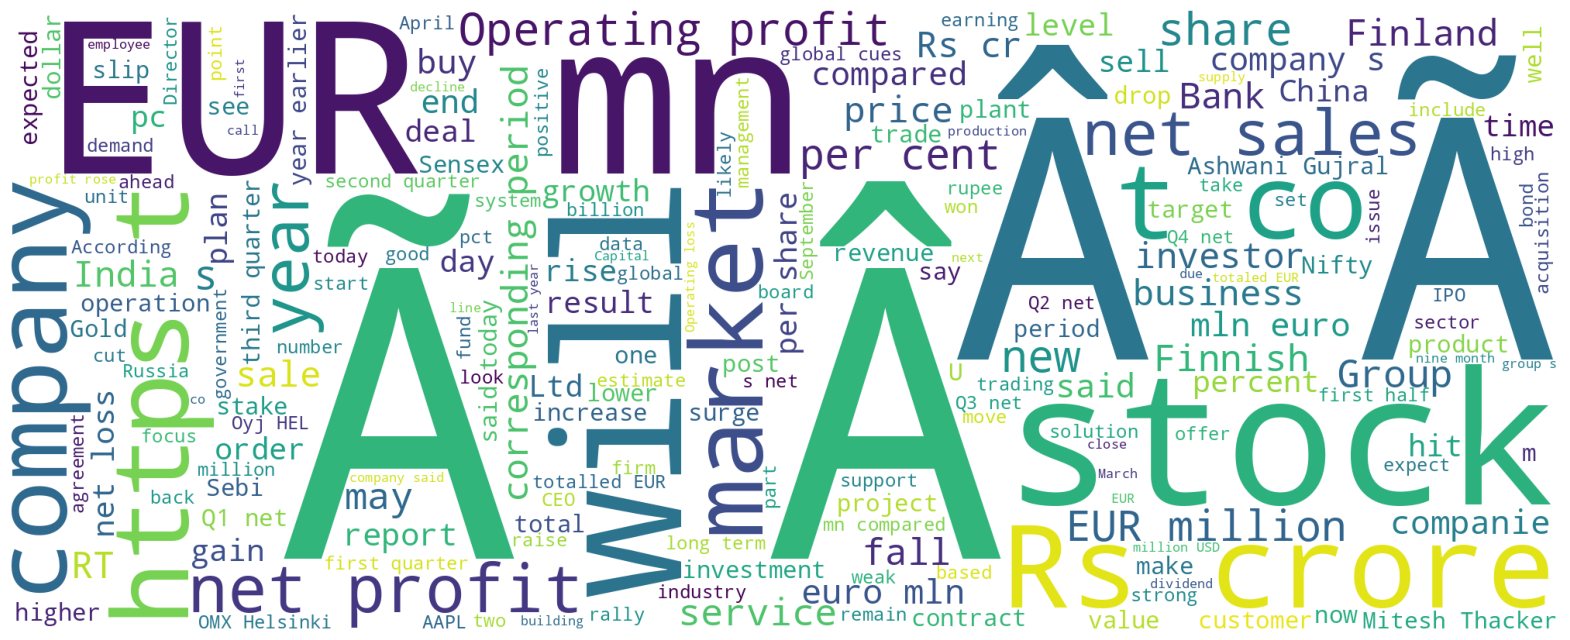

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in df.Text)
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
df['Comment']=df['Text'].apply(str)

In [ ]:
X = []
sentences = list(df['Comment'])
for sen in sentences:
    X.append(preprocess_text(sen))

KeyError: 'Comment'

In [ ]:
x=df['Text']

In [ ]:
df['Text']

0                                                                                                           At Wipro, growth remains a mirage
1                                                                                            Why Chinese stocks leave US investors vulnerable
2                                                                                               US stocks finish mixed amid more tech selling
3                                                                                                  Opec reduces estimate on oil demand growth
4                                                                                     Immediate support for rupee is placed at 55.10: Bonanza
                                                                         ...                                                                 
14736                                                                                  It will also strengthen Ruukki 's offshore business . 
14737                                                                                  APL Apollo Tubes hits record high; HDFC MF buys shares
14738    `` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . '' 
14739                                                                         Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral
14740                                          Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth
Name: Text, Length: 14741, dtype: object

In [ ]:
# Artık sadece Text kolonunu al
X = df['Text']


0                          At Wipro, growth remains a mirage
1           Why Chinese stocks leave US investors vulnerable
2              US stocks finish mixed amid more tech selling
3                 Opec reduces estimate on oil demand growth
4    Immediate support for rupee is placed at 55.10: Bonanza
Name: Text, dtype: object


In [ ]:
X

0                                                                                                           At Wipro, growth remains a mirage
1                                                                                            Why Chinese stocks leave US investors vulnerable
2                                                                                               US stocks finish mixed amid more tech selling
3                                                                                                  Opec reduces estimate on oil demand growth
4                                                                                     Immediate support for rupee is placed at 55.10: Bonanza
                                                                         ...                                                                 
14736                                                                                  It will also strengthen Ruukki 's offshore business . 
14737                                                                                  APL Apollo Tubes hits record high; HDFC MF buys shares
14738    `` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . '' 
14739                                                                         Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral
14740                                          Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth
Name: Text, Length: 14741, dtype: object

In [ ]:
X

0                                                                                                           At Wipro, growth remains a mirage
1                                                                                            Why Chinese stocks leave US investors vulnerable
2                                                                                               US stocks finish mixed amid more tech selling
3                                                                                                  Opec reduces estimate on oil demand growth
4                                                                                     Immediate support for rupee is placed at 55.10: Bonanza
                                                                         ...                                                                 
14736                                                                                  It will also strengthen Ruukki 's offshore business . 
14737                                                                                  APL Apollo Tubes hits record high; HDFC MF buys shares
14738    `` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . '' 
14739                                                                         Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral
14740                                          Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth
Name: Text, Length: 14741, dtype: object

In [ ]:
df['oh_label']=df['score']

In [ ]:
y = df['oh_label']

######[Train Test Ayrımının yapılması](#b1)

%30-70

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
from sklearn import  preprocessing

In [ ]:
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

###### BOW

In [ ]:
#feature extraction with Tf-idf vectorizer

#feature extraction with BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(X_train)

train_vectors = vectorizer.transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(13266, 10000) (1475, 10000)


###### NB

In [ ]:
#use ML algorithms classifier
#use a Naive Bayes Classifier and train the model on the training set.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("Naive Bayes Accuracy Score -> ", accuracy_score(y_test,predicted)*100)


Naive Bayes Accuracy Score ->  78.50847457627118


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       479
           1       0.83      0.74      0.78       518
           2       0.78      0.77      0.77       478

    accuracy                           0.79      1475
   macro avg       0.79      0.79      0.78      1475
weighted avg       0.79      0.79      0.78      1475



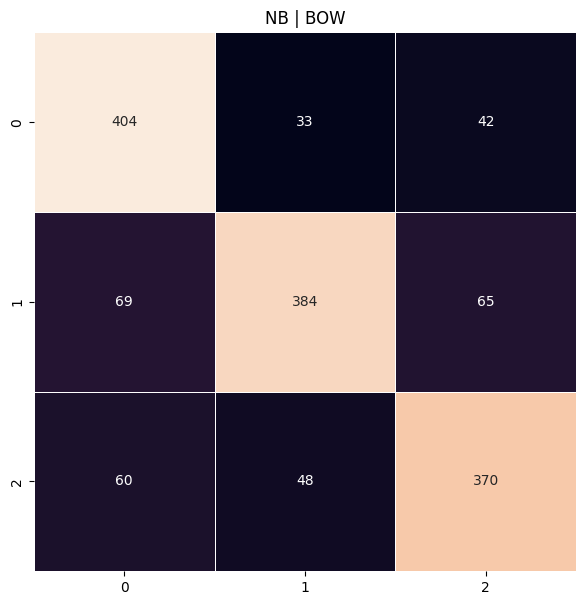

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### SVM

In [ ]:
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000
svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations)
SVM=svm.fit(train_vectors,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_vectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  84.7457627118644


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       479
           1       0.81      0.86      0.84       518
           2       0.84      0.83      0.83       478

    accuracy                           0.84      1475
   macro avg       0.84      0.84      0.84      1475
weighted avg       0.84      0.84      0.84      1475



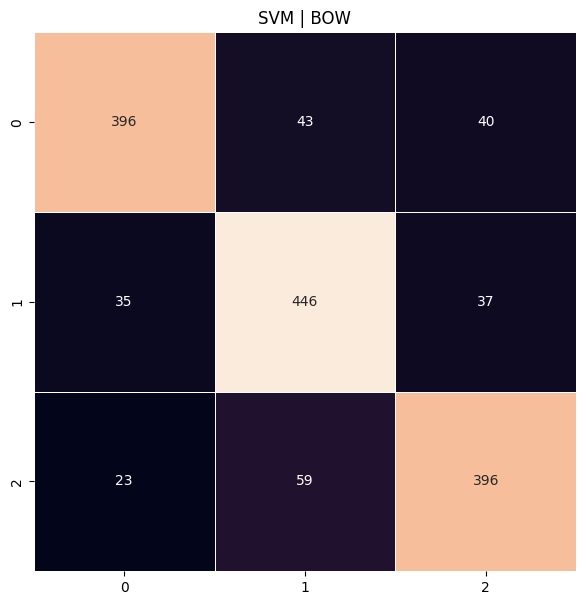

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(7,7))
plt.title("SVM | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### LOG REG

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  84.7457627118644


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1157
           1       0.78      0.69      0.73       191

    accuracy                           0.93      1348
   macro avg       0.86      0.83      0.84      1348
weighted avg       0.93      0.93      0.93      1348



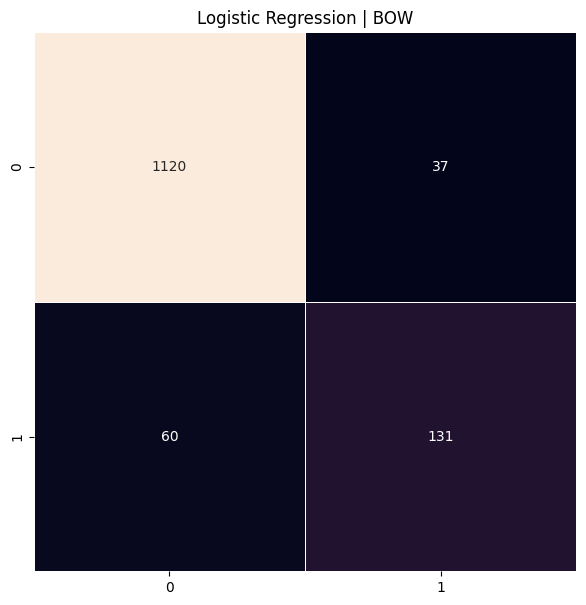

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_log)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_vectors, y_train)
predictions_tree = tree_clf.predict(test_vectors)
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)

Decision Tree Accuracy Score ->  78.03389830508475


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1157
           1       0.70      0.70      0.70       191

    accuracy                           0.91      1348
   macro avg       0.82      0.82      0.82      1348
weighted avg       0.91      0.91      0.91      1348



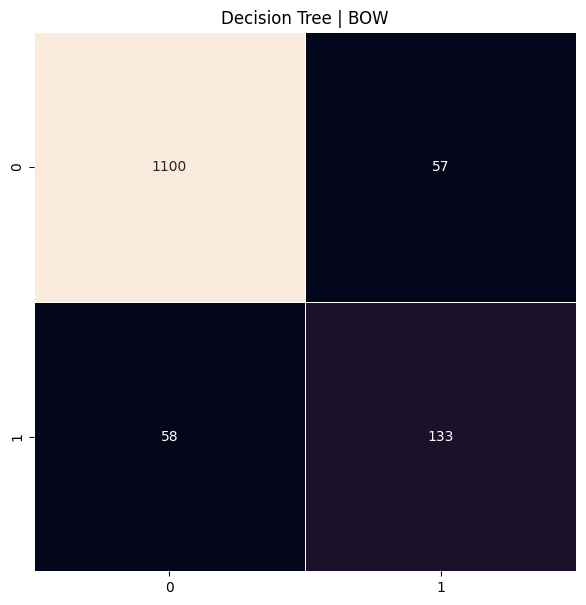

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | BOW")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest sınıflandırıcısını tanımla
rf_clf = RandomForestClassifier()

# Modeli eğit
rf_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_rf = rf_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf, y_test) * 100)


Random Forest Accuracy Score ->  81.15254237288136


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1157
           1       0.82      0.62      0.71       191

    accuracy                           0.93      1348
   macro avg       0.88      0.80      0.83      1348
weighted avg       0.92      0.93      0.92      1348



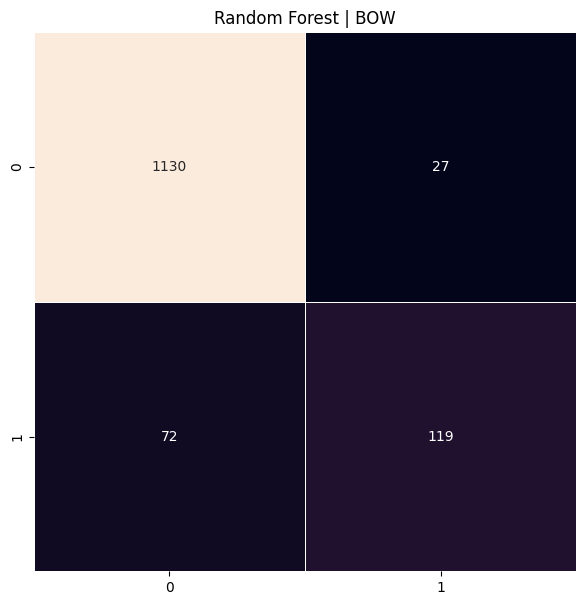

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest modeli için confusion matrix oluştur
cm_rf = confusion_matrix(y_test, predictions_rf)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Random Forest | BOW")
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


* #### [TF_IDF](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [KNN](#svm)
    * #### [LOGISTIC REG](#log)


######Kütüphanelerin Yüklenmesi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential


In [ ]:
#dirve da kullanacaksanız buras şart yoksa yorum satırına alınız
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bil482/
"""da db .csv nini yüklü olduğu klasör"""


Mounted at /content/drive
/content/drive/My Drive/Bil482


'da db .csv nini yüklü olduğu klasör'

In [ ]:
df=pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
df.isnull().values.any()

df.head(10)

id  \
index                        
5.770000e+17  5.770000e+17   
5.410000e+17  5.410000e+17   
5.680000e+17  5.680000e+17   
5.770000e+17  5.770000e+17   
5.710000e+17  5.710000e+17   
5.100000e+17  5.100000e+17   
5.590000e+17  5.590000e+17   
5.750000e+17  5.750000e+17   
5.650000e+17  5.650000e+17   
5.630000e+17  5.630000e+17   

                                                                                                                                                 Text  \
index                                                                                                                                                   
5.770000e+17                         @AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc   
5.410000e+17                                                                                                                                   #NULL!   
5.680000e+17  @jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.   
5.770000e+17                                          Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR   
5.710000e+17                                                                                                   @carolinesinders @herecomesfran *hugs*   
5.100000e+17                       Please, PLEASE start using "is your discernment blunted by steroids" to mean "are you on DRUGS?" from now on. DEAD   
5.590000e+17  @aymannathem As soon as ISIS chased all the minorities out of Mosul, the Sunni Arabs were happy to steal their property.  So fuck them.   
5.750000e+17                                                                      @Ali_Gharib @MaxBlumenthal Glad you like it. http://t.co/3ME3Nrk8xZ   
5.650000e+17          @HuffPostRelig Islam invaded and conquered 2/3 of Christiandom before any Christian crusades in response. The writer is a liar.   
5.630000e+17                                    @semzyxx Do you approve of your pedophile prophet raping a 9 year old girl, like it says in 7 hadith?   

             Annotation  oh_label  
index                              
5.770000e+17     racism         1  
5.410000e+17       none         0  
5.680000e+17     racism         1  
5.770000e+17       none         0  
5.710000e+17       none         0  
5.100000e+17       none         0  
5.590000e+17       none         0  
5.750000e+17       none         0  
5.650000e+17     racism         1  
5.630000e+17     racism         1

<Axes: xlabel='oh_label', ylabel='count'>

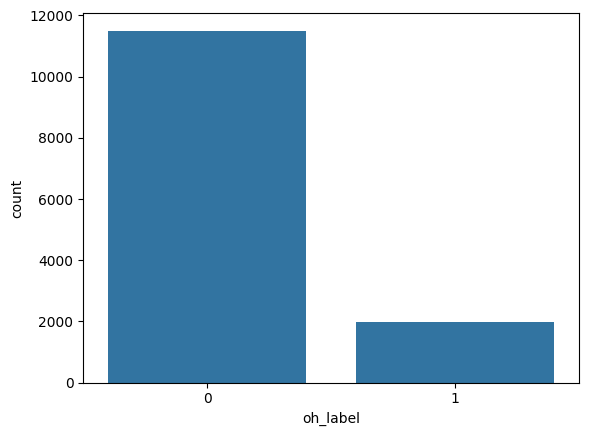

In [ ]:
import seaborn as sns
sns.countplot(x='oh_label', data=df)

In [ ]:
df.shape

(13471, 4)

In [ ]:
print(len(df))

13471


In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
df['Comment']=df['Text'].apply(str)

In [ ]:
X = []
sentences = list(df['Comment'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
y = df['oh_label']

In [ ]:
y.shape

(13471,)

###### %30-70

In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

---
<a id="p1"></a>
###### TF-IDF

In [ ]:
#feature extraction with Tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(13266, 10000) (1475, 10000)


In [ ]:
print(test_vectors)

  (0, 9466)	0.18239891655024962
  (0, 9348)	0.14855434443725649
  (0, 9054)	0.36872343449568273
  (0, 7818)	0.08330916188170966
  (0, 7533)	0.3570063612810034
  (0, 6565)	0.34791789321676425
  (0, 5156)	0.34791789321676425
  (0, 4603)	0.14035347370908716
  (0, 4350)	0.2404310843054412
  (0, 3910)	0.2686624446886319
  (0, 3905)	0.2502534324700101
  (0, 3710)	0.34791789321676425
  (0, 2954)	0.1461282112051633
  (0, 2763)	0.19607519325550835
  (0, 2526)	0.13248965709741636
  (0, 610)	0.14664853509163003
  (1, 8065)	0.3090353535027558
  (1, 8017)	0.1284338528591308
  (1, 7792)	0.45215814980619007
  (1, 7338)	0.20885829781159018
  (1, 5195)	0.5211887188114961
  (1, 4235)	0.12171812494742844
  (1, 4037)	0.2911688860609344
  (1, 3999)	0.27385292548686574
  (1, 3518)	0.4180474442158102
  :	:
  (4038, 392)	0.31568783472098555
  (4038, 247)	0.09169638982895979
  (4039, 2785)	1.0
  (4040, 7871)	0.13352414921226177
  (4040, 7850)	0.3227584544520942
  (4040, 6560)	0.10942557875592288
  (4040, 5197)


<a id="nb"></a>
###### NB

In [ ]:
#use ML algorithms classifier
#use a Naive Bayes Classifier and train the model on the training set.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("Naive Bayes Accuracy Score -> ", accuracy_score(y_test,predicted)*100)


Naive Bayes Accuracy Score ->  78.77966101694915


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3431
           1       0.86      0.27      0.40       611

    accuracy                           0.88      4042
   macro avg       0.87      0.63      0.67      4042
weighted avg       0.88      0.88      0.85      4042



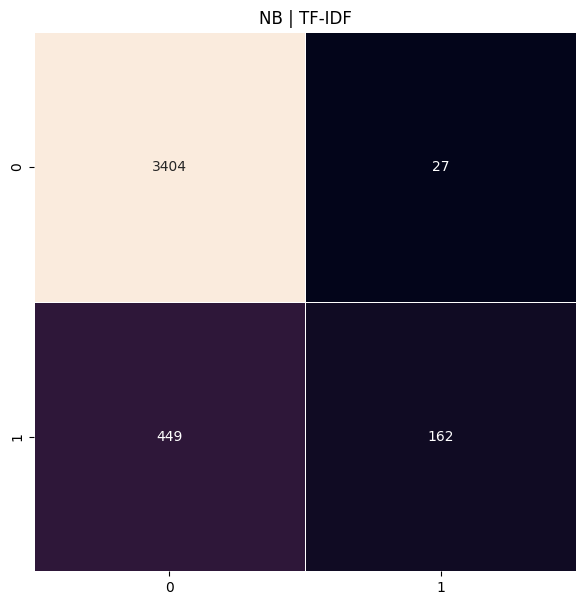

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

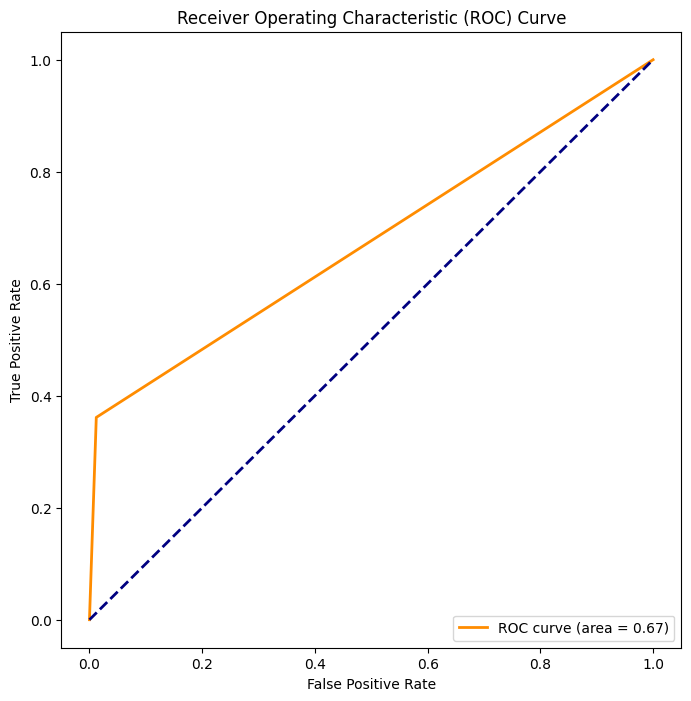

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<a id="svm"></a>
###### SVM  

In [ ]:
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model

SVM=svm.fit(train_vectors,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_vectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  93.17507418397626


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1157
           1       0.78      0.72      0.75       191

    accuracy                           0.93      1348
   macro avg       0.87      0.84      0.86      1348
weighted avg       0.93      0.93      0.93      1348



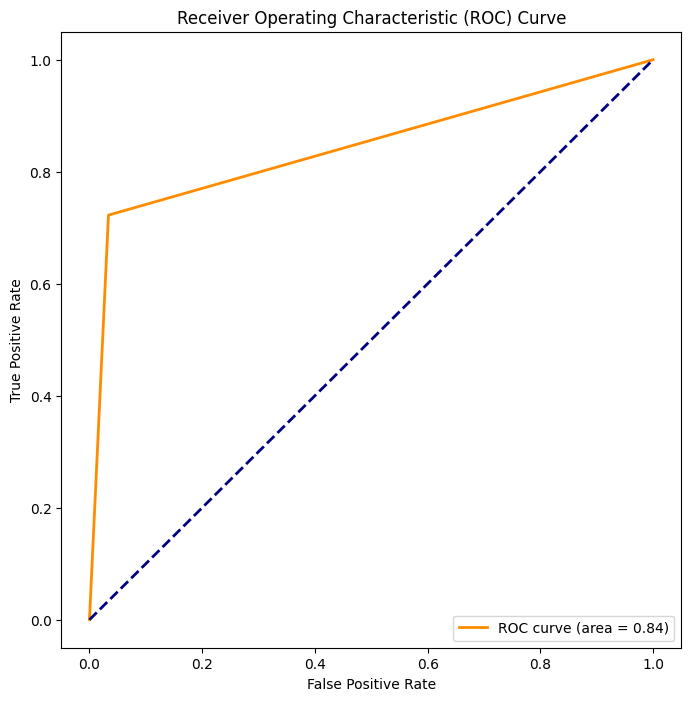

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predictions_SVM)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


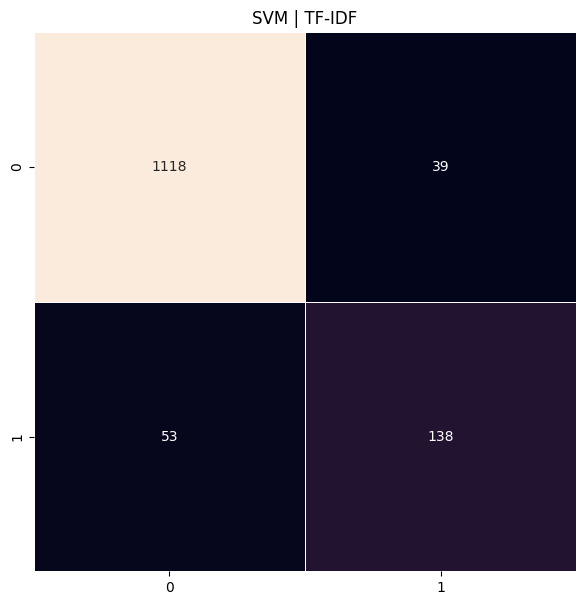

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(7,7))
plt.title("SVM | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


<a id="log"></a>
###### Log Reg

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  82.30508474576271


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1157
           1       0.82      0.61      0.70       191

    accuracy                           0.93      1348
   macro avg       0.88      0.80      0.83      1348
weighted avg       0.92      0.93      0.92      1348



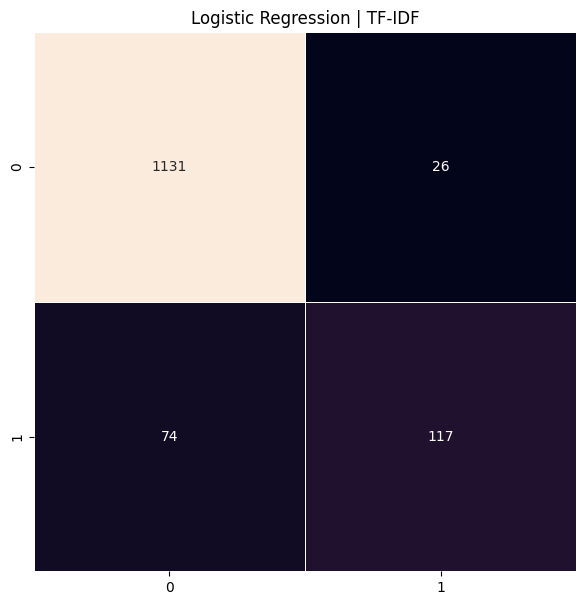

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_log)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

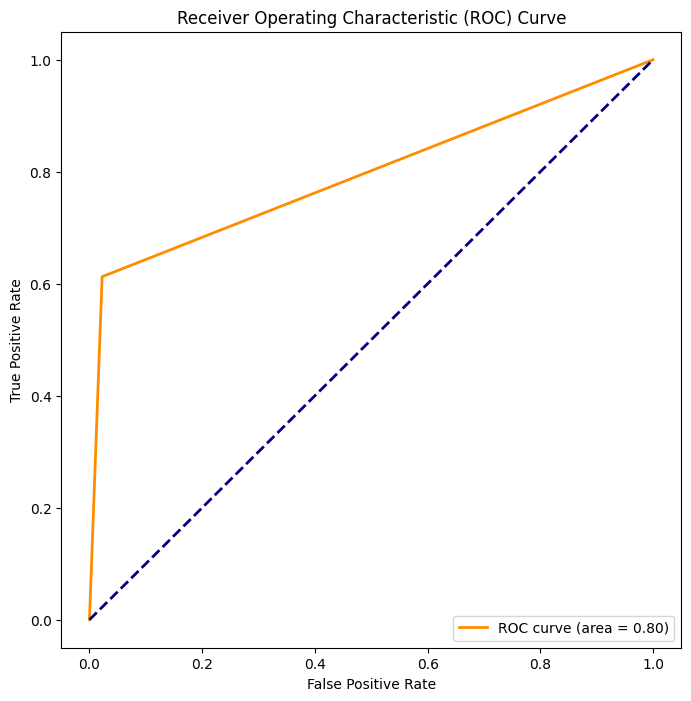

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predictions_log)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<a id="knn"></a>
###### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
number_of_neigbors = 5
minkowski_power = 2 # Manhattan Distance = 1, Euclidean Distance = 2
knn = KNeighborsClassifier(n_neighbors=number_of_neigbors, p =minkowski_power)
model_knn=knn.fit(train_vectors, y_train)
predictions_knn = model_knn.predict(test_vectors)
print("KNN Accuracy Score -> ",accuracy_score(predictions_knn, y_test)*100)





KNN Accuracy Score ->  68.88135593220339


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1157
           1       0.92      0.06      0.12       191

    accuracy                           0.87      1348
   macro avg       0.89      0.53      0.52      1348
weighted avg       0.87      0.87      0.81      1348



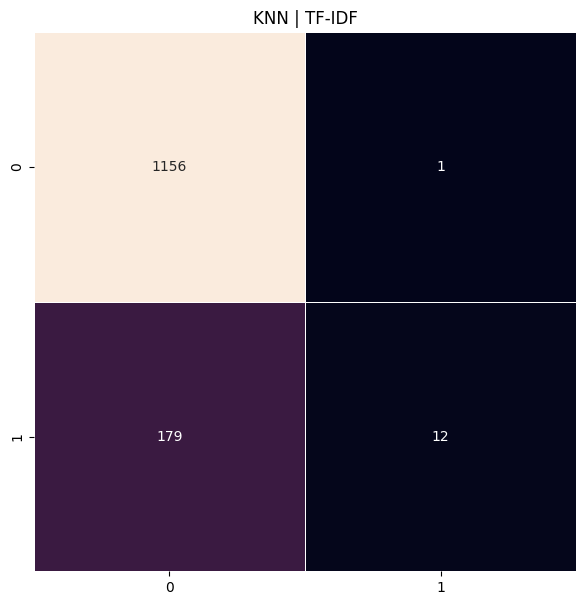

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_knn)
plt.figure(figsize=(7,7))
plt.title("KNN | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

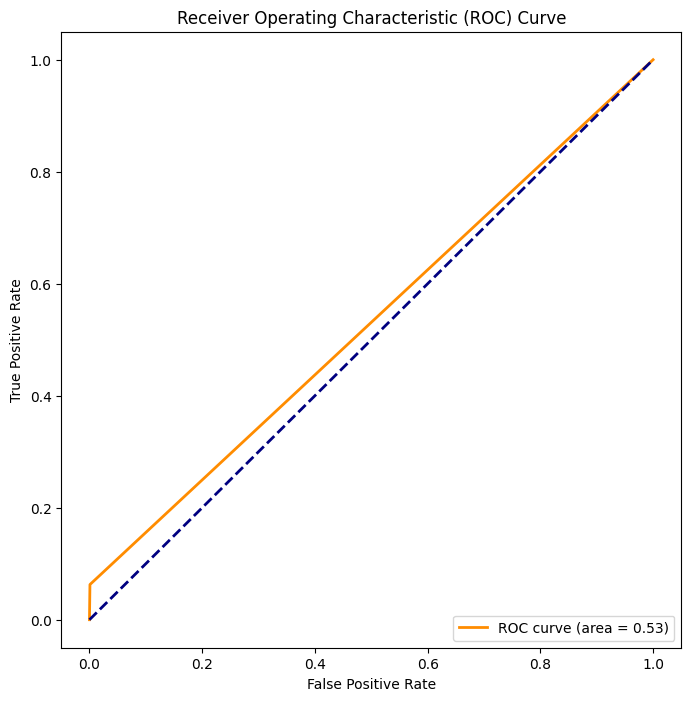

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predictions_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


###### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree sınıflandırıcısını tanımla
tree_clf = DecisionTreeClassifier()

# Modeli eğit
tree_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_tree = tree_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)


Decision Tree Accuracy Score ->  76.20338983050847


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_tree))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3431
           1       0.68      0.70      0.69       611

    accuracy                           0.91      4042
   macro avg       0.81      0.82      0.82      4042
weighted avg       0.91      0.91      0.91      4042



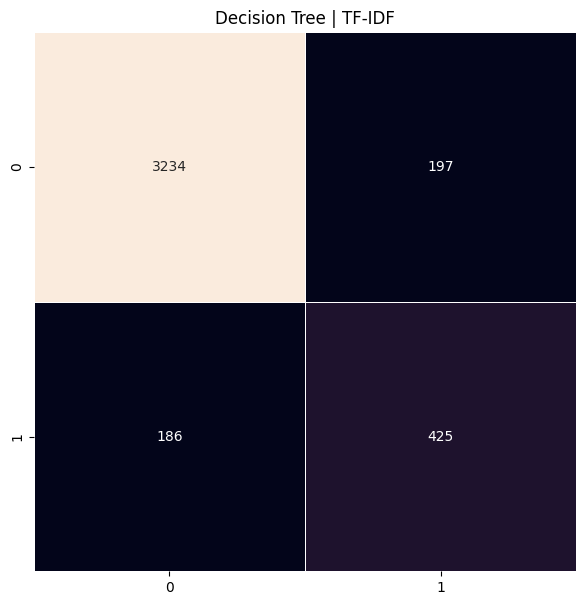

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | TF-IDF")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


######Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest sınıflandırıcısını tanımla
rf_clf = RandomForestClassifier()

# Modeli eğit
rf_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_rf = rf_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf, y_test) * 100)


Random Forest Accuracy Score ->  80.40677966101694


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_rf))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3431
           1       0.83      0.64      0.72       611

    accuracy                           0.93      4042
   macro avg       0.88      0.81      0.84      4042
weighted avg       0.92      0.93      0.92      4042



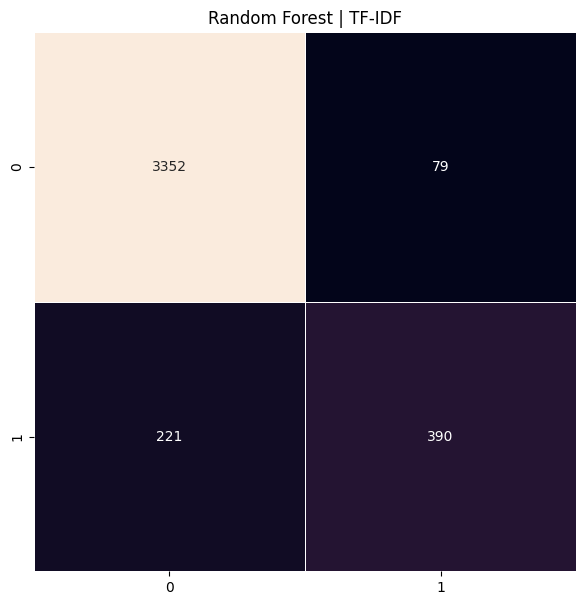

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest modeli için confusion matrix oluştur
cm_rf = confusion_matrix(y_test, predictions_rf)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Random Forest | TF-IDF")
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


* #### [W2V](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)


###### Kütüphanelerin eklenmesi

In [ ]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
#dirve da kullanacaksanız buras şart yoksa yorum satırına alınız
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bil482/  #çalışılacak drve dizinni


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/Bil482/ #çalışılacak drve dizinni'
/content/drive/My Drive/Bil482


'\n\ndata = pd.read_csv("db.csv",index_col=0)\ndata.isnull().values.any()\n\ndata.head()'

In [ ]:
data = pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
data=df

In [ ]:
data['Text'].isnull().values.any()

False

In [ ]:
data.head()

Text  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  
0           wipro , growth remain mirag     -1  
1  chines stock leav us investor vulner     -1  
2    us stock finish mix amid tech sell     -1  
3    opec reduc estim oil demand growth     -1  
4     immedi support rupe place bonanza     -1

In [ ]:
data.shape

(14741, 10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
data['Text'] = data['Text'].values.astype('U')
"""data['Text'] = data['Comment'].values.astype('U')"""

"data['Text'] = data['Comment'].values.astype('U')"

In [ ]:
data['Text'].head()

0                          At Wipro, growth remains a mirage
1           Why Chinese stocks leave US investors vulnerable
2              US stocks finish mixed amid more tech selling
3                 Opec reduces estimate on oil demand growth
4    Immediate support for rupee is placed at 55.10: Bonanza
Name: Text, dtype: object

**Word Embeddings**
1. Word2Vec Embeddings

- 100 dim,
- cbow

In [ ]:
tokenized_tweet = data['Text'].head(14741).apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=100,
            window=5, # context window size
            min_count=2,
            sg = 0, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['Text']), epochs=20)

(3621705, 4758360)

In [ ]:
tokenized_tweet


0                                                                                                                           [At, Wipro,, growth, remains, a, mirage]
1                                                                                                           [Why, Chinese, stocks, leave, US, investors, vulnerable]
2                                                                                                             [US, stocks, finish, mixed, amid, more, tech, selling]
3                                                                                                                 [Opec, reduces, estimate, on, oil, demand, growth]
4                                                                                                  [Immediate, support, for, rupee, is, placed, at, 55.10:, Bonanza]
                                                                                    ...                                                                             
14736                                                                                                [It, will, also, strengthen, Ruukki, 's, offshore, business, .]
14737                                                                                              [APL, Apollo, Tubes, hits, record, high;, HDFC, MF, buys, shares]
14738    [``, The, purchase, of, the, operations, is, part, of, YIT, 's, strategy, to, expand, its, offering, of, building, system, services, geographically, ., '']
14739                                                                                    [Sobha, Developers, heading, to, 200,, JP, stuck, at, 90:, Ashwani, Gujral]
14740                                                 [Decent, uptick, in, a, stock, like, Bharti, can, happen, if, Reliance, bids, aggressively:, Prashastha, Seth]
Name: Text, Length: 14741, dtype: object

In [ ]:
tokenized_tweet.shape

(14741,)

In [ ]:
null_count = 0
from contextlib import nullcontext

# Örnek bir tokenized_tweet listesi oluşturalım
tokenized_tweet = [{"Text": "#NULL!"}, {"Text": "some_text"}, {"Text": "#NULL!"}]

# Sözlük olup olmadığını kontrol edelim ve "Text" anahtarının varlığını kontrol edelim
for tweet in tokenized_tweet:
    if isinstance(tweet, dict) and "Text" in tweet:
        if tweet["Text"] == '#NULL!':
            null_count += 1

print(null_count)


2


In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary

            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
# Assuming 'model_w2v' is the Word2Vec model you trained earlier
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the word is not in the vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

In [ ]:
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(3, 100)

In [ ]:
# Assuming 'model_w2v' is the Word2Vec model you trained earlier
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the word is not in the vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape


(3, 100)

In [ ]:
print("tokenized_tweet:", len(tokenized_tweet))
print("wordvec_df:", wordvec_df.shape)
print("data['score']:", len(data['score']))

tokenized_tweet: 3
wordvec_df: (3, 100)
data['score']: 14741


In [ ]:
# 1. Tüm veriyi tokenize et (buradaki 'text' sütunun adı sana bağlı)
tokenized_tweet = [str(text).split() for text in data['Text']]  # veya kendi tokenizer'ın varsa kullan

# 2. Word2Vec modelini oluştur
from gensim.models import Word2Vec
model_w2v = Word2Vec(sentences=tokenized_tweet, vector_size=100, window=5, min_count=2)

# 3. Ortalama vektör fonksiyonu (seninkini aynen kullanıyoruz)
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

# 4. Tüm tweet'leri vektöre çevir
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)

# 5. Etiketlerle aynı uzunlukta mı kontrol et
print(wordvec_df.shape)         # (21863, 100) olmalı
print(len(data['score']))       # 21863 olmalı


(14741, 100)
14741


In [ ]:
wordvec_df

0         1         2         3         4         5         6   \
0     -0.297643  0.156087  0.057606  0.436275  0.013075 -0.206661  0.352258   
1     -0.480532  0.165764  0.023831  0.596833  0.200790 -0.011229  0.323574   
2     -0.470530  0.164903  0.009401  0.588252  0.189273 -0.025968  0.336691   
3     -0.448242  0.085396 -0.086499  0.531236  0.299685 -0.021550  0.371368   
4     -0.541637  0.259677 -0.080336  0.364204  0.112392 -0.159056  0.337642   
...         ...       ...       ...       ...       ...       ...       ...   
14736 -0.657599  0.582614  0.014823  0.642846  0.022693 -0.344296  0.294404   
14737 -0.320645  0.052133 -0.023015  0.438786  0.160293 -0.044536  0.309873   
14738 -0.610463  0.495922 -0.008441  0.543945  0.015269 -0.351351  0.352187   
14739 -0.330939  0.060621 -0.024972  0.300859  0.113825  0.000683  0.328432   
14740 -0.355811  0.158960  0.019528  0.401704  0.080071 -0.096008  0.291756   

             7         8         9   ...        90        91        92  \
0      0.412192 -0.528386 -0.342931  ...  0.237992 -0.061373  0.069473   
1      0.240515 -0.041896 -0.143915  ...  0.049470 -0.252740  0.355492   
2      0.275984 -0.090734 -0.157906  ...  0.075500 -0.236546  0.342423   
3      0.401566 -0.133254 -0.210832  ...  0.198408 -0.126764  0.342616   
4      0.549653 -0.591998 -0.319328  ...  0.298975 -0.136844  0.226644   
...         ...       ...       ...  ...       ...       ...       ...   
14736  0.502932 -1.192512 -0.388998  ...  0.277055 -0.186289  0.156814   
14737  0.315002 -0.086745 -0.197255  ...  0.167342 -0.123734  0.282123   
14738  0.624815 -1.253202 -0.446648  ...  0.354729 -0.101051  0.125589   
14739  0.315451 -0.254790 -0.250559  ...  0.141985 -0.036447  0.212404   
14740  0.310774 -0.327357 -0.229972  ...  0.140935 -0.112971  0.176200   

             93        94        95        96        97        98        99  
0      0.342019  0.595015  0.374960  0.378249 -0.504378  0.086370 -0.153003  
1      0.245062  0.534066  0.450932  0.311721 -0.303190  0.071696 -0.156760  
2      0.257282  0.576018  0.461032  0.326324 -0.332863  0.058399 -0.158848  
3      0.360050  0.782379  0.612993  0.316392 -0.447936 -0.134101 -0.159399  
4      0.354761  0.761412  0.455701  0.438311 -0.594581  0.058332 -0.170611  
...         ...       ...       ...       ...       ...       ...       ...  
14736  0.298216  0.770607  0.706048  0.558686 -0.616257  0.351569 -0.168139  
14737  0.266716  0.580013  0.436814  0.293081 -0.369286 -0.072597 -0.114078  
14738  0.374484  0.834592  0.691608  0.579467 -0.732512  0.293071 -0.193761  
14739  0.386746  0.580238  0.308701  0.368793 -0.455034 -0.141090 -0.062449  
14740  0.287978  0.511675  0.333135  0.347843 -0.391249  0.061545 -0.113355  

[14741 rows x 100 columns]

**2. Doc2Vec Embedding**

- 100 dim,


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

###### **Word2Vec Features**

> Blok alıntı ekle



In [ ]:
from sklearn.model_selection import train_test_split

train_w2v = wordvec_df.iloc[:150000, :]
test_w2v = wordvec_df.iloc[150000:, :]
"""
# Splitting data into training and validation set
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, data['BinaryNumTarget'],random_state=42,test_size=0.2)
"""

# Splitting data into training and validation set
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, data['score'],random_state=42,test_size=0.2)


In [ ]:
yvalid.head()

9512     0
8014     0
8596     0
1714    -1
11210    1
Name: score, dtype: int64

In [ ]:
ytrain

10708    1
10857    1
2640    -1
1250    -1
6834     0
        ..
5191     0
13418    1
5390     0
860     -1
7270     0
Name: score, Length: 11792, dtype: int64

In [ ]:
test_w2v.shape

(0, 100)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
lreg = linear_model.LogisticRegression()

###### **1. Logistic Regression**

In [ ]:
lreg.fit(xtrain_w2v, ytrain)

LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Ölçeklendirme işlemi (özellikle Word2Vec gibi vektörlerde önerilir)
scaler = StandardScaler()
xtrain_w2v_scaled = scaler.fit_transform(xtrain_w2v)
xvalid_w2v_scaled = scaler.transform(xvalid_w2v)

# Modeli tanımla ve max_iter artır
lreg = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial'
)

# Eğit
lreg.fit(xtrain_w2v_scaled, ytrain)

# Tahmin yap
prediction = lreg.predict(xvalid_w2v_scaled)

# F1 skorunu hesapla (çok sınıflı olduğun için average='macro')
f1 = f1_score(yvalid, prediction, average='macro')
print("F1 Score (macro):", f1)

F1 Score (macro): 0.5510771777571556


In [ ]:
"""lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)

# Assuming prediction_int is the binary predictions based on a threshold
prediction_int = (prediction[:, 1] >= 0.3).astype(int)

f1_score_result = f1_score(yvalid, prediction_int)
print("F1 Score:", f1_score_result)"""


'lreg.fit(xtrain_w2v, ytrain)\n\nprediction = lreg.predict_proba(xvalid_w2v)\n\n# Assuming prediction_int is the binary predictions based on a threshold\nprediction_int = (prediction[:, 1] >= 0.3).astype(int)\n\nf1_score_result = f1_score(yvalid, prediction_int)\nprint("F1 Score:", f1_score_result)'

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction))

              precision    recall  f1-score   support

          -1       0.58      0.53      0.56       984
           0       0.61      0.66      0.63      1007
           1       0.47      0.46      0.46       958

    accuracy                           0.55      2949
   macro avg       0.55      0.55      0.55      2949
weighted avg       0.55      0.55      0.55      2949



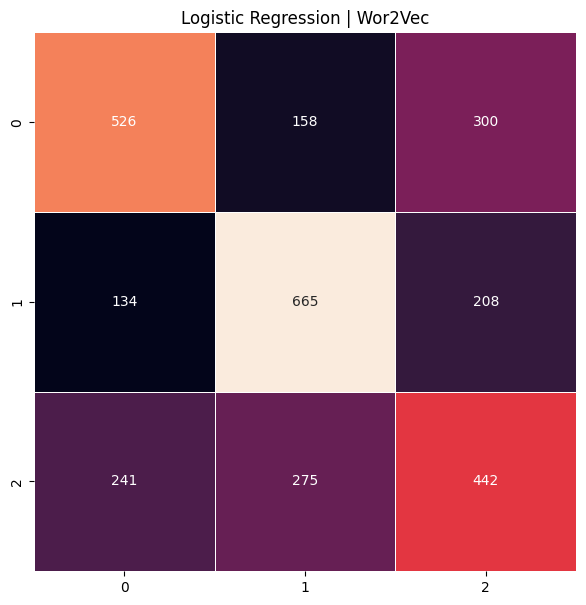

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | Wor2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### **2. Support Vector Machine**

In [ ]:
from sklearn import svm


In [ ]:
import numpy as np
from sklearn import svm
from sklearn.metrics import f1_score

# Modeli eğit
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

# Olasılık tahmini
prediction_proba = svc.predict_proba(xvalid_w2v)

# Sınıf tahmini: en yüksek olasılığa sahip sınıf
prediction_int = np.argmax(prediction_proba, axis=1)

# f1 skoru hesapla
f1 = f1_score(yvalid, prediction_int, average='macro')
print("F1 Score (macro):", f1)


F1 Score (macro): 0.09910585615092363


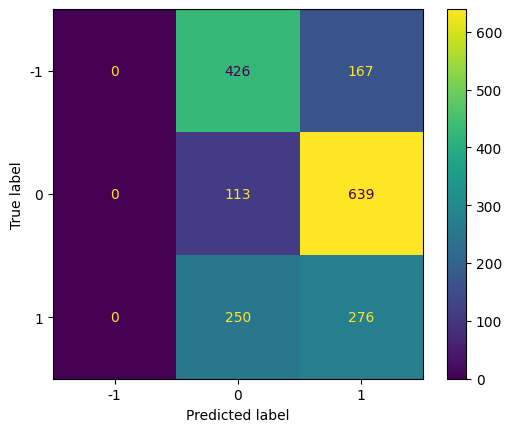

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(yvalid, prediction_int, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()


In [ ]:
import numpy as np
from sklearn import svm
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1 = f1_score(yvalid, prediction, average='macro')
print("F1 Score (macro):", f1)
#f1_score(yvalid, prediction_int)


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction_int))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       494
           1       0.48      0.44      0.46       106

    accuracy                           0.82       600
   macro avg       0.68      0.67      0.68       600
weighted avg       0.81      0.82      0.81       600



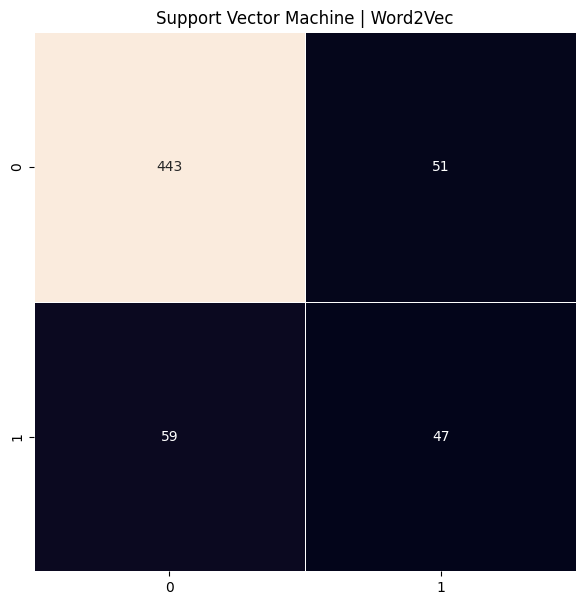

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_int)
plt.figure(figsize=(7,7))
plt.title("Support Vector Machine | Word2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

**3. dt**

>**Word2Vec Features**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier().fit(xtrain_w2v, ytrain)

prediction_r = dt.predict(xvalid_w2v)
f1_score(yvalid, prediction_r)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction_r))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       494
           1       0.28      0.33      0.30       106

    accuracy                           0.73       600
   macro avg       0.56      0.57      0.57       600
weighted avg       0.75      0.73      0.74       600



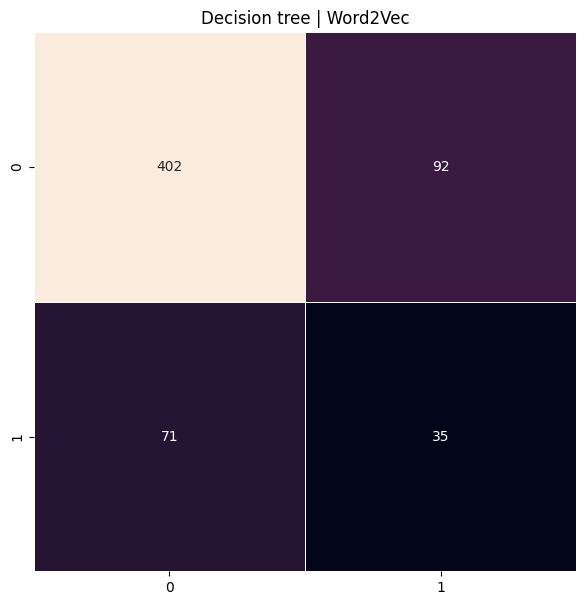

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_r)
plt.figure(figsize=(7,7))
plt.title("Decision tree | Word2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### NB

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_w2v, ytrain)
# Vektörlerde negatif değerleri kaldırmak için mutlak değeri alıyoruz
xtrain_w2v = np.abs(xtrain_w2v)
xvalid_w2v = np.abs(xvalid_w2v)

# Naive Bayes modelini oluştur ve eğit
nb_model = MultinomialNB()
nb_model.fit(xtrain_w2v, ytrain)

# Tahmin yap
predictions = nb_model.predict(xvalid_w2v)

# Değerlendirme
print(classification_report(yvalid, predictions))
print("F1 Score (macro):", f1_score(yvalid, predictions, average='macro'))



              precision    recall  f1-score   support

          -1       0.45      0.56      0.50       984
           0       0.53      0.68      0.59      1007
           1       0.39      0.18      0.24       958

    accuracy                           0.47      2949
   macro avg       0.46      0.47      0.44      2949
weighted avg       0.46      0.47      0.45      2949

F1 Score (macro): 0.4439134849113286


In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(xvalid_w2v)
print("Naive Bayes Accuracy Score -> ", accuracy_score(yvalid,predicted)*100)


Naive Bayes Accuracy Score ->  47.4059003051882


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, predicted))

              precision    recall  f1-score   support

          -1       0.45      0.56      0.50       984
           0       0.53      0.68      0.59      1007
           1       0.39      0.18      0.24       958

    accuracy                           0.47      2949
   macro avg       0.46      0.47      0.44      2949
weighted avg       0.46      0.47      0.45      2949



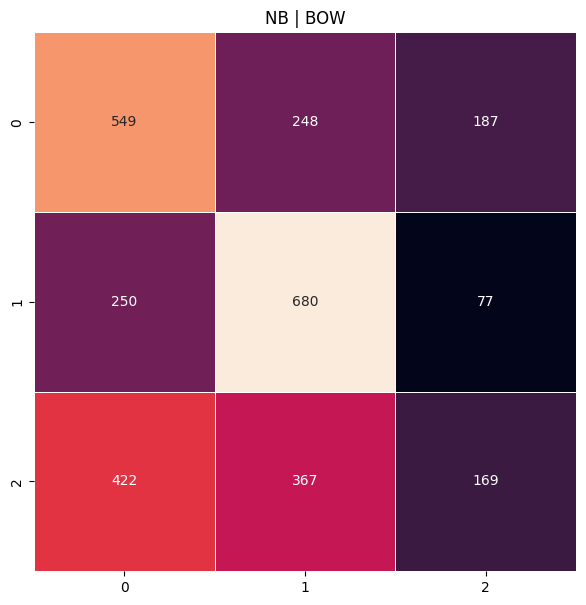

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

* #### [LSTM](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)


In [ ]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

/kaggle/input/amazon-product-reviews/amazon.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/BİL482/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/BİL482/'
/content/drive/My Drive/Bil482


In [ ]:
train_df = pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
train_df.isnull().values.any()

False

In [ ]:
train_df.head()

id  \
index                        
5.770000e+17  5.770000e+17   
5.410000e+17  5.410000e+17   
5.680000e+17  5.680000e+17   
5.770000e+17  5.770000e+17   
5.710000e+17  5.710000e+17   

                                                                                                                                                 Text  \
index                                                                                                                                                   
5.770000e+17                         @AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc   
5.410000e+17                                                                                                                                   #NULL!   
5.680000e+17  @jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.   
5.770000e+17                                          Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR   
5.710000e+17                                                                                                   @carolinesinders @herecomesfran *hugs*   

             Annotation  oh_label  
index                              
5.770000e+17     racism         1  
5.410000e+17       none         0  
5.680000e+17     racism         1  
5.770000e+17       none         0  
5.710000e+17       none         0

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'(.)\1{2,}', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'\b(\w+)\s+(\1\s+){2,}', r'\1 ', text)
    text = re.sub(r'[^a-zA-Z\s,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

def preprocess_text2(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'[^a-zA-Z\s,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
preprocess_data=lambda text:preprocess_text(text)
train_df["Text_prepro"]=train_df["Text"].apply(preprocess_data)

In [ ]:
train_df

id  \
index                        
5.770000e+17  5.770000e+17   
5.410000e+17  5.410000e+17   
5.680000e+17  5.680000e+17   
5.770000e+17  5.770000e+17   
5.710000e+17  5.710000e+17   
...                    ...   
5.760000e+17  5.760000e+17   
5.580000e+17  5.580000e+17   
5.760000e+17  5.760000e+17   
5.760000e+17  5.760000e+17   
5.760000e+17  5.760000e+17   

                                                                                                                                                             Text  \
index                                                                                                                                                               
5.770000e+17                                     @AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc   
5.410000e+17                                                                                                                                               #NULL!   
5.680000e+17              @jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.   
5.770000e+17                                                      Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR   
5.710000e+17                                                                                                               @carolinesinders @herecomesfran *hugs*   
...                                                                                                                                                           ...   
5.760000e+17                                                                                                     #mkr NOOOOO!!! I wanted Kat and Andre to lose!!!   
5.580000e+17  RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane \n\n#JeSuisCharlie \n\n'Turkish military says MIT shipped weapons to al-Qaeda'\n@fehimtastekin►►http…   
5.760000e+17                                                                    Glad the proper competition is starting and even happier that Colin is back. #mkr   
5.760000e+17                                 No worries Pete and Manu, take all the time off you need. In fact, feel free to fuck right off - I prefer Colin #mkr   
5.760000e+17         @mykitchenrules #mkr please kick off that lady who is such a rude person. She has such a crappy attitude towards the others. Shes gave a one   

             Annotation  oh_label  \
index                               
5.770000e+17     racism         1   
5.410000e+17       none         0   
5.680000e+17     racism         1   
5.770000e+17       none         0   
5.710000e+17       none         0   
...                 ...       ...   
5.760000e+17       none         0   
5.580000e+17       none         0   
5.760000e+17       none         0   
5.760000e+17       none         0   
5.760000e+17       none         0   

                                                                                                                    Text_prepro  
index                                                                                                                            
5.770000e+17                                       aalwuhaib muslim mob violenc hindu bangladesh continu islam httptcocjbwjwurc  
5.410000e+17                                                                                                               null  
5.680000e+17                 jncatron israjourisra ampalestin islamophobia like idea naziphobia islam religion hate must outlaw  
5.770000e+17                                                 final 'm caught , sudden death cook look like 's gon na intens mkr  
5.710000e+17                                                                                     carolinesind herecomesfran hug  
...                                                                                            

In [ ]:
X=train_df.drop(["Text","oh_label"],axis=1)
y=train_df["oh_label"]

In [ ]:
X

id Annotation  \
index                                   
5.770000e+17  5.770000e+17     racism   
5.410000e+17  5.410000e+17       none   
5.680000e+17  5.680000e+17     racism   
5.770000e+17  5.770000e+17       none   
5.710000e+17  5.710000e+17       none   
...                    ...        ...   
5.760000e+17  5.760000e+17       none   
5.580000e+17  5.580000e+17       none   
5.760000e+17  5.760000e+17       none   
5.760000e+17  5.760000e+17       none   
5.760000e+17  5.760000e+17       none   

                                                                                                                    Text_prepro  
index                                                                                                                            
5.770000e+17                                       aalwuhaib muslim mob violenc hindu bangladesh continu islam httptcocjbwjwurc  
5.410000e+17                                                                                                               null  
5.680000e+17                 jncatron israjourisra ampalestin islamophobia like idea naziphobia islam religion hate must outlaw  
5.770000e+17                                                 final 'm caught , sudden death cook look like 's gon na intens mkr  
5.710000e+17                                                                                     carolinesind herecomesfran hug  
...                                                                                                                         ...  
5.760000e+17                                                                                           mkr n want kat andr lose  
5.580000e+17  rt mumtazceltik whitehous vp koban jesuischarli 'turkish militari say mit ship weapon alqaeda' fehimtastekin http  
5.760000e+17                                                             glad proper competit start even happier colin back mkr  
5.760000e+17                                      worri pete manu , take time need fact , feel free fuck right prefer colin mkr  
5.760000e+17                              mykitchenrul mkr pleas kick ladi rude person crappi attitud toward other she gave one  

[13471 rows x 3 columns]

In [ ]:
y

index
5.770000e+17    1
5.410000e+17    0
5.680000e+17    1
5.770000e+17    0
5.710000e+17    0
               ..
5.760000e+17    0
5.580000e+17    0
5.760000e+17    0
5.760000e+17    0
5.760000e+17    0
Name: oh_label, Length: 13471, dtype: int64

In [ ]:
tokenized_documents=[preprocess_text2(doc) for doc in X["Text_prepro"]]

In [ ]:
len(tokenized_documents)

13471

In [ ]:
tokenized_documents[0]

['aalwuhaib',
 'muslim',
 'mob',
 'violenc',
 'hindu',
 'bangladesh',
 'continu',
 'islam',
 'httptcocjbwjwurc']

In [ ]:
from gensim.models import Word2Vec
ukuran_vektor=100
word2vec_model = Word2Vec(sentences=tokenized_documents,
                          min_count=1, vector_size=ukuran_vektor,sg=1)

In [ ]:
print(word2vec_model)

Word2Vec<vocab=16523, vector_size=100, alpha=0.025>


In [ ]:
all_words =word2vec_model.wv.index_to_key
print("50 kata pertama dalam model Word2Vec:")
for index, word in enumerate(all_words):
    if index < 50:
        print(f"{word} : {index}")
    else:
        break

50 kata pertama dalam model Word2Vec:
, : 0
mkr : 1
rt : 2
's : 3
n't : 4
islam : 5
like : 6
muslim : 7
kat : 8
'm : 9
go : 10
get : 11
peopl : 12
amp : 13
one : 14
would : 15
isi : 16
andr : 17
women : 18
think : 19
make : 20
time : 21
want : 22
know : 23
say : 24
look : 25
cook : 26
've : 27
're : 28
good : 29
see : 30
fuck : 31
thing : 32
realli : 33
ca : 34
need : 35
murder : 36
use : 37
maxblumenth : 38
kill : 39
even : 40
oh : 41
moham : 42
tri : 43
talk : 44
year : 45
show : 46
way : 47
hate : 48
love : 49


In [ ]:
max_length = train_df['Text_prepro'].apply(lambda x: len(x.split())).max()

In [ ]:
max_length

24

In [ ]:
max_length_index = train_df['Text_prepro'].apply(len).idxmax()
print("Index baris dengan max_length adalah :", max_length_index)

Index baris dengan max_length adalah : 5.65e+17


In [ ]:
train_df.at[max_length_index, 'Text_prepro']

index
5.650000e+17                      huffpostrelig islam invad conquer christiandom christian crusad respons writer liar
5.650000e+17                       dylanw 's cool next time woman talk approach classist , might want complet dismiss
5.650000e+17    accord ralphreject , gdc place rich peopl drinkdo drug jeez , guy guess 'll bring enough wine share ,
5.650000e+17                                              safya abusaalihah probabl anyon like replac assad even evil
5.650000e+17                                        dylanw dismiss amp concern argument might wan na check time stamp
                                                                ...                                                  
5.650000e+17                                             westcoastanim chriswarcraft n bey sorri still nation treasur
5.650000e+17          rt mhoy freebsdgirl year , somebodi 'll never meet sit hospit bed inexplic worri balanc parenth
5.650000e+17                                     r

In [ ]:
train_df.at[max_length_index, 'Text']

index
5.650000e+17                 @HuffPostRelig Islam invaded and conquered 2/3 of Christiandom before any Christian crusades in response. The writer is a liar.
5.650000e+17       @dylanw that's cool. next time when a woman talks to him about how his approach is classist, he might want to not completely dismiss her.
5.650000e+17     According to ralphreject, GDC is just a place for rich people to drink/do drugs. Jeez, guys. I guess I'll bring enough wine to share, then.
5.650000e+17                                                @Safya77 @AbuSaalihah1 Probably because anyone who is likely to replace Assad is even more evil.
5.650000e+17                               @dylanw I did that after he dismissed me &amp; my concerns as "argumentative". Might wanna check the time stamps.
                                                                                    ...                                                                     
5.650000e+17                                        

In [ ]:
sequences = [[word2vec_model.wv.key_to_index[word] for word in text]
             for text in [preprocess_text2(doc) for doc in X['Text_prepro']]]

In [ ]:
len(sequences)

13471

In [ ]:
sequences[0]

[703, 7, 824, 456, 533, 3292, 463, 5, 9974]

In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
padded_sequences.shape

(13471, 24)

In [ ]:
y = np.asarray(train_df['oh_label'])

In [ ]:
jumlah_kelas=len(train_df["oh_label"].unique())

In [ ]:
jumlah_kelas

2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, y,
                                            test_size=0.3,
                                            random_state=42, stratify=y)

NameError: name 'padded_sequences' is not defined

In [ ]:
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.vector_size))
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input,Embedding,GlobalMaxPooling1D
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                  trainable=False))
model.add(LSTM(ukuran_vektor, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(jumlah_kelas, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/500
37/37 [==============================] - 7s 118ms/step - loss: 0.6764 - accuracy: 0.7163 - val_loss: 0.6439 - val_accuracy: 0.8538
Epoch 2/500
37/37 [==============================] - 5s 124ms/step - loss: 0.5862 - accuracy: 0.8537 - val_loss: 0.4878 - val_accuracy: 0.8538
Epoch 3/500
37/37 [==============================] - 5s 139ms/step - loss: 0.4188 - accuracy: 0.8537 - val_loss: 0.4001 - val_accuracy: 0.8538
Epoch 4/500
37/37 [==============================] - 4s 102ms/step - loss: 0.4006 - accuracy: 0.8537 - val_loss: 0.3964 - val_accuracy: 0.8538
Epoch 5/500
37/37 [==============================] - 4s 101ms/step - loss: 0.3963 - accuracy: 0.8537 - val_loss: 0.3922 - val_accuracy: 0.8538
Epoch 6/500
37/37 [==============================] - 6s 165ms/step - loss: 0.3906 - accuracy: 0.8537 - val_loss: 0.3866 - val_accuracy: 0.8538
Epoch 7/500
37/37 [==============================] - 4s 99ms/step - loss: 0.3818 - accuracy: 0.8537 - val_loss: 0.3715 - val_accuracy: 0.8538


In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 91.91%


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(model.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding', 'trainable': False, 'dtype': 'float32', 'batch_input_shape': (None, None), 'input_dim': 16524, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': None}


In [ ]:
print("Bobot Lapisan Embedding:")
print(model.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[-0.02519077 -0.0083349  -0.00507532 ... -0.00697542  0.00862303
  -0.01882677]
 [-0.01546945 -0.00932422  0.02222938 ...  0.02358159  0.01446393
  -0.01588584]
 [ 0.03186567 -0.0312441   0.02888137 ...  0.01442247  0.01631055
  -0.01324668]
 ...
 [-0.04440535  0.03652544  0.00264812 ... -0.02638056 -0.04821252
  -0.01761991]
 [-0.0196896   0.01364461  0.04395593 ... -0.04333179 -0.01244133
  -0.00198851]
 [ 0.03868104 -0.0088345   0.02324531 ... -0.01803076 -0.01778073
   0.00430964]]


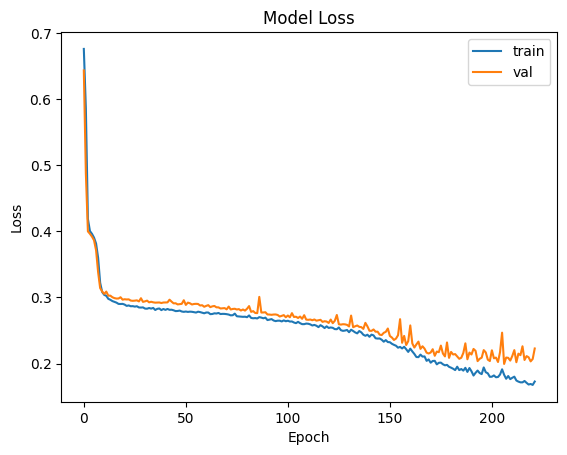

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

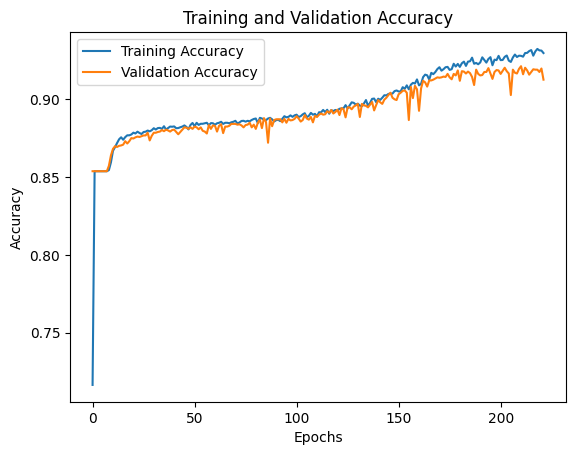

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 100)           1652400   
                                                                 
 lstm (LSTM)                 (None, 24, 100)           80400     
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

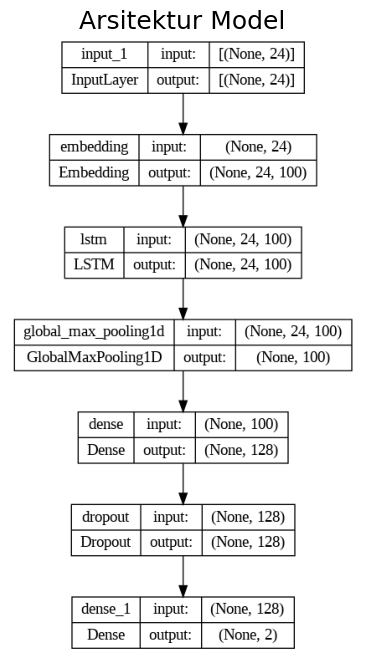

In [ ]:
from keras.utils import plot_model
file_name = 'arsitektur_model.png'
plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,8))
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Arsitektur Model', fontsize=18)
plt.axis('off')
plt.savefig(file_name)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_val, y_pred_classes)
print("Classification Report:")
print(report)

127/127 [==============================] - 2s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3451
           1       0.76      0.66      0.70       591

    accuracy                           0.92      4042
   macro avg       0.85      0.81      0.83      4042
weighted avg       0.92      0.92      0.92      4042



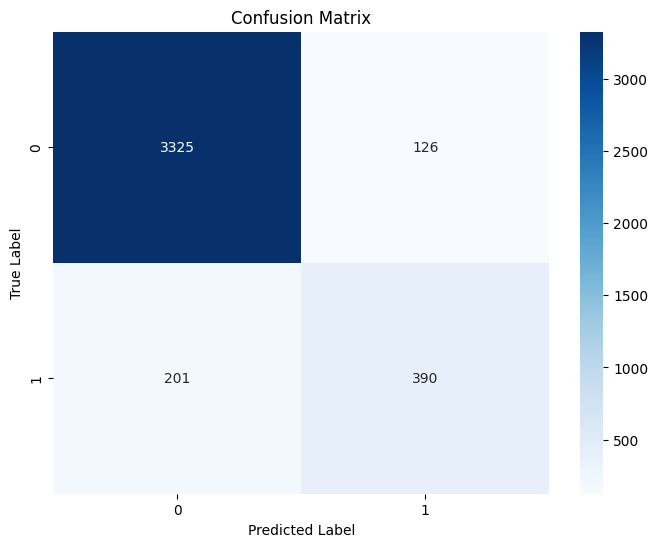

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("model_Amazon_Product_Reviews.h5")
word2vec_model.save("word2vec_model.model")
train_df.to_csv("train_data.csv", index=False)

# [2. Hibrit Sütununa göre](#b1)



* #### [Kütüphanelerin Yüklenmesi ve Veri Seti İşlemleri](#b1)

###### [1.Kütüphaneler yüklenmesi](#b1)

In [ ]:
# Gerekli kütüphaneleri belirtilen versiyonlarda kur
!pip install --upgrade --no-cache-dir numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 pandas==2.2.2 tensorflow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 tensorflow-decision-forests==1.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Gerekli kütüphaneler
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

#from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential


In [ ]:
"""from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping"""


'from tensorflow.keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM\nfrom tensorflow.keras.callbacks import EarlyStopping'

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


######[Dosyanın Yüklenmesi ve veri setinin incelenmesi](#b1)

In [ ]:
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bitirme/Datasets/
#df=pd.read_csv("Loan.csv",index_col=0)


""" # Yeni Bir dosya kaydetme koddunu buraya yazıyoruz
PreprocessedSon2_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon2_df.csv'
df.to_csv(PreprocessedSon2_df_file_path, index=False)"""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Bitirme/Datasets


" # Yeni Bir dosya kaydetme koddunu buraya yazıyoruz\nPreprocessedSon2_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon2_df.csv'\ndf.to_csv(PreprocessedSon2_df_file_path, index=False)"

In [ ]:
"""
Kaggle API ile yükleme
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'"""

"\nKaggle API ile yükleme\nimport numpy as np\nimport pandas as pd\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\nos.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'"

In [ ]:
df=pd.read_csv("PreprocessedSon3_df.csv",index_col=0)

In [ ]:
df3=pd.read_csv("IMDB_df.csv",index_col=0)

In [ ]:
df2=pd.read_csv("USAir_balanced_df.csv",index_col=0)

In [ ]:
df4=pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
df2

score
text                                                                                                                                       
At Wipro, growth remains a mirage                                                                                                        -1
Why Chinese stocks leave US investors vulnerable                                                                                         -1
US stocks finish mixed amid more tech selling                                                                                            -1
Opec reduces estimate on oil demand growth                                                                                               -1
Immediate support for rupee is placed at 55.10: Bonanza                                                                                  -1
...                                                                                                                                     ...
It will also strengthen Ruukki 's offshore business .                                                                                     1
APL Apollo Tubes hits record high; HDFC MF buys shares                                                                                    1
`` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . ''       1
Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral                                                                           1
Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth                                            1

[14741 rows x 1 columns]

In [ ]:
df.head()

tokens  \
Text                                                                                                                         
At Wipro, growth remains a mirage                                               ["['Micro', 'growth', 'remain', 'murat']"]   
Why Chinese stocks leave US investors vulnerable         ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
US stocks finish mixed amid more tech selling                 ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
Opec reduces estimate on oil demand growth                  ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
Immediate support for rupee is placed at 55.10: Bonanza   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

                                                         text_length  \
Text                                                                   
At Wipro, growth remains a mirage                                 33   
Why Chinese stocks leave US investors vulnerable                  48   
US stocks finish mixed amid more tech selling                     45   
Opec reduces estimate on oil demand growth                        42   
Immediate support for rupee is placed at 55.10: Bonanza           55   

                                                                                               hibrit  \
Text                                                                                                    
At Wipro, growth remains a mirage                                         wipro growth remains mirage   
Why Chinese stocks leave US investors vulnerable         chinese stocks leave us investors vulnerable   
US stocks finish mixed amid more tech selling                us stocks finish mixed amid tech selling   
Opec reduces estimate on oil demand growth                    opec reduces estimate oil demand growth   
Immediate support for rupee is placed at 55.10: Bonanza        immediate support rupee placed bonanza   

                                                                                 USAirPrePro  \
Text                                                                                           
At Wipro, growth remains a mirage                                  wipro growth remain mirag   
Why Chinese stocks leave US investors vulnerable         chines stock leav u investor vulner   
US stocks finish mixed amid more tech selling              u stock finish mix amid tech sell   
Opec reduces estimate on oil demand growth                opec reduc estim oil demand growth   
Immediate support for rupee is placed at 55.10: Bonanza    immedi support rupe place bonanza   

                                                                                      USAirPrePro2  \
Text                                                                                                 
At Wipro, growth remains a mirage                                      wipro growth remains mirage   
Why Chinese stocks leave US investors vulnerable         chinese stock leave u investor vulnerable   
US stocks finish mixed amid more tech selling               u stock finish mixed amid tech selling   
Opec reduces estimate on oil demand growth                 opec reduces estimate oil demand growth   
Immediate support for rupee is placed at 55.10: Bonanza     immediate support rupee placed bonanza   

                                                                                        MuammerNLPPrePRro  \
Text                                                                                                        
At Wipro, growth remains a mirage                                          At Wipro growth remains mirage   
Why Chinese stocks leave US investors vulnerable         Why Chinese stocks leave US investors vulnerable   
US stocks finish mixed amid more tech selling               US stocks finish mixed amid more tech selling   
Opec reduces estimate on oil demand growth                 

In [ ]:
#df2 = df2.reset_index()

In [ ]:

df = df.reset_index()
df.isnull().values.any()

df.head()

Text  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  oh_label  
0           wipro , growth remain mirag     -1         0  
1  chines stock leav us investor vulner     -1         0  
2    us stock finish mix amid tech sell     -1         0  
3    opec reduc estim oil demand growth     -1         0  
4     immedi support rupe place bonanza     -1         0

In [ ]:
df.columns

Index(['Text', 'tokens', 'text_length', 'hibrit', 'USAirPrePro',
       'USAirPrePro2', 'MuammerNLPPrePRro', 'MuammerNLPPrePRro2',
       'MuammerNLPLSTMPrePRro', 'score', 'oh_label'],
      dtype='object')

In [ ]:
df = df.drop(columns=['index'])


KeyError: "['index'] not found in axis"

In [ ]:
df.shape

(14741, 11)

In [ ]:
print(len(df))

14741


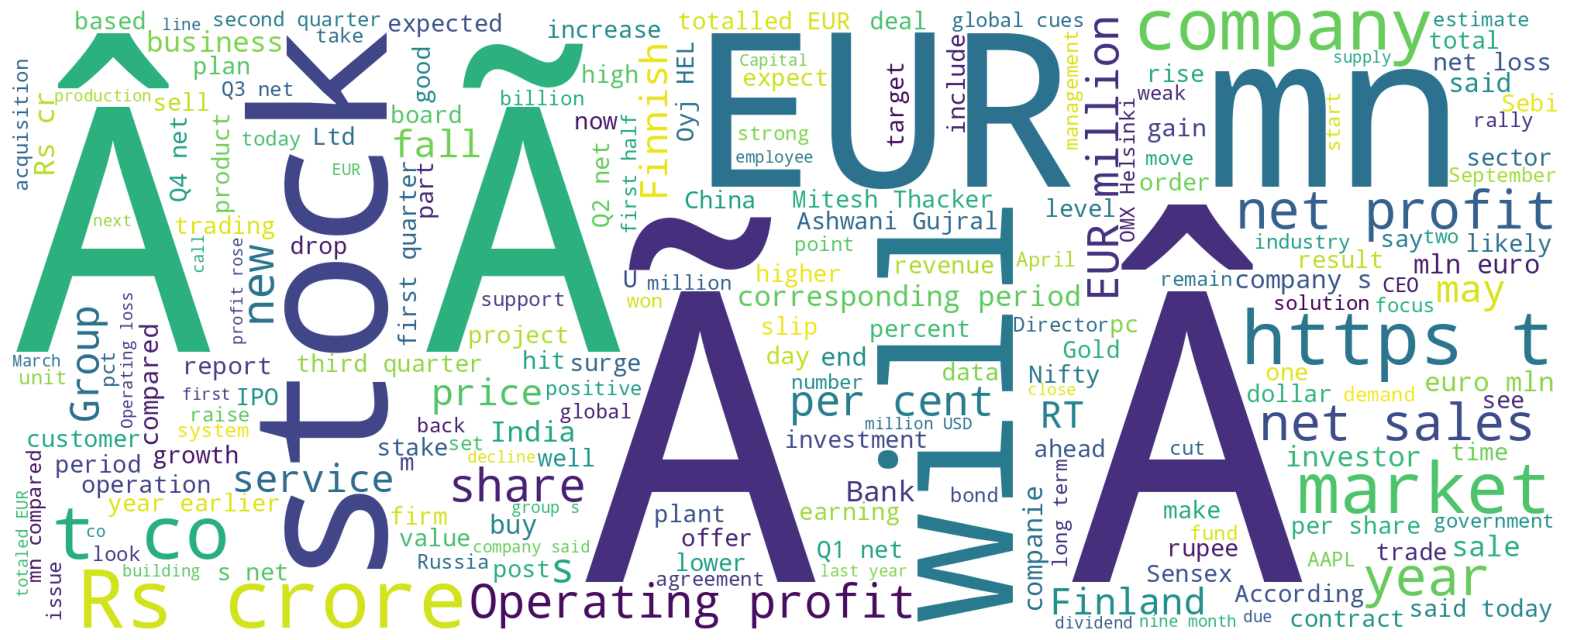

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in df.Text)
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###### [x ve y değerlerinin belirlenmesi ve train tesst ayrımı](#b1)

In [ ]:
x = df['hibrit']
x

0                                                                            wipro growth remains mirage
1                                                           chinese stocks leave us investors vulnerable
2                                                               us stocks finish mixed amid tech selling
3                                                                opec reduces estimate oil demand growth
4                                                                 immediate support rupee placed bonanza
                                                      ...                                               
14736                                                          also strengthen ruukki offshore business 
14737                                              apl apollo tubes hits record high hdfc mf buys shares
14738     purchase operations part yit strategy expand offering building system services geographically 
14739                                                   sobha developers heading jp stuck ashwani gujral
14740                  decent uptick stock like bharti happen reliance bids aggressively prashastha seth
Name: hibrit, Length: 14741, dtype: object

In [ ]:
y = df['oh_label']
y

0        0
1        0
2        0
3        0
4        0
        ..
14736    2
14737    2
14738    2
14739    2
14740    2
Name: oh_label, Length: 14741, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

* #### [BOW](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)
    * #### [Decission Tree](#log)
    * #### [Random Forest](#log)
    
    

###### [1.Kütüphaneler yüklenmesi](#b1)

In [ ]:
# Gerekli kütüphaneleri belirtilen versiyonlarda kur
!pip install --upgrade --no-cache-dir numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 pandas==2.2.2 tensorflow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 tensorflow-decision-forests==1.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Gerekli kütüphaneler
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

#from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential


In [ ]:
"""from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping"""


'from tensorflow.keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM\nfrom tensorflow.keras.callbacks import EarlyStopping'

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


######[Dosyanın Yüklenmesi ve veri setinin incelenmesi](#b1)

In [ ]:
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bitirme/Datasets/
#df=pd.read_csv("Loan.csv",index_col=0)


""" # Yeni Bir dosya kaydetme koddunu buraya yazıyoruz
PreprocessedSon2_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon2_df.csv'
df.to_csv(PreprocessedSon2_df_file_path, index=False)"""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Bitirme/Datasets


In [ ]:
df=pd.read_csv("PreprocessedSon2_df.csv",index_col=0)

In [ ]:
df3=pd.read_csv("IMDB_df.csv",index_col=0)

In [ ]:
df2=pd.read_csv("USAir_balanced_df.csv",index_col=0)

In [ ]:
df4=pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
df['oh_label']=df['score']
df['oh_label'] = df['oh_label']+1

In [ ]:
PreprocessedSon3_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon3_df.csv'
df.to_csv(PreprocessedSon3_df_file_path, index=False)

In [ ]:
df['oh_label']

0        0
1        0
2        0
3        0
4        0
        ..
14736    2
14737    2
14738    2
14739    2
14740    2
Name: oh_label, Length: 14741, dtype: int64

In [ ]:
df2

text  \
0                                                                                                         At Wipro, growth remains a mirage   
1                                                                                          Why Chinese stocks leave US investors vulnerable   
2                                                                                             US stocks finish mixed amid more tech selling   
3                                                                                                Opec reduces estimate on oil demand growth   
4                                                                                   Immediate support for rupee is placed at 55.10: Bonanza   
...                                                                                                                                     ...   
14736                                                                                It will also strengthen Ruukki 's offshore business .    
14737                                                                                APL Apollo Tubes hits record high; HDFC MF buys shares   
14738  `` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . ''    
14739                                                                       Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral   
14740                                        Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth   

       score  
0         -1  
1         -1  
2         -1  
3         -1  
4         -1  
...      ...  
14736      1  
14737      1  
14738      1  
14739      1  
14740      1  

[14741 rows x 2 columns]

In [ ]:
df.head()

Text  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  oh_label  
0           wipro , growth remain mirag     -1        -1  
1  chines stock leav us investor vulner     -1        -1  
2    us stock finish mix amid tech sell     -1        -1  
3    opec reduc estim oil demand growth     -1        -1  
4     immedi support rupe place bonanza     -1        -1

In [ ]:
#df2 = df2.reset_index()

In [ ]:

df = df.reset_index()
df.isnull().values.any()

df.head()

index                                                     Text  \
0      0                        At Wipro, growth remains a mirage   
1      1         Why Chinese stocks leave US investors vulnerable   
2      2            US stocks finish mixed amid more tech selling   
3      3               Opec reduces estimate on oil demand growth   
4      4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  
0           wipro , growth remain mirag     -1  
1  chines stock leav us investor vulner     -1  
2    us stock finish mix amid tech sell     -1  
3    opec reduc estim oil demand growth     -1  
4     immedi support rupe place bonanza     -1

In [ ]:
df.columns

Index(['Text', 'tokens', 'text_length', 'hibrit', 'USAirPrePro',
       'USAirPrePro2', 'MuammerNLPPrePRro', 'MuammerNLPPrePRro2',
       'MuammerNLPLSTMPrePRro', 'score', 'oh_label'],
      dtype='object')

In [ ]:
df = df.drop(columns=['index'])


In [ ]:
df.shape

(14741, 11)

In [ ]:
print(len(df))

14741


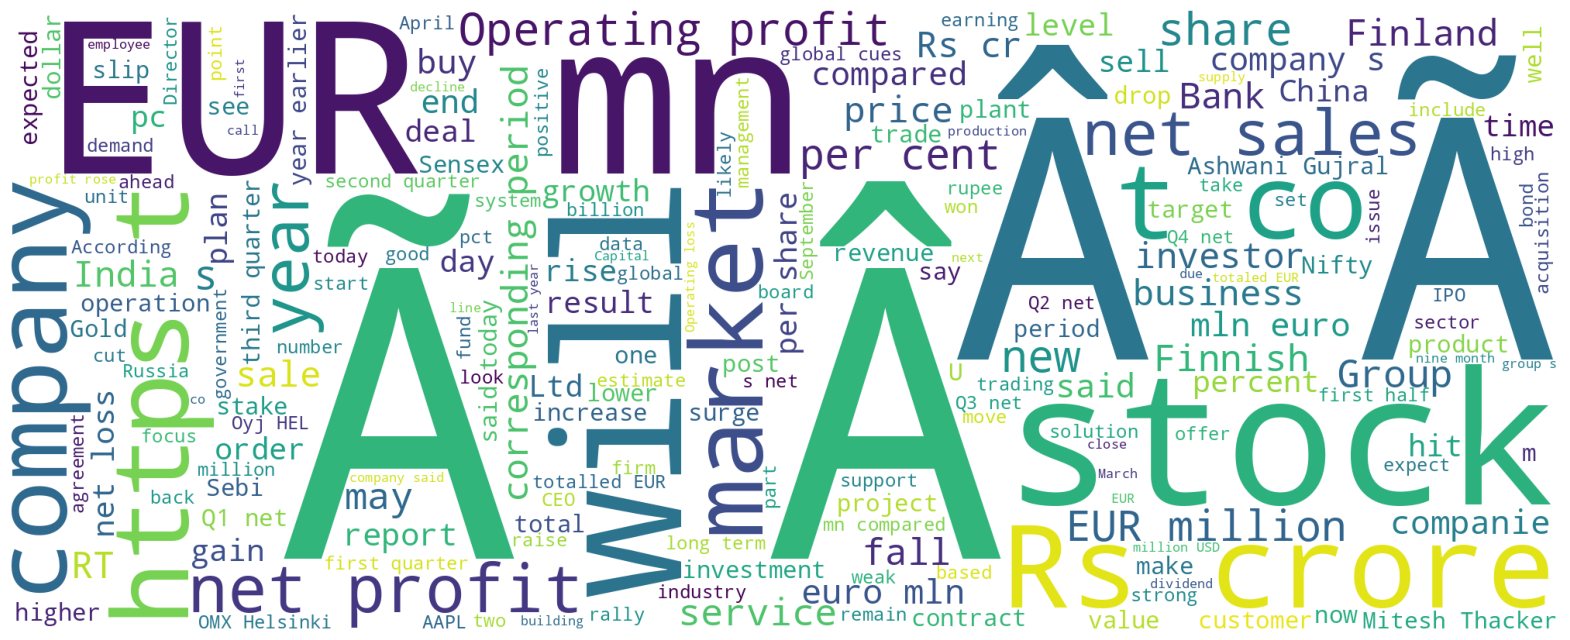

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in df.Text)
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
df['Comment']=df['Text'].apply(str)

In [ ]:
X = []
sentences = list(df['Comment'])
for sen in sentences:
    X.append(preprocess_text(sen))

KeyError: 'Comment'

In [ ]:
x=df['Text']

In [ ]:
X=df['hibrit']

In [ ]:
df['Text']

0                                                                                                           At Wipro, growth remains a mirage
1                                                                                            Why Chinese stocks leave US investors vulnerable
2                                                                                               US stocks finish mixed amid more tech selling
3                                                                                                  Opec reduces estimate on oil demand growth
4                                                                                     Immediate support for rupee is placed at 55.10: Bonanza
                                                                         ...                                                                 
14736                                                                                  It will also strengthen Ruukki 's offshore business . 
14737                                                                                  APL Apollo Tubes hits record high; HDFC MF buys shares
14738    `` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . '' 
14739                                                                         Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral
14740                                          Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth
Name: Text, Length: 14741, dtype: object

In [ ]:
# Artık sadece Text kolonunu al
X = df['Text']


0                          At Wipro, growth remains a mirage
1           Why Chinese stocks leave US investors vulnerable
2              US stocks finish mixed amid more tech selling
3                 Opec reduces estimate on oil demand growth
4    Immediate support for rupee is placed at 55.10: Bonanza
Name: Text, dtype: object


In [ ]:
X

0                                                                            wipro growth remains mirage
1                                                           chinese stocks leave us investors vulnerable
2                                                               us stocks finish mixed amid tech selling
3                                                                opec reduces estimate oil demand growth
4                                                                 immediate support rupee placed bonanza
                                                      ...                                               
14736                                                          also strengthen ruukki offshore business 
14737                                              apl apollo tubes hits record high hdfc mf buys shares
14738     purchase operations part yit strategy expand offering building system services geographically 
14739                                                   sobha developers heading jp stuck ashwani gujral
14740                  decent uptick stock like bharti happen reliance bids aggressively prashastha seth
Name: hibrit, Length: 14741, dtype: object

In [ ]:
X

0                                                                                                           At Wipro, growth remains a mirage
1                                                                                            Why Chinese stocks leave US investors vulnerable
2                                                                                               US stocks finish mixed amid more tech selling
3                                                                                                  Opec reduces estimate on oil demand growth
4                                                                                     Immediate support for rupee is placed at 55.10: Bonanza
                                                                         ...                                                                 
14736                                                                                  It will also strengthen Ruukki 's offshore business . 
14737                                                                                  APL Apollo Tubes hits record high; HDFC MF buys shares
14738    `` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . '' 
14739                                                                         Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral
14740                                          Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth
Name: Text, Length: 14741, dtype: object

In [ ]:
df['oh_label']=df['score']
y = df['oh_label']+1

In [ ]:
y = df['oh_label']+1

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
14736    2
14737    2
14738    2
14739    2
14740    2
Name: oh_label, Length: 14741, dtype: int64

######[Train Test Ayrımının yapılması](#b1)

%30-70

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [ ]:
X_train.head()

7495                                                                        spicejet seeks shareholders nod hike promoters holding
8253                                                                           danske bank denmark largest bank million customers 
10087                                                                  real sales expected increased year year eur second quarter 
3386     forterra group revenue declined five months may https co byq bhgwfr fort trading shares stocks ratings https co sdct hszj
6618                                                                        abn represent voting rights share capital citycon oyj 
Name: hibrit, dtype: object

In [ ]:
from sklearn import  preprocessing

In [ ]:
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

###### BOW

In [ ]:
#feature extraction with Tf-idf vectorizer

#feature extraction with BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(X_train)

train_vectors = vectorizer.transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(13266, 10000) (1475, 10000)


In [ ]:
X_train

7495                                                                        spicejet seeks shareholders nod hike promoters holding
8253                                                                           danske bank denmark largest bank million customers 
10087                                                                  real sales expected increased year year eur second quarter 
3386     forterra group revenue declined five months may https co byq bhgwfr fort trading shares stocks ratings https co sdct hszj
6618                                                                        abn represent voting rights share capital citycon oyj 
                                                                   ...                                                            
5191                                                                                estimated annual value frame agreement eur mn 
13418                                                                                             rs bosche touch rs sandeep wagle
5390                                                                               came aspo chemicals aspo shipping aspo systems 
860                                                                  china agricultural bank sells billion debut green bond london
7270                                                   according gallup food farm facts beef consumption totaled mn kilos finland 
Name: hibrit, Length: 13266, dtype: object

###### NB

In [ ]:
#use ML algorithms classifier
#use a Naive Bayes Classifier and train the model on the training set.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("Naive Bayes Accuracy Score -> ", accuracy_score(y_test,predicted)*100)


Naive Bayes Accuracy Score ->  76.27118644067797


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       479
           1       0.83      0.72      0.77       518
           2       0.74      0.74      0.74       478

    accuracy                           0.76      1475
   macro avg       0.77      0.76      0.76      1475
weighted avg       0.77      0.76      0.76      1475



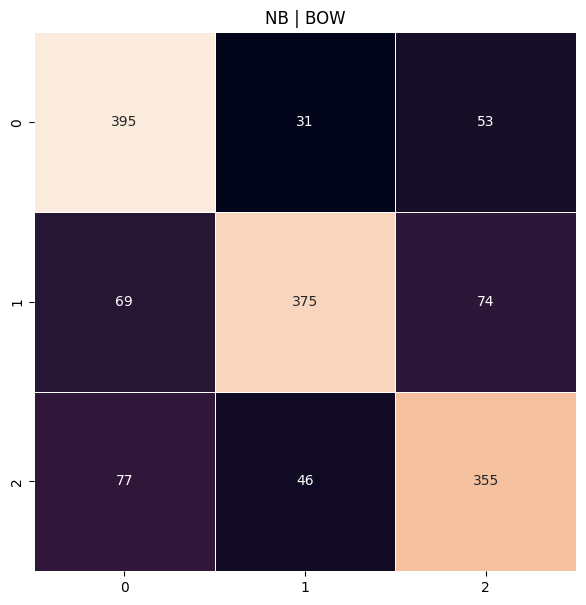

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### SVM

In [ ]:
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000
svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations)
SVM=svm.fit(train_vectors,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_vectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  80.88135593220339


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       479
           1       0.81      0.86      0.84       518
           2       0.84      0.83      0.83       478

    accuracy                           0.84      1475
   macro avg       0.84      0.84      0.84      1475
weighted avg       0.84      0.84      0.84      1475



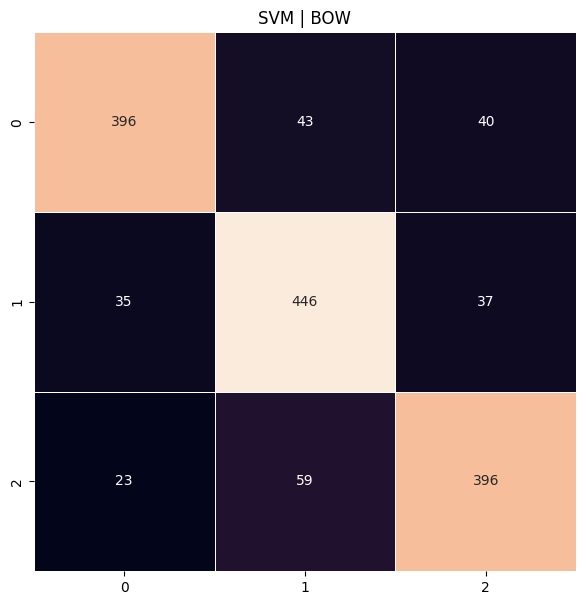

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(7,7))
plt.title("SVM | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### LOG REG

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  81.76271186440678


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       479
           1       0.81      0.85      0.83       518
           2       0.80      0.82      0.81       478

    accuracy                           0.82      1475
   macro avg       0.82      0.82      0.82      1475
weighted avg       0.82      0.82      0.82      1475



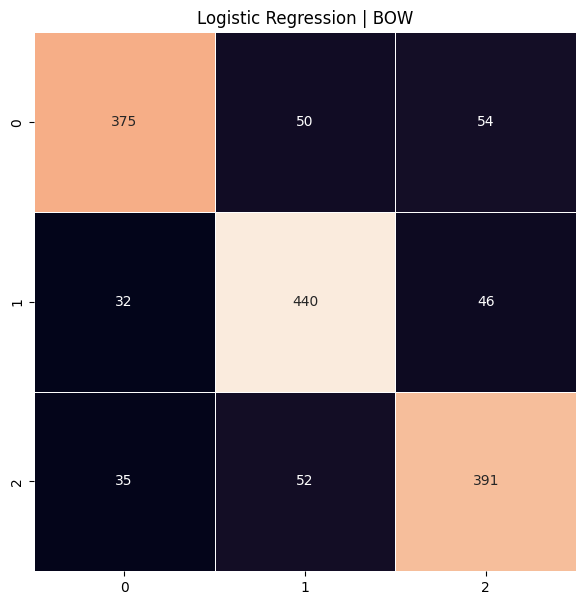

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_log)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_vectors, y_train)
predictions_tree = tree_clf.predict(test_vectors)
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)

Decision Tree Accuracy Score ->  75.11864406779661


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1157
           1       0.70      0.70      0.70       191

    accuracy                           0.91      1348
   macro avg       0.82      0.82      0.82      1348
weighted avg       0.91      0.91      0.91      1348



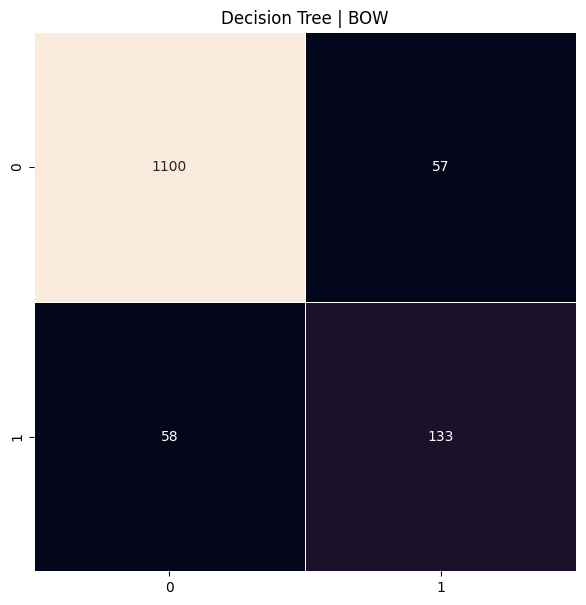

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | BOW")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Random forest

In [ ]:
train_vectors

<13266x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 121395 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest sınıflandırıcısını tanımla
rf_clf = RandomForestClassifier()

# Modeli eğit
rf_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_rf = rf_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf, y_test) * 100)


Random Forest Accuracy Score ->  80.8135593220339


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       479
           1       0.77      0.88      0.82       518
           2       0.81      0.79      0.80       478

    accuracy                           0.81      1475
   macro avg       0.81      0.81      0.81      1475
weighted avg       0.81      0.81      0.81      1475



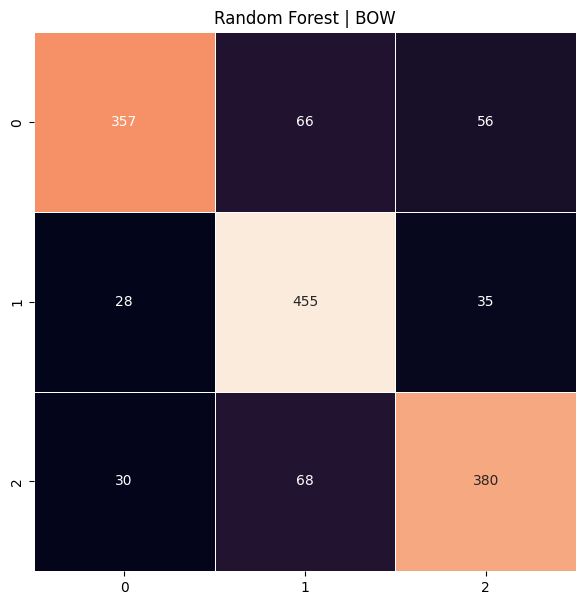

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest modeli için confusion matrix oluştur
cm_rf = confusion_matrix(y_test, predictions_rf)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Random Forest | BOW")
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


* #### [TF_IDF](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [KNN](#svm)
    * #### [LOGISTIC REG](#log)


######Kütüphanelerin Yüklenmesi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential


In [ ]:
#dirve da kullanacaksanız buras şart yoksa yorum satırına alınız
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bil482/
"""da db .csv nini yüklü olduğu klasör"""


Mounted at /content/drive
/content/drive/My Drive/Bil482


'da db .csv nini yüklü olduğu klasör'

In [ ]:
df=pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
df.isnull().values.any()

df.head(10)

id  \
index                        
5.770000e+17  5.770000e+17   
5.410000e+17  5.410000e+17   
5.680000e+17  5.680000e+17   
5.770000e+17  5.770000e+17   
5.710000e+17  5.710000e+17   
5.100000e+17  5.100000e+17   
5.590000e+17  5.590000e+17   
5.750000e+17  5.750000e+17   
5.650000e+17  5.650000e+17   
5.630000e+17  5.630000e+17   

                                                                                                                                                 Text  \
index                                                                                                                                                   
5.770000e+17                         @AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc   
5.410000e+17                                                                                                                                   #NULL!   
5.680000e+17  @jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.   
5.770000e+17                                          Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR   
5.710000e+17                                                                                                   @carolinesinders @herecomesfran *hugs*   
5.100000e+17                       Please, PLEASE start using "is your discernment blunted by steroids" to mean "are you on DRUGS?" from now on. DEAD   
5.590000e+17  @aymannathem As soon as ISIS chased all the minorities out of Mosul, the Sunni Arabs were happy to steal their property.  So fuck them.   
5.750000e+17                                                                      @Ali_Gharib @MaxBlumenthal Glad you like it. http://t.co/3ME3Nrk8xZ   
5.650000e+17          @HuffPostRelig Islam invaded and conquered 2/3 of Christiandom before any Christian crusades in response. The writer is a liar.   
5.630000e+17                                    @semzyxx Do you approve of your pedophile prophet raping a 9 year old girl, like it says in 7 hadith?   

             Annotation  oh_label  
index                              
5.770000e+17     racism         1  
5.410000e+17       none         0  
5.680000e+17     racism         1  
5.770000e+17       none         0  
5.710000e+17       none         0  
5.100000e+17       none         0  
5.590000e+17       none         0  
5.750000e+17       none         0  
5.650000e+17     racism         1  
5.630000e+17     racism         1

<Axes: xlabel='oh_label', ylabel='count'>

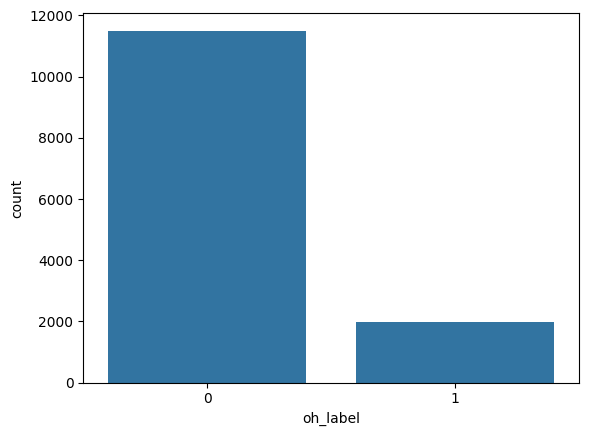

In [ ]:
import seaborn as sns
sns.countplot(x='oh_label', data=df)

In [ ]:
df.shape

(13471, 4)

In [ ]:
print(len(df))

13471


In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
df['Comment']=df['Text'].apply(str)

In [ ]:
X = []
sentences = list(df['Comment'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
y = df['oh_label']

In [ ]:
y.shape

(13471,)

###### %30-70

In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [ ]:
X_train.head()

6935              original patent filed finland application 
5920                     rsa shares closed time going press 
37                                  import duty wheat likely
576          refined soya oil futures weaken low spot demand
14176    brent climbs contract covering geopolitical tension
Name: hibrit, dtype: object

---
<a id="p1"></a>
###### TF-IDF

In [ ]:
#feature extraction with Tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(10318, 10000) (4423, 10000)


In [ ]:
print(test_vectors)

  (0, 1157)	0.10403683595474857
  (0, 1324)	0.24728913644608444
  (0, 2254)	0.19954818978007832
  (0, 2361)	0.34059264967740305
  (0, 2895)	0.2347752553953693
  (0, 3164)	0.29367371453795976
  (0, 3181)	0.25308725583645875
  (0, 4591)	0.16963877741140584
  (0, 4824)	0.13186675797383368
  (0, 5337)	0.2959980320764221
  (0, 6020)	0.21971833473140456
  (0, 6168)	0.10262019089858669
  (0, 6180)	0.2538777889472636
  (0, 6562)	0.26490737505380474
  (0, 7842)	0.22208363516797694
  (0, 8132)	0.2874428204417034
  (0, 8981)	0.28557223006298166
  (0, 9119)	0.1614647049141052
  (1, 1258)	0.39346505066219944
  (1, 1400)	0.34637129999797467
  (1, 2999)	0.4117998738990322
  (1, 3892)	0.1330519005517469
  (1, 5650)	0.34637129999797467
  (1, 7941)	0.23490117443359268
  (1, 7960)	0.2878611764521013
  :	:
  (1473, 178)	0.4019915475573169
  (1473, 182)	0.21903948265809162
  (1473, 184)	0.3440280253306727
  (1473, 307)	0.2706993534652673
  (1473, 1157)	0.12279163607326314
  (1473, 1295)	0.2642238988893711



<a id="nb"></a>
###### NB

In [ ]:
#use ML algorithms classifier
#use a Naive Bayes Classifier and train the model on the training set.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [ ]:
X_train

6935                                      original patent filed finland application 
5920                                             rsa shares closed time going press 
37                                                          import duty wheat likely
576                                  refined soya oil futures weaken low spot demand
14176                            brent climbs contract covering geopolitical tension
                                            ...                                     
5191                                  estimated annual value frame agreement eur mn 
13418                                               rs bosche touch rs sandeep wagle
5390                                 came aspo chemicals aspo shipping aspo systems 
860                    china agricultural bank sells billion debut green bond london
7270     according gallup food farm facts beef consumption totaled mn kilos finland 
Name: hibrit, Length: 10318, dtype: object

In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("Naive Bayes Accuracy Score -> ", accuracy_score(y_test,predicted)*100)


Naive Bayes Accuracy Score ->  75.49174768256839


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3431
           1       0.86      0.27      0.40       611

    accuracy                           0.88      4042
   macro avg       0.87      0.63      0.67      4042
weighted avg       0.88      0.88      0.85      4042



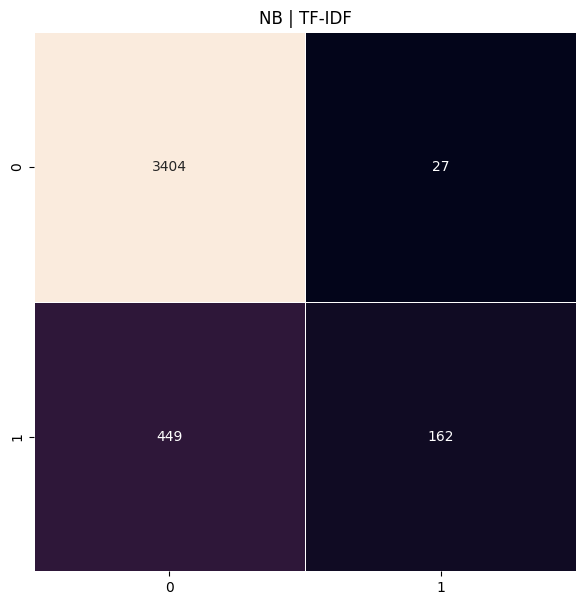

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

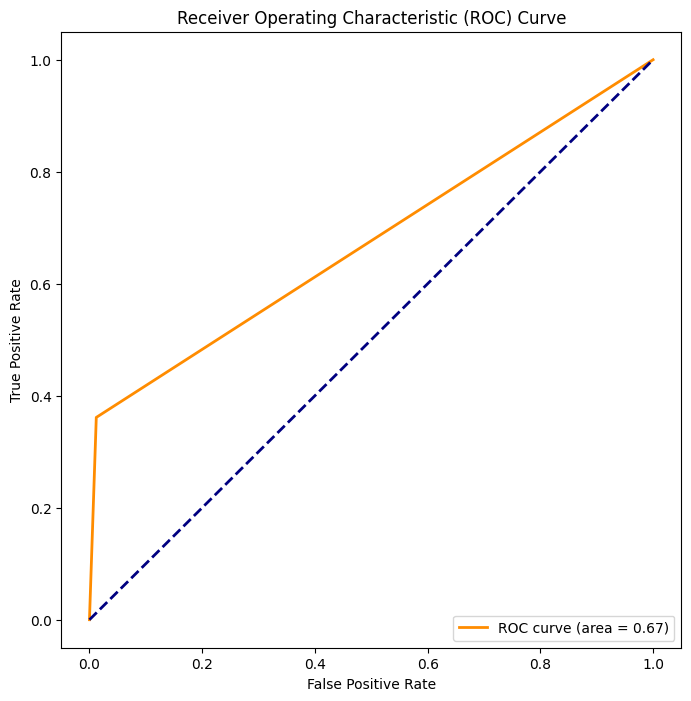

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<a id="svm"></a>
###### SVM  

In [ ]:
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model

SVM=svm.fit(train_vectors,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_vectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  80.60140176350893


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1443
           1       0.80      0.83      0.81      1508
           2       0.79      0.79      0.79      1472

    accuracy                           0.81      4423
   macro avg       0.81      0.81      0.81      4423
weighted avg       0.81      0.81      0.81      4423



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predictions_SVM)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: multiclass format is not supported

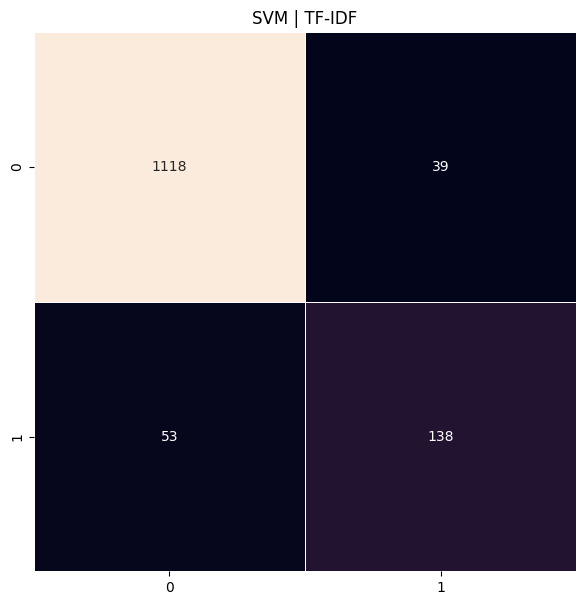

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(7,7))
plt.title("SVM | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


<a id="log"></a>
###### Log Reg

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  79.19963825457835


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1443
           1       0.78      0.83      0.81      1508
           2       0.77      0.77      0.77      1472

    accuracy                           0.79      4423
   macro avg       0.79      0.79      0.79      4423
weighted avg       0.79      0.79      0.79      4423



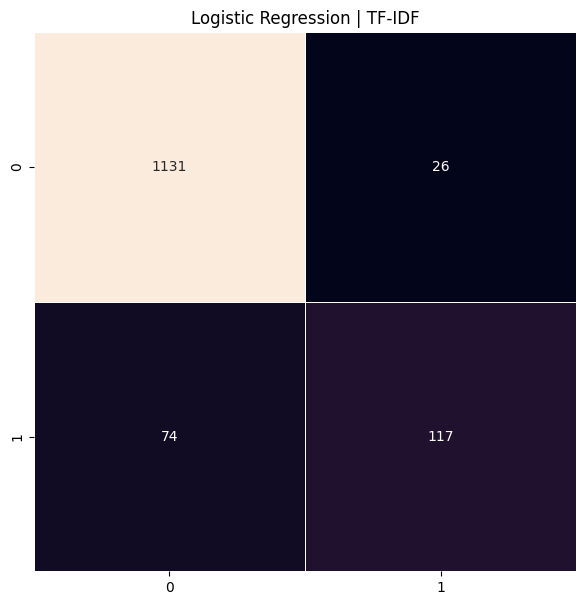

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_log)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

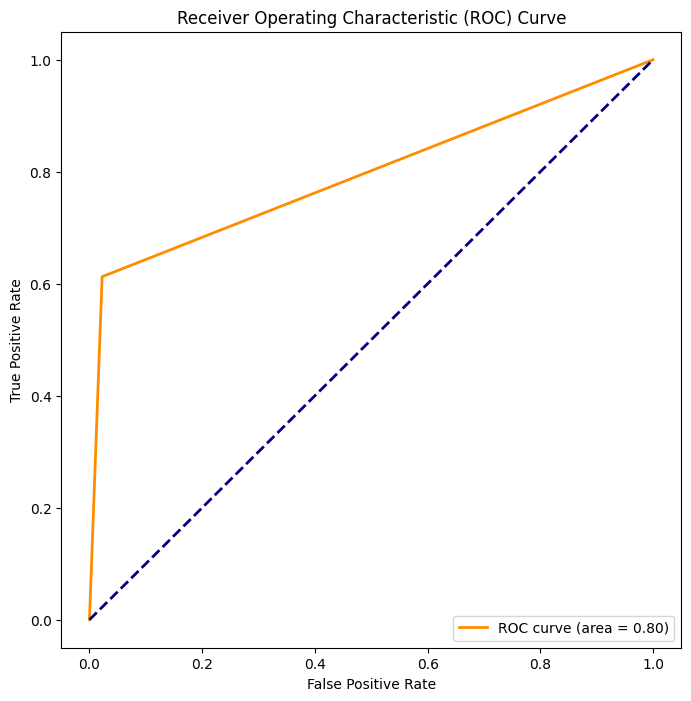

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predictions_log)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<a id="knn"></a>
###### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
number_of_neigbors = 5
minkowski_power = 2 # Manhattan Distance = 1, Euclidean Distance = 2
knn = KNeighborsClassifier(n_neighbors=number_of_neigbors, p =minkowski_power)
model_knn=knn.fit(train_vectors, y_train)
predictions_knn = model_knn.predict(test_vectors)
print("KNN Accuracy Score -> ",accuracy_score(predictions_knn, y_test)*100)





KNN Accuracy Score ->  65.61157585349311


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1157
           1       0.92      0.06      0.12       191

    accuracy                           0.87      1348
   macro avg       0.89      0.53      0.52      1348
weighted avg       0.87      0.87      0.81      1348



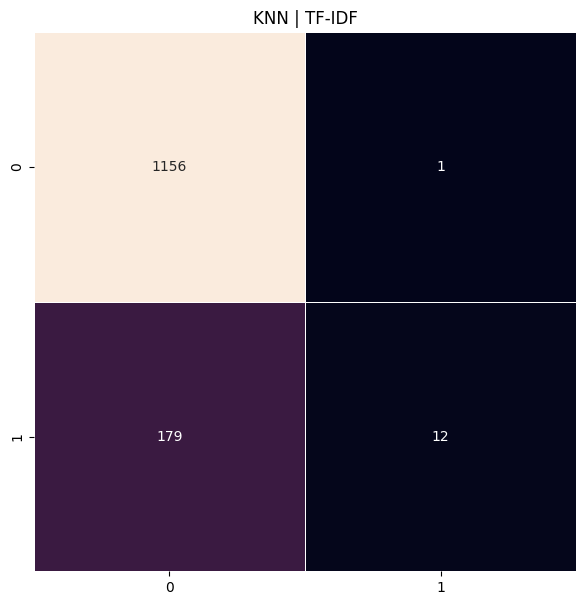

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_knn)
plt.figure(figsize=(7,7))
plt.title("KNN | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

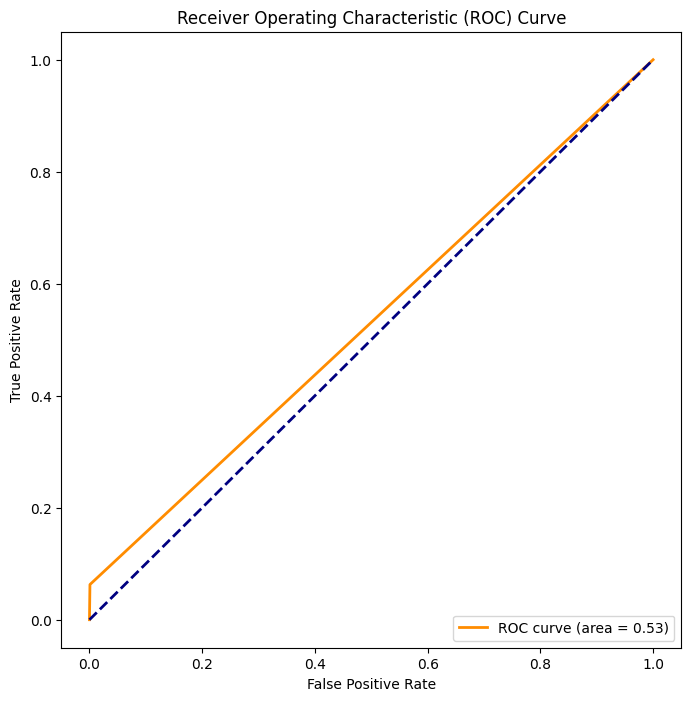

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predictions_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


###### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree sınıflandırıcısını tanımla
tree_clf = DecisionTreeClassifier()

# Modeli eğit
tree_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_tree = tree_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)


Decision Tree Accuracy Score ->  72.64300248699978


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_tree))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3431
           1       0.68      0.70      0.69       611

    accuracy                           0.91      4042
   macro avg       0.81      0.82      0.82      4042
weighted avg       0.91      0.91      0.91      4042



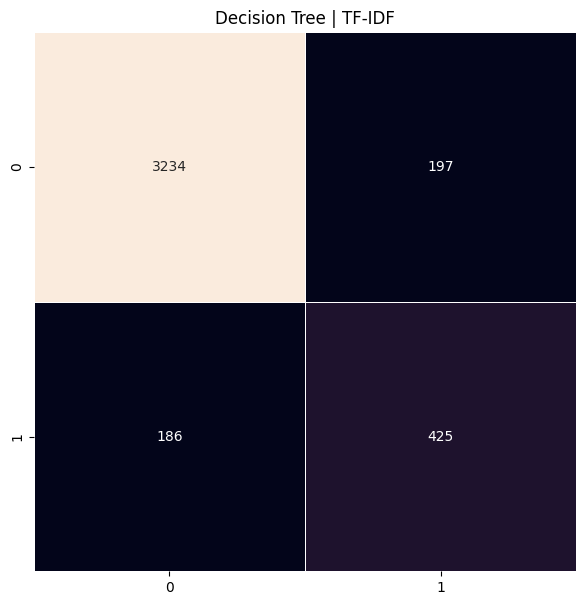

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | TF-IDF")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


######Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest sınıflandırıcısını tanımla
rf_clf = RandomForestClassifier()

# Modeli eğit
rf_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_rf = rf_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf, y_test) * 100)


Random Forest Accuracy Score ->  78.36310196699074


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_rf))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3431
           1       0.83      0.64      0.72       611

    accuracy                           0.93      4042
   macro avg       0.88      0.81      0.84      4042
weighted avg       0.92      0.93      0.92      4042



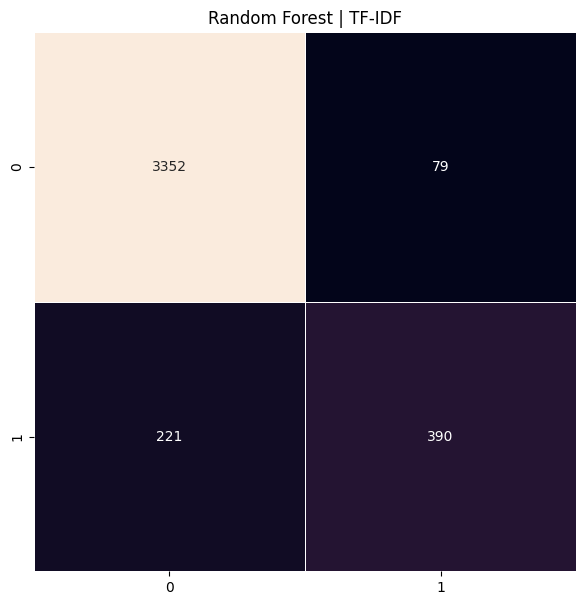

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest modeli için confusion matrix oluştur
cm_rf = confusion_matrix(y_test, predictions_rf)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Random Forest | TF-IDF")
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


* #### [W2V](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)


###### Kütüphanelerin eklenmesi

In [ ]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
#dirve da kullanacaksanız buras şart yoksa yorum satırına alınız
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bil482/  #çalışılacak drve dizinni


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/Bil482/ #çalışılacak drve dizinni'
/content/drive/My Drive/Bil482


'\n\ndata = pd.read_csv("db.csv",index_col=0)\ndata.isnull().values.any()\n\ndata.head()'

In [ ]:
data = pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
data=df

In [ ]:
data['Text'].isnull().values.any()

False

In [ ]:
data.head()

Text  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  
0           wipro , growth remain mirag     -1  
1  chines stock leav us investor vulner     -1  
2    us stock finish mix amid tech sell     -1  
3    opec reduc estim oil demand growth     -1  
4     immedi support rupe place bonanza     -1

In [ ]:
data.shape

(14741, 10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
data['Text'] = data['Text'].values.astype('U')
"""data['Text'] = data['Comment'].values.astype('U')"""

"data['Text'] = data['Comment'].values.astype('U')"

In [ ]:
data['Text'].head()

0                          At Wipro, growth remains a mirage
1           Why Chinese stocks leave US investors vulnerable
2              US stocks finish mixed amid more tech selling
3                 Opec reduces estimate on oil demand growth
4    Immediate support for rupee is placed at 55.10: Bonanza
Name: Text, dtype: object

**Word Embeddings**
1. Word2Vec Embeddings

- 100 dim,
- cbow

In [ ]:
tokenized_tweet = data['Text'].head(14741).apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=100,
            window=5, # context window size
            min_count=2,
            sg = 0, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['Text']), epochs=20)

(3621705, 4758360)

In [ ]:
tokenized_tweet


0                                                                                                                           [At, Wipro,, growth, remains, a, mirage]
1                                                                                                           [Why, Chinese, stocks, leave, US, investors, vulnerable]
2                                                                                                             [US, stocks, finish, mixed, amid, more, tech, selling]
3                                                                                                                 [Opec, reduces, estimate, on, oil, demand, growth]
4                                                                                                  [Immediate, support, for, rupee, is, placed, at, 55.10:, Bonanza]
                                                                                    ...                                                                             
14736                                                                                                [It, will, also, strengthen, Ruukki, 's, offshore, business, .]
14737                                                                                              [APL, Apollo, Tubes, hits, record, high;, HDFC, MF, buys, shares]
14738    [``, The, purchase, of, the, operations, is, part, of, YIT, 's, strategy, to, expand, its, offering, of, building, system, services, geographically, ., '']
14739                                                                                    [Sobha, Developers, heading, to, 200,, JP, stuck, at, 90:, Ashwani, Gujral]
14740                                                 [Decent, uptick, in, a, stock, like, Bharti, can, happen, if, Reliance, bids, aggressively:, Prashastha, Seth]
Name: Text, Length: 14741, dtype: object

In [ ]:
tokenized_tweet.shape

(14741,)

In [ ]:
null_count = 0
from contextlib import nullcontext

# Örnek bir tokenized_tweet listesi oluşturalım
tokenized_tweet = [{"Text": "#NULL!"}, {"Text": "some_text"}, {"Text": "#NULL!"}]

# Sözlük olup olmadığını kontrol edelim ve "Text" anahtarının varlığını kontrol edelim
for tweet in tokenized_tweet:
    if isinstance(tweet, dict) and "Text" in tweet:
        if tweet["Text"] == '#NULL!':
            null_count += 1

print(null_count)


2


In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary

            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
# Assuming 'model_w2v' is the Word2Vec model you trained earlier
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the word is not in the vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

In [ ]:
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(3, 100)

In [ ]:
# Assuming 'model_w2v' is the Word2Vec model you trained earlier
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the word is not in the vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape


(3, 100)

In [ ]:
print("tokenized_tweet:", len(tokenized_tweet))
print("wordvec_df:", wordvec_df.shape)
print("data['score']:", len(data['score']))

tokenized_tweet: 3
wordvec_df: (3, 100)
data['score']: 14741


In [ ]:
# 1. Tüm veriyi tokenize et (buradaki 'text' sütunun adı sana bağlı)
tokenized_tweet = [str(text).split() for text in data['Text']]  # veya kendi tokenizer'ın varsa kullan

# 2. Word2Vec modelini oluştur
from gensim.models import Word2Vec
model_w2v = Word2Vec(sentences=tokenized_tweet, vector_size=100, window=5, min_count=2)

# 3. Ortalama vektör fonksiyonu (seninkini aynen kullanıyoruz)
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

# 4. Tüm tweet'leri vektöre çevir
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)

# 5. Etiketlerle aynı uzunlukta mı kontrol et
print(wordvec_df.shape)         # (21863, 100) olmalı
print(len(data['score']))       # 21863 olmalı


(14741, 100)
14741


In [ ]:
wordvec_df

0         1         2         3         4         5         6   \
0     -0.297643  0.156087  0.057606  0.436275  0.013075 -0.206661  0.352258   
1     -0.480532  0.165764  0.023831  0.596833  0.200790 -0.011229  0.323574   
2     -0.470530  0.164903  0.009401  0.588252  0.189273 -0.025968  0.336691   
3     -0.448242  0.085396 -0.086499  0.531236  0.299685 -0.021550  0.371368   
4     -0.541637  0.259677 -0.080336  0.364204  0.112392 -0.159056  0.337642   
...         ...       ...       ...       ...       ...       ...       ...   
14736 -0.657599  0.582614  0.014823  0.642846  0.022693 -0.344296  0.294404   
14737 -0.320645  0.052133 -0.023015  0.438786  0.160293 -0.044536  0.309873   
14738 -0.610463  0.495922 -0.008441  0.543945  0.015269 -0.351351  0.352187   
14739 -0.330939  0.060621 -0.024972  0.300859  0.113825  0.000683  0.328432   
14740 -0.355811  0.158960  0.019528  0.401704  0.080071 -0.096008  0.291756   

             7         8         9   ...        90        91        92  \
0      0.412192 -0.528386 -0.342931  ...  0.237992 -0.061373  0.069473   
1      0.240515 -0.041896 -0.143915  ...  0.049470 -0.252740  0.355492   
2      0.275984 -0.090734 -0.157906  ...  0.075500 -0.236546  0.342423   
3      0.401566 -0.133254 -0.210832  ...  0.198408 -0.126764  0.342616   
4      0.549653 -0.591998 -0.319328  ...  0.298975 -0.136844  0.226644   
...         ...       ...       ...  ...       ...       ...       ...   
14736  0.502932 -1.192512 -0.388998  ...  0.277055 -0.186289  0.156814   
14737  0.315002 -0.086745 -0.197255  ...  0.167342 -0.123734  0.282123   
14738  0.624815 -1.253202 -0.446648  ...  0.354729 -0.101051  0.125589   
14739  0.315451 -0.254790 -0.250559  ...  0.141985 -0.036447  0.212404   
14740  0.310774 -0.327357 -0.229972  ...  0.140935 -0.112971  0.176200   

             93        94        95        96        97        98        99  
0      0.342019  0.595015  0.374960  0.378249 -0.504378  0.086370 -0.153003  
1      0.245062  0.534066  0.450932  0.311721 -0.303190  0.071696 -0.156760  
2      0.257282  0.576018  0.461032  0.326324 -0.332863  0.058399 -0.158848  
3      0.360050  0.782379  0.612993  0.316392 -0.447936 -0.134101 -0.159399  
4      0.354761  0.761412  0.455701  0.438311 -0.594581  0.058332 -0.170611  
...         ...       ...       ...       ...       ...       ...       ...  
14736  0.298216  0.770607  0.706048  0.558686 -0.616257  0.351569 -0.168139  
14737  0.266716  0.580013  0.436814  0.293081 -0.369286 -0.072597 -0.114078  
14738  0.374484  0.834592  0.691608  0.579467 -0.732512  0.293071 -0.193761  
14739  0.386746  0.580238  0.308701  0.368793 -0.455034 -0.141090 -0.062449  
14740  0.287978  0.511675  0.333135  0.347843 -0.391249  0.061545 -0.113355  

[14741 rows x 100 columns]

**2. Doc2Vec Embedding**

- 100 dim,


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

###### **Word2Vec Features**

> Blok alıntı ekle



In [ ]:
from sklearn.model_selection import train_test_split

train_w2v = wordvec_df.iloc[:150000, :]
test_w2v = wordvec_df.iloc[150000:, :]
"""
# Splitting data into training and validation set
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, data['BinaryNumTarget'],random_state=42,test_size=0.2)
"""

# Splitting data into training and validation set
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, data['score'],random_state=42,test_size=0.2)


In [ ]:
yvalid.head()

9512     0
8014     0
8596     0
1714    -1
11210    1
Name: score, dtype: int64

In [ ]:
ytrain

10708    1
10857    1
2640    -1
1250    -1
6834     0
        ..
5191     0
13418    1
5390     0
860     -1
7270     0
Name: score, Length: 11792, dtype: int64

In [ ]:
test_w2v.shape

(0, 100)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
lreg = linear_model.LogisticRegression()

###### **1. Logistic Regression**

In [ ]:
lreg.fit(xtrain_w2v, ytrain)

LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Ölçeklendirme işlemi (özellikle Word2Vec gibi vektörlerde önerilir)
scaler = StandardScaler()
xtrain_w2v_scaled = scaler.fit_transform(xtrain_w2v)
xvalid_w2v_scaled = scaler.transform(xvalid_w2v)

# Modeli tanımla ve max_iter artır
lreg = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial'
)

# Eğit
lreg.fit(xtrain_w2v_scaled, ytrain)

# Tahmin yap
prediction = lreg.predict(xvalid_w2v_scaled)

# F1 skorunu hesapla (çok sınıflı olduğun için average='macro')
f1 = f1_score(yvalid, prediction, average='macro')
print("F1 Score (macro):", f1)

F1 Score (macro): 0.5510771777571556


In [ ]:
"""lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)

# Assuming prediction_int is the binary predictions based on a threshold
prediction_int = (prediction[:, 1] >= 0.3).astype(int)

f1_score_result = f1_score(yvalid, prediction_int)
print("F1 Score:", f1_score_result)"""


'lreg.fit(xtrain_w2v, ytrain)\n\nprediction = lreg.predict_proba(xvalid_w2v)\n\n# Assuming prediction_int is the binary predictions based on a threshold\nprediction_int = (prediction[:, 1] >= 0.3).astype(int)\n\nf1_score_result = f1_score(yvalid, prediction_int)\nprint("F1 Score:", f1_score_result)'

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction))

              precision    recall  f1-score   support

          -1       0.58      0.53      0.56       984
           0       0.61      0.66      0.63      1007
           1       0.47      0.46      0.46       958

    accuracy                           0.55      2949
   macro avg       0.55      0.55      0.55      2949
weighted avg       0.55      0.55      0.55      2949



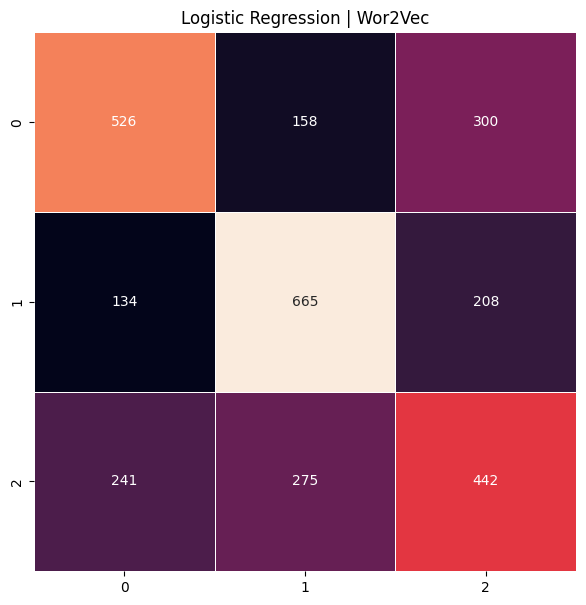

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | Wor2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### **2. Support Vector Machine**

In [ ]:
from sklearn import svm


In [ ]:
import numpy as np
from sklearn import svm
from sklearn.metrics import f1_score

# Modeli eğit
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

# Olasılık tahmini
prediction_proba = svc.predict_proba(xvalid_w2v)

# Sınıf tahmini: en yüksek olasılığa sahip sınıf
prediction_int = np.argmax(prediction_proba, axis=1)

# f1 skoru hesapla
f1 = f1_score(yvalid, prediction_int, average='macro')
print("F1 Score (macro):", f1)


F1 Score (macro): 0.09910585615092363


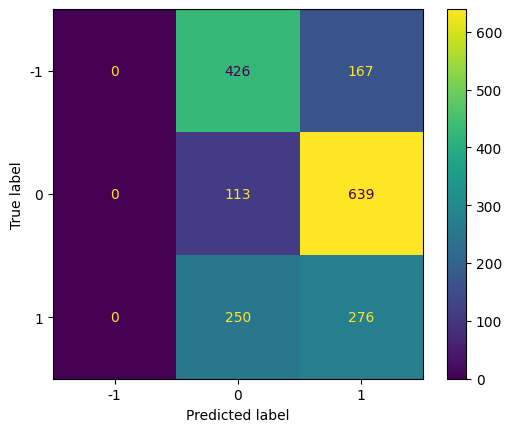

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(yvalid, prediction_int, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()


In [ ]:
import numpy as np
from sklearn import svm
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1 = f1_score(yvalid, prediction, average='macro')
print("F1 Score (macro):", f1)
#f1_score(yvalid, prediction_int)


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction_int))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       494
           1       0.48      0.44      0.46       106

    accuracy                           0.82       600
   macro avg       0.68      0.67      0.68       600
weighted avg       0.81      0.82      0.81       600



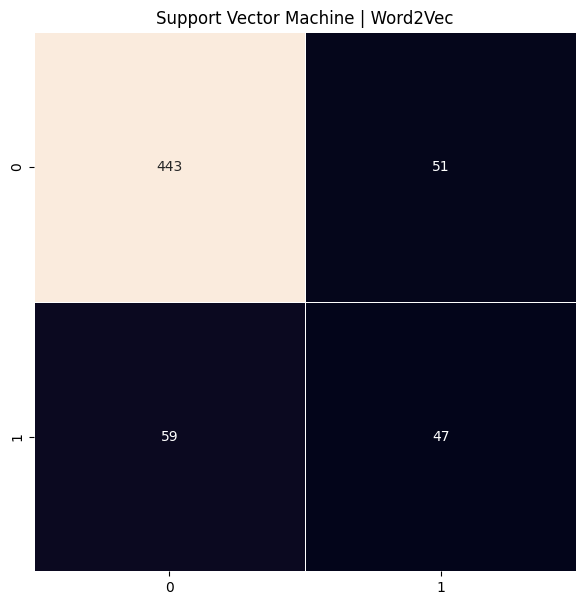

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_int)
plt.figure(figsize=(7,7))
plt.title("Support Vector Machine | Word2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

**3. dt**

>**Word2Vec Features**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier().fit(xtrain_w2v, ytrain)

prediction_r = dt.predict(xvalid_w2v)
f1_score(yvalid, prediction_r)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction_r))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       494
           1       0.28      0.33      0.30       106

    accuracy                           0.73       600
   macro avg       0.56      0.57      0.57       600
weighted avg       0.75      0.73      0.74       600



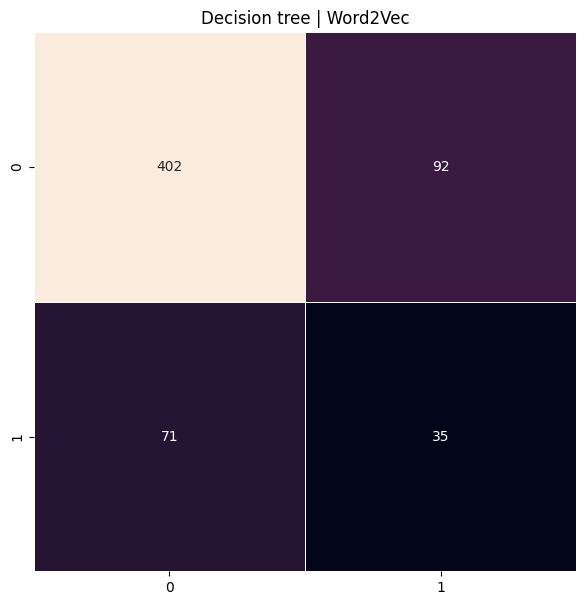

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_r)
plt.figure(figsize=(7,7))
plt.title("Decision tree | Word2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### NB

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_w2v, ytrain)
# Vektörlerde negatif değerleri kaldırmak için mutlak değeri alıyoruz
xtrain_w2v = np.abs(xtrain_w2v)
xvalid_w2v = np.abs(xvalid_w2v)

# Naive Bayes modelini oluştur ve eğit
nb_model = MultinomialNB()
nb_model.fit(xtrain_w2v, ytrain)

# Tahmin yap
predictions = nb_model.predict(xvalid_w2v)

# Değerlendirme
print(classification_report(yvalid, predictions))
print("F1 Score (macro):", f1_score(yvalid, predictions, average='macro'))



              precision    recall  f1-score   support

          -1       0.45      0.56      0.50       984
           0       0.53      0.68      0.59      1007
           1       0.39      0.18      0.24       958

    accuracy                           0.47      2949
   macro avg       0.46      0.47      0.44      2949
weighted avg       0.46      0.47      0.45      2949

F1 Score (macro): 0.4439134849113286


In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(xvalid_w2v)
print("Naive Bayes Accuracy Score -> ", accuracy_score(yvalid,predicted)*100)


Naive Bayes Accuracy Score ->  47.4059003051882


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, predicted))

              precision    recall  f1-score   support

          -1       0.45      0.56      0.50       984
           0       0.53      0.68      0.59      1007
           1       0.39      0.18      0.24       958

    accuracy                           0.47      2949
   macro avg       0.46      0.47      0.44      2949
weighted avg       0.46      0.47      0.45      2949



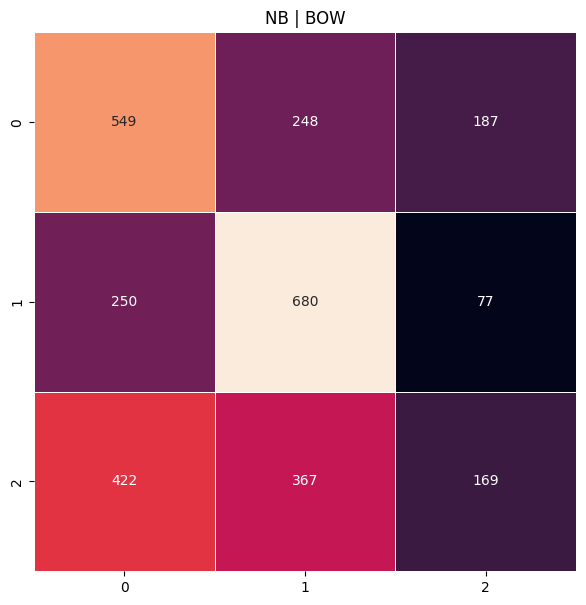

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

* #### [LSTM](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)


In [ ]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

/kaggle/input/amazon-product-reviews/amazon.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/BİL482/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/BİL482/'
/content/drive/My Drive/Bil482


In [ ]:
train_df = pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
train_df.isnull().values.any()

False

In [ ]:
train_df.head()

id  \
index                        
5.770000e+17  5.770000e+17   
5.410000e+17  5.410000e+17   
5.680000e+17  5.680000e+17   
5.770000e+17  5.770000e+17   
5.710000e+17  5.710000e+17   

                                                                                                                                                 Text  \
index                                                                                                                                                   
5.770000e+17                         @AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc   
5.410000e+17                                                                                                                                   #NULL!   
5.680000e+17  @jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.   
5.770000e+17                                          Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR   
5.710000e+17                                                                                                   @carolinesinders @herecomesfran *hugs*   

             Annotation  oh_label  
index                              
5.770000e+17     racism         1  
5.410000e+17       none         0  
5.680000e+17     racism         1  
5.770000e+17       none         0  
5.710000e+17       none         0

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'(.)\1{2,}', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'\b(\w+)\s+(\1\s+){2,}', r'\1 ', text)
    text = re.sub(r'[^a-zA-Z\s,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

def preprocess_text2(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'[^a-zA-Z\s,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
preprocess_data=lambda text:preprocess_text(text)
train_df["Text_prepro"]=train_df["Text"].apply(preprocess_data)

In [ ]:
train_df

id  \
index                        
5.770000e+17  5.770000e+17   
5.410000e+17  5.410000e+17   
5.680000e+17  5.680000e+17   
5.770000e+17  5.770000e+17   
5.710000e+17  5.710000e+17   
...                    ...   
5.760000e+17  5.760000e+17   
5.580000e+17  5.580000e+17   
5.760000e+17  5.760000e+17   
5.760000e+17  5.760000e+17   
5.760000e+17  5.760000e+17   

                                                                                                                                                             Text  \
index                                                                                                                                                               
5.770000e+17                                     @AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc   
5.410000e+17                                                                                                                                               #NULL!   
5.680000e+17              @jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.   
5.770000e+17                                                      Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR   
5.710000e+17                                                                                                               @carolinesinders @herecomesfran *hugs*   
...                                                                                                                                                           ...   
5.760000e+17                                                                                                     #mkr NOOOOO!!! I wanted Kat and Andre to lose!!!   
5.580000e+17  RT @MumtazCeltik: @WhiteHouse @VP \n\n#Kobane \n\n#JeSuisCharlie \n\n'Turkish military says MIT shipped weapons to al-Qaeda'\n@fehimtastekin►►http…   
5.760000e+17                                                                    Glad the proper competition is starting and even happier that Colin is back. #mkr   
5.760000e+17                                 No worries Pete and Manu, take all the time off you need. In fact, feel free to fuck right off - I prefer Colin #mkr   
5.760000e+17         @mykitchenrules #mkr please kick off that lady who is such a rude person. She has such a crappy attitude towards the others. Shes gave a one   

             Annotation  oh_label  \
index                               
5.770000e+17     racism         1   
5.410000e+17       none         0   
5.680000e+17     racism         1   
5.770000e+17       none         0   
5.710000e+17       none         0   
...                 ...       ...   
5.760000e+17       none         0   
5.580000e+17       none         0   
5.760000e+17       none         0   
5.760000e+17       none         0   
5.760000e+17       none         0   

                                                                                                                    Text_prepro  
index                                                                                                                            
5.770000e+17                                       aalwuhaib muslim mob violenc hindu bangladesh continu islam httptcocjbwjwurc  
5.410000e+17                                                                                                               null  
5.680000e+17                 jncatron israjourisra ampalestin islamophobia like idea naziphobia islam religion hate must outlaw  
5.770000e+17                                                 final 'm caught , sudden death cook look like 's gon na intens mkr  
5.710000e+17                                                                                     carolinesind herecomesfran hug  
...                                                                                            

In [ ]:
X=train_df.drop(["Text","oh_label"],axis=1)
y=train_df["oh_label"]

In [ ]:
X

id Annotation  \
index                                   
5.770000e+17  5.770000e+17     racism   
5.410000e+17  5.410000e+17       none   
5.680000e+17  5.680000e+17     racism   
5.770000e+17  5.770000e+17       none   
5.710000e+17  5.710000e+17       none   
...                    ...        ...   
5.760000e+17  5.760000e+17       none   
5.580000e+17  5.580000e+17       none   
5.760000e+17  5.760000e+17       none   
5.760000e+17  5.760000e+17       none   
5.760000e+17  5.760000e+17       none   

                                                                                                                    Text_prepro  
index                                                                                                                            
5.770000e+17                                       aalwuhaib muslim mob violenc hindu bangladesh continu islam httptcocjbwjwurc  
5.410000e+17                                                                                                               null  
5.680000e+17                 jncatron israjourisra ampalestin islamophobia like idea naziphobia islam religion hate must outlaw  
5.770000e+17                                                 final 'm caught , sudden death cook look like 's gon na intens mkr  
5.710000e+17                                                                                     carolinesind herecomesfran hug  
...                                                                                                                         ...  
5.760000e+17                                                                                           mkr n want kat andr lose  
5.580000e+17  rt mumtazceltik whitehous vp koban jesuischarli 'turkish militari say mit ship weapon alqaeda' fehimtastekin http  
5.760000e+17                                                             glad proper competit start even happier colin back mkr  
5.760000e+17                                      worri pete manu , take time need fact , feel free fuck right prefer colin mkr  
5.760000e+17                              mykitchenrul mkr pleas kick ladi rude person crappi attitud toward other she gave one  

[13471 rows x 3 columns]

In [ ]:
y

index
5.770000e+17    1
5.410000e+17    0
5.680000e+17    1
5.770000e+17    0
5.710000e+17    0
               ..
5.760000e+17    0
5.580000e+17    0
5.760000e+17    0
5.760000e+17    0
5.760000e+17    0
Name: oh_label, Length: 13471, dtype: int64

In [ ]:
tokenized_documents=[preprocess_text2(doc) for doc in X["Text_prepro"]]

In [ ]:
len(tokenized_documents)

13471

In [ ]:
tokenized_documents[0]

['aalwuhaib',
 'muslim',
 'mob',
 'violenc',
 'hindu',
 'bangladesh',
 'continu',
 'islam',
 'httptcocjbwjwurc']

In [ ]:
from gensim.models import Word2Vec
ukuran_vektor=100
word2vec_model = Word2Vec(sentences=tokenized_documents,
                          min_count=1, vector_size=ukuran_vektor,sg=1)

In [ ]:
print(word2vec_model)

Word2Vec<vocab=16523, vector_size=100, alpha=0.025>


In [ ]:
all_words =word2vec_model.wv.index_to_key
print("50 kata pertama dalam model Word2Vec:")
for index, word in enumerate(all_words):
    if index < 50:
        print(f"{word} : {index}")
    else:
        break

50 kata pertama dalam model Word2Vec:
, : 0
mkr : 1
rt : 2
's : 3
n't : 4
islam : 5
like : 6
muslim : 7
kat : 8
'm : 9
go : 10
get : 11
peopl : 12
amp : 13
one : 14
would : 15
isi : 16
andr : 17
women : 18
think : 19
make : 20
time : 21
want : 22
know : 23
say : 24
look : 25
cook : 26
've : 27
're : 28
good : 29
see : 30
fuck : 31
thing : 32
realli : 33
ca : 34
need : 35
murder : 36
use : 37
maxblumenth : 38
kill : 39
even : 40
oh : 41
moham : 42
tri : 43
talk : 44
year : 45
show : 46
way : 47
hate : 48
love : 49


In [ ]:
max_length = train_df['Text_prepro'].apply(lambda x: len(x.split())).max()

In [ ]:
max_length

24

In [ ]:
max_length_index = train_df['Text_prepro'].apply(len).idxmax()
print("Index baris dengan max_length adalah :", max_length_index)

Index baris dengan max_length adalah : 5.65e+17


In [ ]:
train_df.at[max_length_index, 'Text_prepro']

index
5.650000e+17                      huffpostrelig islam invad conquer christiandom christian crusad respons writer liar
5.650000e+17                       dylanw 's cool next time woman talk approach classist , might want complet dismiss
5.650000e+17    accord ralphreject , gdc place rich peopl drinkdo drug jeez , guy guess 'll bring enough wine share ,
5.650000e+17                                              safya abusaalihah probabl anyon like replac assad even evil
5.650000e+17                                        dylanw dismiss amp concern argument might wan na check time stamp
                                                                ...                                                  
5.650000e+17                                             westcoastanim chriswarcraft n bey sorri still nation treasur
5.650000e+17          rt mhoy freebsdgirl year , somebodi 'll never meet sit hospit bed inexplic worri balanc parenth
5.650000e+17                                     r

In [ ]:
train_df.at[max_length_index, 'Text']

index
5.650000e+17                 @HuffPostRelig Islam invaded and conquered 2/3 of Christiandom before any Christian crusades in response. The writer is a liar.
5.650000e+17       @dylanw that's cool. next time when a woman talks to him about how his approach is classist, he might want to not completely dismiss her.
5.650000e+17     According to ralphreject, GDC is just a place for rich people to drink/do drugs. Jeez, guys. I guess I'll bring enough wine to share, then.
5.650000e+17                                                @Safya77 @AbuSaalihah1 Probably because anyone who is likely to replace Assad is even more evil.
5.650000e+17                               @dylanw I did that after he dismissed me &amp; my concerns as "argumentative". Might wanna check the time stamps.
                                                                                    ...                                                                     
5.650000e+17                                        

In [ ]:
sequences = [[word2vec_model.wv.key_to_index[word] for word in text]
             for text in [preprocess_text2(doc) for doc in X['Text_prepro']]]

In [ ]:
len(sequences)

13471

In [ ]:
sequences[0]

[703, 7, 824, 456, 533, 3292, 463, 5, 9974]

In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
padded_sequences.shape

(13471, 24)

In [ ]:
y = np.asarray(train_df['oh_label'])

In [ ]:
jumlah_kelas=len(train_df["oh_label"].unique())

In [ ]:
jumlah_kelas

2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, y,
                                            test_size=0.3,
                                            random_state=42, stratify=y)

NameError: name 'padded_sequences' is not defined

In [ ]:
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.vector_size))
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input,Embedding,GlobalMaxPooling1D
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                  trainable=False))
model.add(LSTM(ukuran_vektor, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(jumlah_kelas, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/500
37/37 [==============================] - 7s 118ms/step - loss: 0.6764 - accuracy: 0.7163 - val_loss: 0.6439 - val_accuracy: 0.8538
Epoch 2/500
37/37 [==============================] - 5s 124ms/step - loss: 0.5862 - accuracy: 0.8537 - val_loss: 0.4878 - val_accuracy: 0.8538
Epoch 3/500
37/37 [==============================] - 5s 139ms/step - loss: 0.4188 - accuracy: 0.8537 - val_loss: 0.4001 - val_accuracy: 0.8538
Epoch 4/500
37/37 [==============================] - 4s 102ms/step - loss: 0.4006 - accuracy: 0.8537 - val_loss: 0.3964 - val_accuracy: 0.8538
Epoch 5/500
37/37 [==============================] - 4s 101ms/step - loss: 0.3963 - accuracy: 0.8537 - val_loss: 0.3922 - val_accuracy: 0.8538
Epoch 6/500
37/37 [==============================] - 6s 165ms/step - loss: 0.3906 - accuracy: 0.8537 - val_loss: 0.3866 - val_accuracy: 0.8538
Epoch 7/500
37/37 [==============================] - 4s 99ms/step - loss: 0.3818 - accuracy: 0.8537 - val_loss: 0.3715 - val_accuracy: 0.8538


In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 91.91%


In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(model.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding', 'trainable': False, 'dtype': 'float32', 'batch_input_shape': (None, None), 'input_dim': 16524, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': None}


In [ ]:
print("Bobot Lapisan Embedding:")
print(model.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[-0.02519077 -0.0083349  -0.00507532 ... -0.00697542  0.00862303
  -0.01882677]
 [-0.01546945 -0.00932422  0.02222938 ...  0.02358159  0.01446393
  -0.01588584]
 [ 0.03186567 -0.0312441   0.02888137 ...  0.01442247  0.01631055
  -0.01324668]
 ...
 [-0.04440535  0.03652544  0.00264812 ... -0.02638056 -0.04821252
  -0.01761991]
 [-0.0196896   0.01364461  0.04395593 ... -0.04333179 -0.01244133
  -0.00198851]
 [ 0.03868104 -0.0088345   0.02324531 ... -0.01803076 -0.01778073
   0.00430964]]


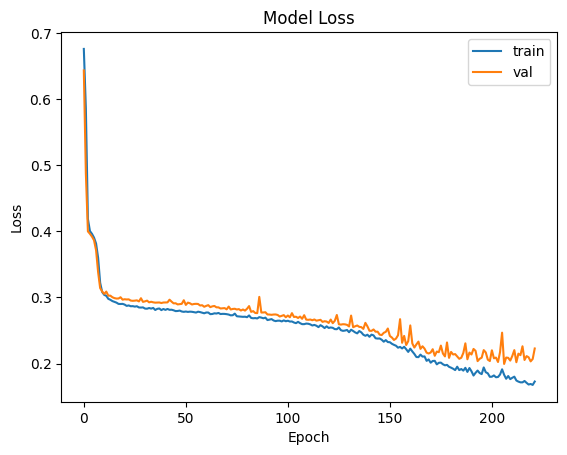

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

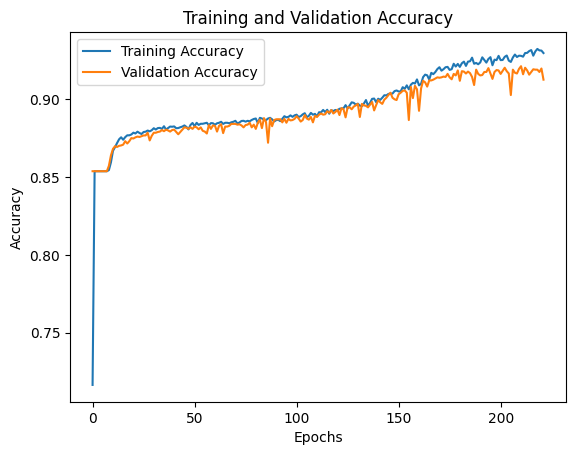

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 100)           1652400   
                                                                 
 lstm (LSTM)                 (None, 24, 100)           80400     
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

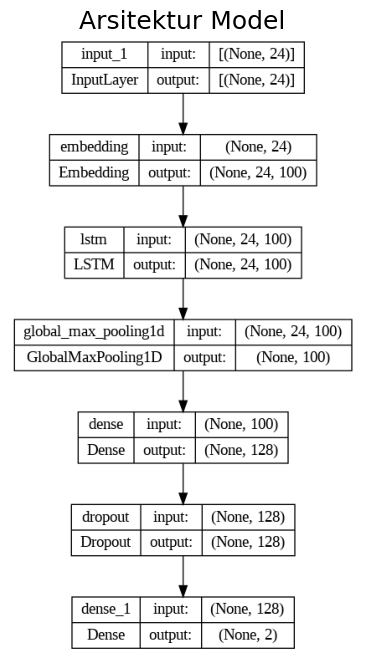

In [ ]:
from keras.utils import plot_model
file_name = 'arsitektur_model.png'
plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,8))
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Arsitektur Model', fontsize=18)
plt.axis('off')
plt.savefig(file_name)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_val, y_pred_classes)
print("Classification Report:")
print(report)

127/127 [==============================] - 2s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3451
           1       0.76      0.66      0.70       591

    accuracy                           0.92      4042
   macro avg       0.85      0.81      0.83      4042
weighted avg       0.92      0.92      0.92      4042



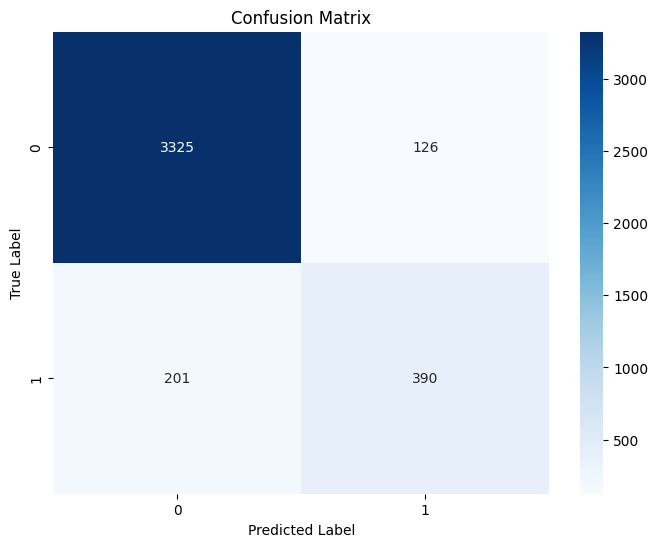

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("model_Amazon_Product_Reviews.h5")
word2vec_model.save("word2vec_model.model")
train_df.to_csv("train_data.csv", index=False)

# [3. USAirPrePro2 Sütununa göre](#b1)


* #### [Kütüphanelerin Yüklenmesi ve Veri Seti İşlemleri](#b1)

###### [1.Kütüphaneler yüklenmesi](#b1)

In [ ]:
# Gerekli kütüphaneleri belirtilen versiyonlarda kur
!pip install --upgrade --no-cache-dir numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 pandas==2.2.2 tensorflow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 tensorflow-decision-forests==1.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Gerekli kütüphaneler
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

#from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential


In [ ]:
"""from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping"""


'from tensorflow.keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM\nfrom tensorflow.keras.callbacks import EarlyStopping'

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


######[Dosyanın Yüklenmesi ve veri setinin incelenmesi](#b1)

In [ ]:
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bitirme/Datasets/
#df=pd.read_csv("Loan.csv",index_col=0)


""" # Yeni Bir dosya kaydetme koddunu buraya yazıyoruz
PreprocessedSon2_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon2_df.csv'
df.to_csv(PreprocessedSon2_df_file_path, index=False)"""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Bitirme/Datasets


" # Yeni Bir dosya kaydetme koddunu buraya yazıyoruz\nPreprocessedSon2_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon2_df.csv'\ndf.to_csv(PreprocessedSon2_df_file_path, index=False)"

In [ ]:
"""
Kaggle API ile yükleme
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'"""

"\nKaggle API ile yükleme\nimport numpy as np\nimport pandas as pd\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\nos.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'"

In [ ]:
df=pd.read_csv("PreprocessedSon3_df.csv",index_col=0)

In [ ]:
df3=pd.read_csv("IMDB_df.csv",index_col=0)

In [ ]:
df2=pd.read_csv("USAir_balanced_df.csv",index_col=0)

In [ ]:
df4=pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
df2

score
text                                                                                                                                       
At Wipro, growth remains a mirage                                                                                                        -1
Why Chinese stocks leave US investors vulnerable                                                                                         -1
US stocks finish mixed amid more tech selling                                                                                            -1
Opec reduces estimate on oil demand growth                                                                                               -1
Immediate support for rupee is placed at 55.10: Bonanza                                                                                  -1
...                                                                                                                                     ...
It will also strengthen Ruukki 's offshore business .                                                                                     1
APL Apollo Tubes hits record high; HDFC MF buys shares                                                                                    1
`` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . ''       1
Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral                                                                           1
Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth                                            1

[14741 rows x 1 columns]

In [ ]:
df.head()

tokens  \
Text                                                                                                                         
At Wipro, growth remains a mirage                                               ["['Micro', 'growth', 'remain', 'murat']"]   
Why Chinese stocks leave US investors vulnerable         ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
US stocks finish mixed amid more tech selling                 ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
Opec reduces estimate on oil demand growth                  ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
Immediate support for rupee is placed at 55.10: Bonanza   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

                                                         text_length  \
Text                                                                   
At Wipro, growth remains a mirage                                 33   
Why Chinese stocks leave US investors vulnerable                  48   
US stocks finish mixed amid more tech selling                     45   
Opec reduces estimate on oil demand growth                        42   
Immediate support for rupee is placed at 55.10: Bonanza           55   

                                                                                               hibrit  \
Text                                                                                                    
At Wipro, growth remains a mirage                                         wipro growth remains mirage   
Why Chinese stocks leave US investors vulnerable         chinese stocks leave us investors vulnerable   
US stocks finish mixed amid more tech selling                us stocks finish mixed amid tech selling   
Opec reduces estimate on oil demand growth                    opec reduces estimate oil demand growth   
Immediate support for rupee is placed at 55.10: Bonanza        immediate support rupee placed bonanza   

                                                                                 USAirPrePro  \
Text                                                                                           
At Wipro, growth remains a mirage                                  wipro growth remain mirag   
Why Chinese stocks leave US investors vulnerable         chines stock leav u investor vulner   
US stocks finish mixed amid more tech selling              u stock finish mix amid tech sell   
Opec reduces estimate on oil demand growth                opec reduc estim oil demand growth   
Immediate support for rupee is placed at 55.10: Bonanza    immedi support rupe place bonanza   

                                                                                      USAirPrePro2  \
Text                                                                                                 
At Wipro, growth remains a mirage                                      wipro growth remains mirage   
Why Chinese stocks leave US investors vulnerable         chinese stock leave u investor vulnerable   
US stocks finish mixed amid more tech selling               u stock finish mixed amid tech selling   
Opec reduces estimate on oil demand growth                 opec reduces estimate oil demand growth   
Immediate support for rupee is placed at 55.10: Bonanza     immediate support rupee placed bonanza   

                                                                                        MuammerNLPPrePRro  \
Text                                                                                                        
At Wipro, growth remains a mirage                                          At Wipro growth remains mirage   
Why Chinese stocks leave US investors vulnerable         Why Chinese stocks leave US investors vulnerable   
US stocks finish mixed amid more tech selling               US stocks finish mixed amid more tech selling   
Opec reduces estimate on oil demand growth                 

In [ ]:
#df2 = df2.reset_index()

In [ ]:

df = df.reset_index()
df.isnull().values.any()

df.head()

Text  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  oh_label  
0           wipro , growth remain mirag     -1         0  
1  chines stock leav us investor vulner     -1         0  
2    us stock finish mix amid tech sell     -1         0  
3    opec reduc estim oil demand growth     -1         0  
4     immedi support rupe place bonanza     -1         0

In [ ]:
df.columns

Index(['Text', 'tokens', 'text_length', 'hibrit', 'USAirPrePro',
       'USAirPrePro2', 'MuammerNLPPrePRro', 'MuammerNLPPrePRro2',
       'MuammerNLPLSTMPrePRro', 'score', 'oh_label'],
      dtype='object')

In [ ]:
#df = df.drop(columns=['index'])


In [ ]:
df.shape

(14741, 11)

In [ ]:
print(len(df))

14741


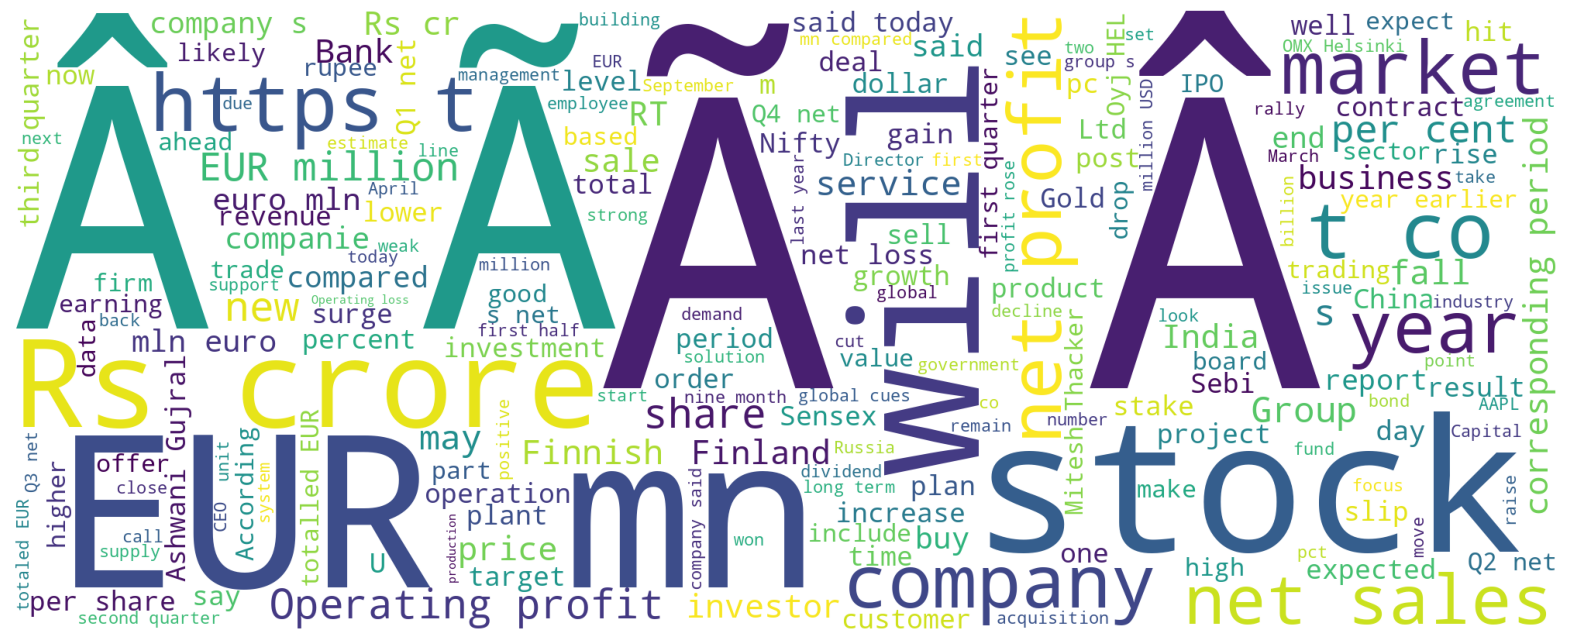

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in df.Text)
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###### [x ve y değerlerinin belirlenmesi ve train tesst ayrımı](#b1)

In [ ]:
x = df['USAirPrePro2']
x

0                                                                        wipro growth remains mirage
1                                                          chinese stock leave u investor vulnerable
2                                                             u stock finish mixed amid tech selling
3                                                            opec reduces estimate oil demand growth
4                                                             immediate support rupee placed bonanza
                                                    ...                                             
14736                                                       also strengthen ruukki offshore business
14737                                              apl apollo tube hit record high hdfc mf buy share
14738    purchase operation part yit strategy expand offering building system service geographically
14739                                                sobha developer heading jp stuck ashwani gujral
14740               decent uptick stock like bharti happen reliance bid aggressively prashastha seth
Name: USAirPrePro2, Length: 14741, dtype: object

In [ ]:
y = df['oh_label']
y

0        0
1        0
2        0
3        0
4        0
        ..
14736    2
14737    2
14738    2
14739    2
14740    2
Name: oh_label, Length: 14741, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

* #### [BOW](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)
    * #### [Decission Tree](#log)
    * #### [Random Forest](#log)
    
    

###### [1.Kütüphaneler yüklenmesi](#b1)

In [ ]:
# Gerekli kütüphaneleri belirtilen versiyonlarda kur
!pip install --upgrade --no-cache-dir numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 pandas==2.2.2 tensorflow==2.18.0 tensorflow-text==2.18.1 tf-keras==2.18.0 tensorflow-decision-forests==1.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Gerekli kütüphaneler
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

#from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential


In [ ]:
"""from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping"""


'from tensorflow.keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM\nfrom tensorflow.keras.callbacks import EarlyStopping'

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


######[Dosyanın Yüklenmesi ve veri setinin incelenmesi](#b1)

In [ ]:
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bitirme/Datasets/
#df=pd.read_csv("Loan.csv",index_col=0)


""" # Yeni Bir dosya kaydetme koddunu buraya yazıyoruz
PreprocessedSon2_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon2_df.csv'
df.to_csv(PreprocessedSon2_df_file_path, index=False)"""


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Bitirme/Datasets


In [ ]:
df=pd.read_csv("PreprocessedSon2_df.csv",index_col=0)

In [ ]:
df3=pd.read_csv("IMDB_df.csv",index_col=0)

In [ ]:
df2=pd.read_csv("USAir_balanced_df.csv",index_col=0)

In [ ]:
df4=pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
df['oh_label']=df['score']
df['oh_label'] = df['oh_label']+1

In [ ]:
PreprocessedSon3_df_file_path = '/content/drive/My Drive/Bitirme/Datasets/PreprocessedSon3_df.csv'
df.to_csv(PreprocessedSon3_df_file_path, index=False)

In [ ]:
df['oh_label']

0        0
1        0
2        0
3        0
4        0
        ..
14736    2
14737    2
14738    2
14739    2
14740    2
Name: oh_label, Length: 14741, dtype: int64

In [ ]:
df2

text  \
0                                                                                                         At Wipro, growth remains a mirage   
1                                                                                          Why Chinese stocks leave US investors vulnerable   
2                                                                                             US stocks finish mixed amid more tech selling   
3                                                                                                Opec reduces estimate on oil demand growth   
4                                                                                   Immediate support for rupee is placed at 55.10: Bonanza   
...                                                                                                                                     ...   
14736                                                                                It will also strengthen Ruukki 's offshore business .    
14737                                                                                APL Apollo Tubes hits record high; HDFC MF buys shares   
14738  `` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . ''    
14739                                                                       Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral   
14740                                        Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth   

       score  
0         -1  
1         -1  
2         -1  
3         -1  
4         -1  
...      ...  
14736      1  
14737      1  
14738      1  
14739      1  
14740      1  

[14741 rows x 2 columns]

In [ ]:
df.head()

Text  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  oh_label  
0           wipro , growth remain mirag     -1        -1  
1  chines stock leav us investor vulner     -1        -1  
2    us stock finish mix amid tech sell     -1        -1  
3    opec reduc estim oil demand growth     -1        -1  
4     immedi support rupe place bonanza     -1        -1

In [ ]:
#df2 = df2.reset_index()

In [ ]:

df = df.reset_index()
df.isnull().values.any()

df.head()

index                                                     Text  \
0      0                        At Wipro, growth remains a mirage   
1      1         Why Chinese stocks leave US investors vulnerable   
2      2            US stocks finish mixed amid more tech selling   
3      3               Opec reduces estimate on oil demand growth   
4      4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  
0           wipro , growth remain mirag     -1  
1  chines stock leav us investor vulner     -1  
2    us stock finish mix amid tech sell     -1  
3    opec reduc estim oil demand growth     -1  
4     immedi support rupe place bonanza     -1

In [ ]:
df.columns

Index(['Text', 'tokens', 'text_length', 'hibrit', 'USAirPrePro',
       'USAirPrePro2', 'MuammerNLPPrePRro', 'MuammerNLPPrePRro2',
       'MuammerNLPLSTMPrePRro', 'score', 'oh_label'],
      dtype='object')

In [ ]:
df = df.drop(columns=['index'])


In [ ]:
df.shape

(14741, 11)

In [ ]:
print(len(df))

14741


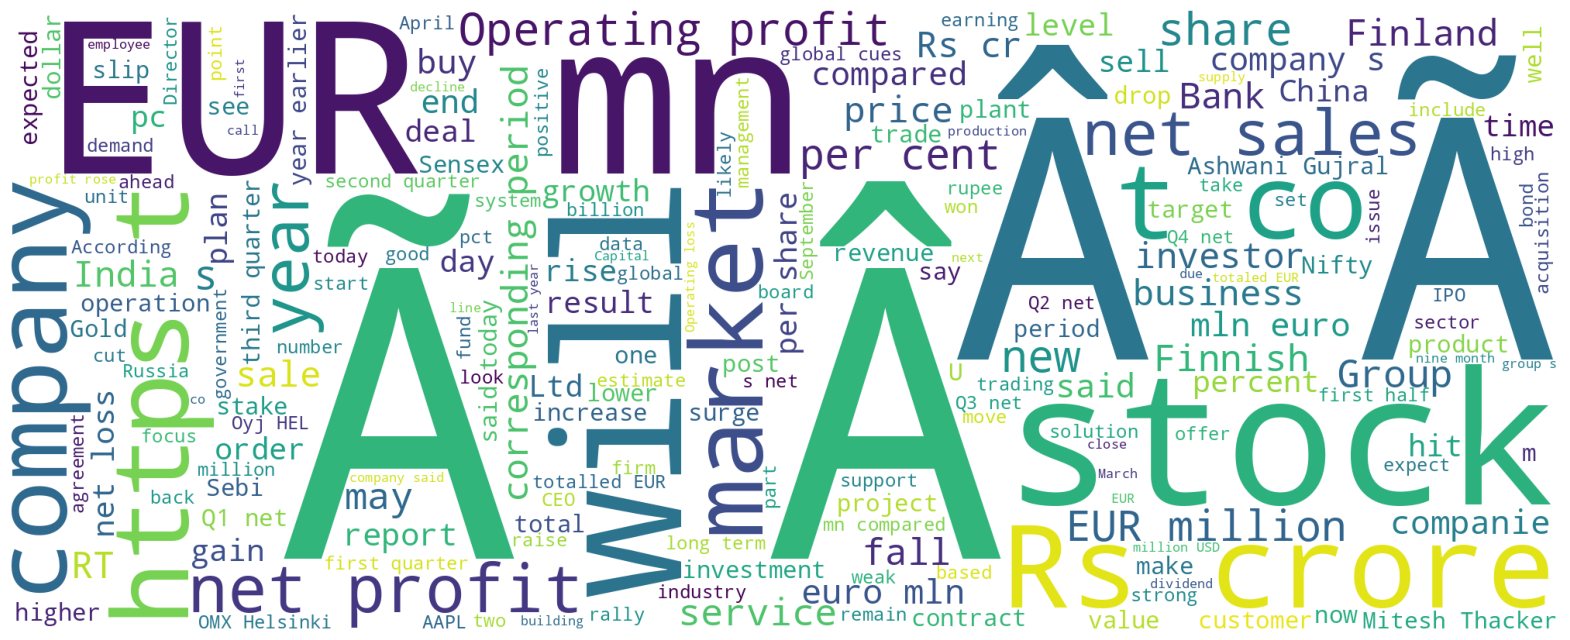

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words  = " ".join(x for x in df.Text)
plt.figure(figsize=(20,10))
wordcloud = WordCloud(background_color="white", width = 2000, height = 800).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
df['Comment']=df['Text'].apply(str)

In [ ]:
X = []
sentences = list(df['Comment'])
for sen in sentences:
    X.append(preprocess_text(sen))

KeyError: 'Comment'

In [ ]:
x=df['Text']

In [ ]:
X=df['hibrit']

In [ ]:
df['Text']

0                                                                                                           At Wipro, growth remains a mirage
1                                                                                            Why Chinese stocks leave US investors vulnerable
2                                                                                               US stocks finish mixed amid more tech selling
3                                                                                                  Opec reduces estimate on oil demand growth
4                                                                                     Immediate support for rupee is placed at 55.10: Bonanza
                                                                         ...                                                                 
14736                                                                                  It will also strengthen Ruukki 's offshore business . 
14737                                                                                  APL Apollo Tubes hits record high; HDFC MF buys shares
14738    `` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . '' 
14739                                                                         Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral
14740                                          Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth
Name: Text, Length: 14741, dtype: object

In [ ]:
# Artık sadece Text kolonunu al
X = df['Text']


0                          At Wipro, growth remains a mirage
1           Why Chinese stocks leave US investors vulnerable
2              US stocks finish mixed amid more tech selling
3                 Opec reduces estimate on oil demand growth
4    Immediate support for rupee is placed at 55.10: Bonanza
Name: Text, dtype: object


In [ ]:
X

0                                                                            wipro growth remains mirage
1                                                           chinese stocks leave us investors vulnerable
2                                                               us stocks finish mixed amid tech selling
3                                                                opec reduces estimate oil demand growth
4                                                                 immediate support rupee placed bonanza
                                                      ...                                               
14736                                                          also strengthen ruukki offshore business 
14737                                              apl apollo tubes hits record high hdfc mf buys shares
14738     purchase operations part yit strategy expand offering building system services geographically 
14739                                                   sobha developers heading jp stuck ashwani gujral
14740                  decent uptick stock like bharti happen reliance bids aggressively prashastha seth
Name: hibrit, Length: 14741, dtype: object

In [ ]:
X

0                                                                                                           At Wipro, growth remains a mirage
1                                                                                            Why Chinese stocks leave US investors vulnerable
2                                                                                               US stocks finish mixed amid more tech selling
3                                                                                                  Opec reduces estimate on oil demand growth
4                                                                                     Immediate support for rupee is placed at 55.10: Bonanza
                                                                         ...                                                                 
14736                                                                                  It will also strengthen Ruukki 's offshore business . 
14737                                                                                  APL Apollo Tubes hits record high; HDFC MF buys shares
14738    `` The purchase of the operations is part of YIT 's strategy to expand its offering of building system services geographically . '' 
14739                                                                         Sobha Developers heading to 200, JP stuck at 90: Ashwani Gujral
14740                                          Decent uptick in a stock like Bharti can happen if Reliance bids aggressively: Prashastha Seth
Name: Text, Length: 14741, dtype: object

In [ ]:
df['oh_label']=df['score']
y = df['oh_label']+1

In [ ]:
y = df['oh_label']+1

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
14736    2
14737    2
14738    2
14739    2
14740    2
Name: oh_label, Length: 14741, dtype: int64

######[Train Test Ayrımının yapılması](#b1)

%30-70

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [ ]:
X_train.head()

7495                                spicejet seek shareholder nod hike promoter holding
8253                                  danske bank denmark largest bank million customer
10087                      mreal sale expected increased yearonyear eurm second quarter
3386     forterra group revenue declined five month may fort trading share stock rating
6618                               abn represent voting right share capital citycon oyj
Name: USAirPrePro2, dtype: object

In [ ]:
from sklearn import  preprocessing

In [ ]:
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

###### BOW

In [ ]:
#feature extraction with Tf-idf vectorizer

#feature extraction with BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
vectorizer.fit(X_train)

train_vectors = vectorizer.transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(13266, 10000) (1475, 10000)


In [ ]:
X_train

7495                                spicejet seek shareholder nod hike promoter holding
8253                                  danske bank denmark largest bank million customer
10087                      mreal sale expected increased yearonyear eurm second quarter
3386     forterra group revenue declined five month may fort trading share stock rating
6618                               abn represent voting right share capital citycon oyj
                                              ...                                      
5191                                      estimated annual value frame agreement eur mn
13418                                                    r bosche touch r sandeep wagle
5390                                       came aspo chemical aspo shipping aspo system
860                        china agricultural bank sell billion debut green bond london
7270           according gallup food farm fact beef consumption totaled mn kilo finland
Name: USAirPrePro2, Length: 13266, dtype: object

###### NB

In [ ]:
#use ML algorithms classifier
#use a Naive Bayes Classifier and train the model on the training set.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("Naive Bayes Accuracy Score -> ", accuracy_score(y_test,predicted)*100)


Naive Bayes Accuracy Score ->  76.20338983050847


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       479
           1       0.83      0.72      0.77       518
           2       0.74      0.74      0.74       478

    accuracy                           0.76      1475
   macro avg       0.77      0.76      0.76      1475
weighted avg       0.77      0.76      0.76      1475



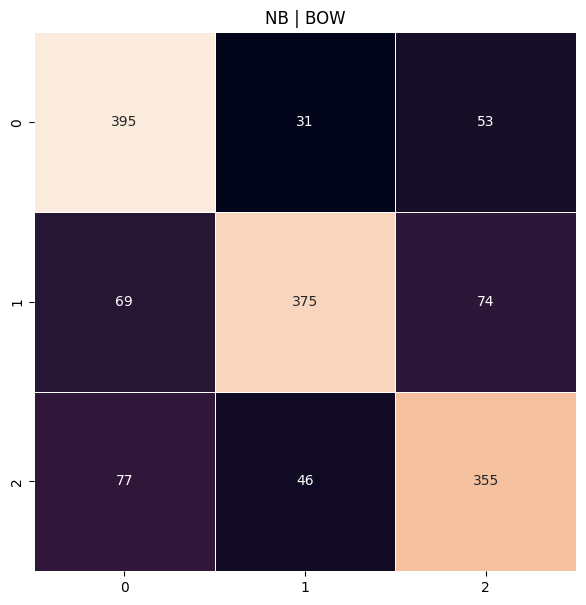

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### SVM

In [ ]:
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000
svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations)
SVM=svm.fit(train_vectors,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_vectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  81.62711864406779


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       479
           1       0.81      0.86      0.84       518
           2       0.84      0.83      0.83       478

    accuracy                           0.84      1475
   macro avg       0.84      0.84      0.84      1475
weighted avg       0.84      0.84      0.84      1475



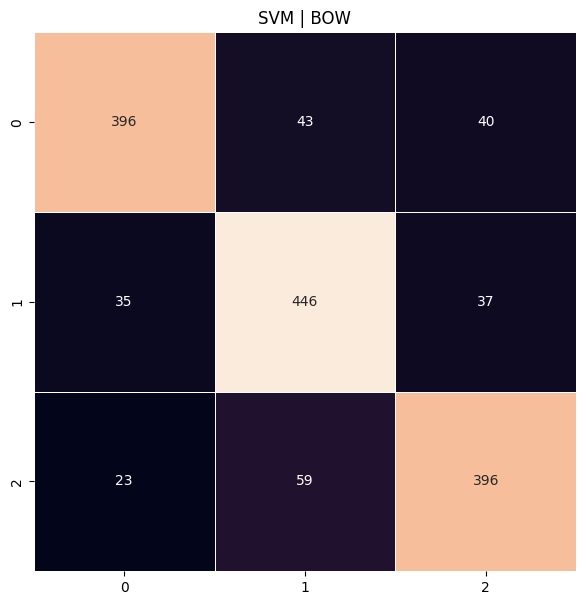

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(7,7))
plt.title("SVM | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### LOG REG

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  81.76271186440678


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       479
           1       0.81      0.85      0.83       518
           2       0.81      0.81      0.81       478

    accuracy                           0.82      1475
   macro avg       0.82      0.82      0.82      1475
weighted avg       0.82      0.82      0.82      1475



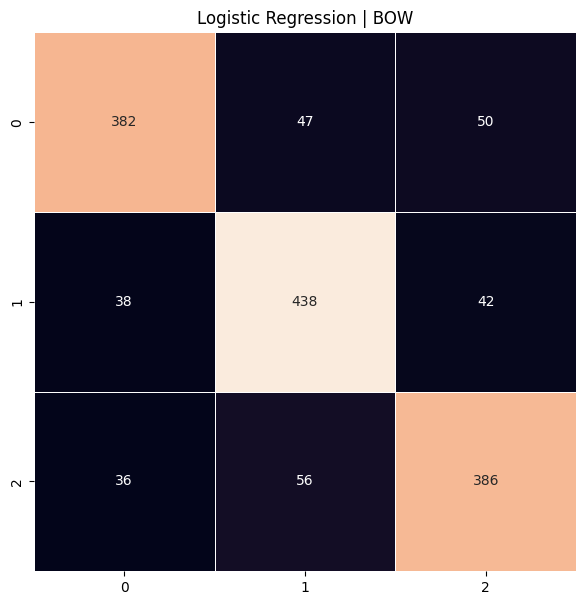

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_log)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_vectors, y_train)
predictions_tree = tree_clf.predict(test_vectors)
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)

Decision Tree Accuracy Score ->  77.49152542372882


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       479
           1       0.77      0.80      0.78       518
           2       0.76      0.78      0.77       478

    accuracy                           0.77      1475
   macro avg       0.78      0.77      0.77      1475
weighted avg       0.78      0.77      0.77      1475



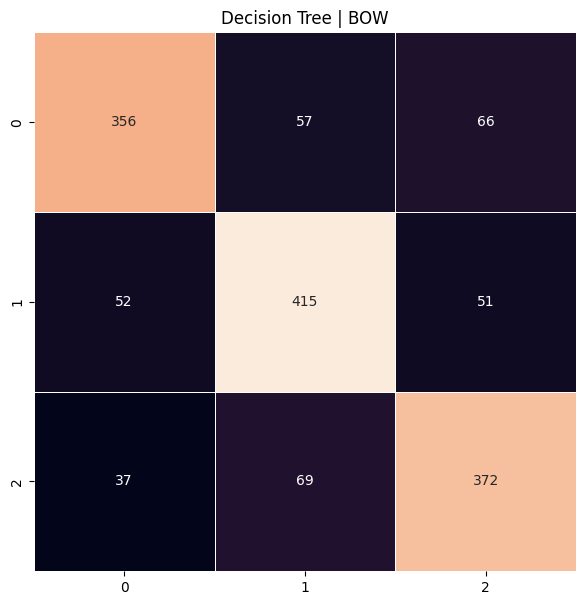

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | BOW")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### Random forest

In [ ]:
train_vectors

<13266x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 117656 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest sınıflandırıcısını tanımla
rf_clf = RandomForestClassifier()

# Modeli eğit
rf_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_rf = rf_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf, y_test) * 100)


Random Forest Accuracy Score ->  81.08474576271186


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       479
           1       0.77      0.88      0.82       518
           2       0.81      0.79      0.80       478

    accuracy                           0.81      1475
   macro avg       0.81      0.81      0.81      1475
weighted avg       0.81      0.81      0.81      1475



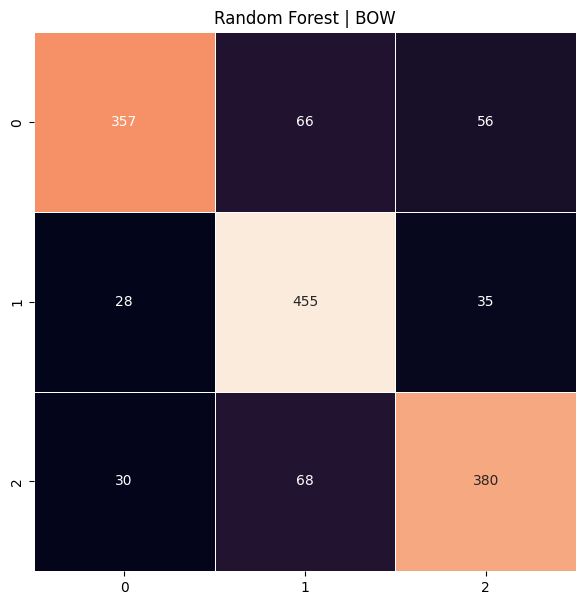

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest modeli için confusion matrix oluştur
cm_rf = confusion_matrix(y_test, predictions_rf)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Random Forest | BOW")
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


* #### [TF_IDF](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [KNN](#svm)
    * #### [LOGISTIC REG](#log)


######Kütüphanelerin Yüklenmesi

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import datetime

from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
pd.set_option('max_colwidth',400)
from bs4 import BeautifulSoup
import re

from tqdm import tqdm
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline
from collections import defaultdict

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Dropout,Embedding,LSTM
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential


In [ ]:
#dirve da kullanacaksanız buras şart yoksa yorum satırına alınız
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bil482/
"""da db .csv nini yüklü olduğu klasör"""


Mounted at /content/drive
/content/drive/My Drive/Bil482


'da db .csv nini yüklü olduğu klasör'

In [ ]:
df=pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
df.isnull().values.any()

df.head(10)

id  \
index                        
5.770000e+17  5.770000e+17   
5.410000e+17  5.410000e+17   
5.680000e+17  5.680000e+17   
5.770000e+17  5.770000e+17   
5.710000e+17  5.710000e+17   
5.100000e+17  5.100000e+17   
5.590000e+17  5.590000e+17   
5.750000e+17  5.750000e+17   
5.650000e+17  5.650000e+17   
5.630000e+17  5.630000e+17   

                                                                                                                                                 Text  \
index                                                                                                                                                   
5.770000e+17                         @AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc   
5.410000e+17                                                                                                                                   #NULL!   
5.680000e+17  @jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.   
5.770000e+17                                          Finally I'm all caught up, and that sudden death cook off looks like it's gonna be intense #MKR   
5.710000e+17                                                                                                   @carolinesinders @herecomesfran *hugs*   
5.100000e+17                       Please, PLEASE start using "is your discernment blunted by steroids" to mean "are you on DRUGS?" from now on. DEAD   
5.590000e+17  @aymannathem As soon as ISIS chased all the minorities out of Mosul, the Sunni Arabs were happy to steal their property.  So fuck them.   
5.750000e+17                                                                      @Ali_Gharib @MaxBlumenthal Glad you like it. http://t.co/3ME3Nrk8xZ   
5.650000e+17          @HuffPostRelig Islam invaded and conquered 2/3 of Christiandom before any Christian crusades in response. The writer is a liar.   
5.630000e+17                                    @semzyxx Do you approve of your pedophile prophet raping a 9 year old girl, like it says in 7 hadith?   

             Annotation  oh_label  
index                              
5.770000e+17     racism         1  
5.410000e+17       none         0  
5.680000e+17     racism         1  
5.770000e+17       none         0  
5.710000e+17       none         0  
5.100000e+17       none         0  
5.590000e+17       none         0  
5.750000e+17       none         0  
5.650000e+17     racism         1  
5.630000e+17     racism         1

<Axes: xlabel='oh_label', ylabel='count'>

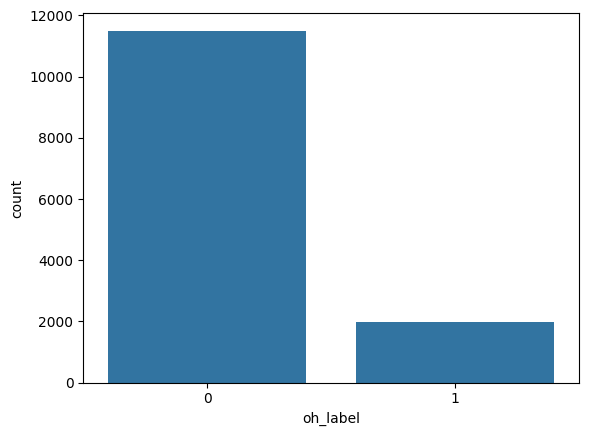

In [ ]:
import seaborn as sns
sns.countplot(x='oh_label', data=df)

In [ ]:
df.shape

(13471, 4)

In [ ]:
print(len(df))

13471


In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
df['Comment']=df['Text'].apply(str)

In [ ]:
X = []
sentences = list(df['Comment'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
y = df['oh_label']

In [ ]:
y.shape

(13471,)

###### %30-70

In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [ ]:
X_train.head()

6935              original patent filed finland application 
5920                     rsa shares closed time going press 
37                                  import duty wheat likely
576          refined soya oil futures weaken low spot demand
14176    brent climbs contract covering geopolitical tension
Name: hibrit, dtype: object

---
<a id="p1"></a>
###### TF-IDF

In [ ]:
X_train

7495                                spicejet seek shareholder nod hike promoter holding
8253                                  danske bank denmark largest bank million customer
10087                      mreal sale expected increased yearonyear eurm second quarter
3386     forterra group revenue declined five month may fort trading share stock rating
6618                               abn represent voting right share capital citycon oyj
                                              ...                                      
5191                                      estimated annual value frame agreement eur mn
13418                                                    r bosche touch r sandeep wagle
5390                                       came aspo chemical aspo shipping aspo system
860                        china agricultural bank sell billion debut green bond london
7270           according gallup food farm fact beef consumption totaled mn kilo finland
Name: USAirPrePro2, Length: 13266, dtype: object

In [ ]:
#feature extraction with Tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(13266, 10000) (1475, 10000)


In [ ]:
print(test_vectors)

  (0, 369)	0.24124670637040252
  (0, 1092)	0.2060895210455893
  (0, 1193)	0.3514156542804696
  (0, 1946)	0.24223570315381898
  (0, 2364)	0.3106861641375651
  (0, 2394)	0.26538723705621575
  (0, 4564)	0.30795695717791816
  (0, 5686)	0.2672274670350136
  (0, 7022)	0.2190398254761187
  (0, 7287)	0.29860593461035684
  (0, 8368)	0.3106861641375651
  (0, 9343)	0.3876621097271591
  (1, 331)	0.4124066989382905
  (1, 409)	0.3630458263033027
  (1, 2116)	0.37224806802689153
  (1, 4841)	0.34871888588169747
  (1, 7111)	0.24889067584971575
  (1, 7135)	0.28001947744961037
  (1, 7160)	0.37224806802689153
  (1, 8916)	0.3987716849632311
  (2, 296)	0.3166722642121473
  (2, 1257)	0.18190053261939568
  (2, 2499)	0.31848067154056703
  (2, 2654)	0.1729486791651508
  (2, 2696)	0.3045493051997264
  :	:
  (1471, 1792)	0.628985891560759
  (1471, 2140)	0.43538429488664254
  (1471, 5848)	0.3067066725861374
  (1471, 8116)	0.48921490712455773
  (1471, 9898)	0.2853367407499924
  (1472, 1026)	0.33341368374403985
  (14


<a id="nb"></a>
###### NB

In [ ]:
#use ML algorithms classifier
#use a Naive Bayes Classifier and train the model on the training set.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [ ]:
X_train

6935                                      original patent filed finland application 
5920                                             rsa shares closed time going press 
37                                                          import duty wheat likely
576                                  refined soya oil futures weaken low spot demand
14176                            brent climbs contract covering geopolitical tension
                                            ...                                     
5191                                  estimated annual value frame agreement eur mn 
13418                                               rs bosche touch rs sandeep wagle
5390                                 came aspo chemicals aspo shipping aspo systems 
860                    china agricultural bank sells billion debut green bond london
7270     according gallup food farm facts beef consumption totaled mn kilos finland 
Name: hibrit, Length: 10318, dtype: object

In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print("Naive Bayes Accuracy Score -> ", accuracy_score(y_test,predicted)*100)


Naive Bayes Accuracy Score ->  76.13559322033898


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3431
           1       0.86      0.27      0.40       611

    accuracy                           0.88      4042
   macro avg       0.87      0.63      0.67      4042
weighted avg       0.88      0.88      0.85      4042



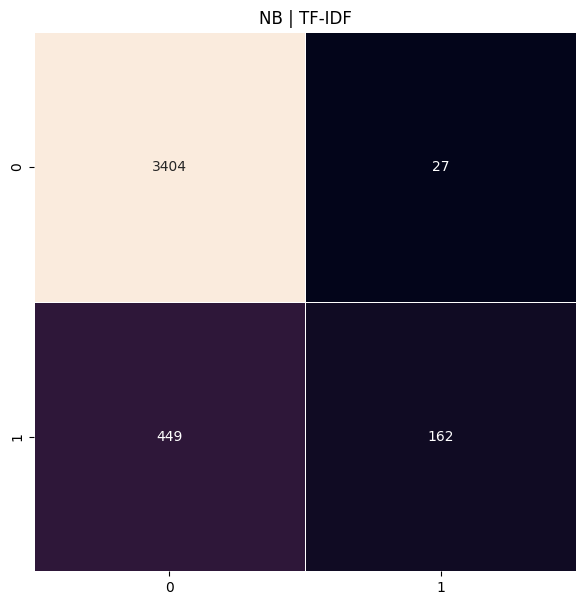

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

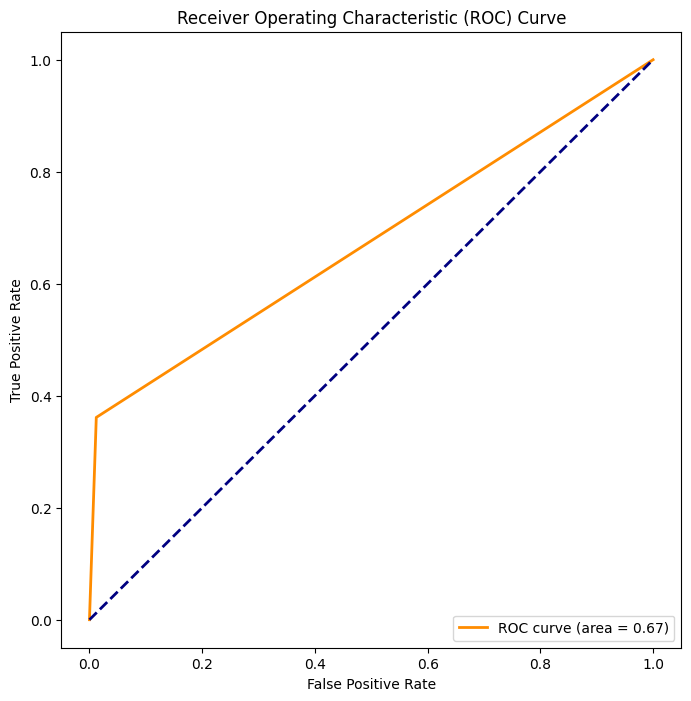

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<a id="svm"></a>
###### SVM  

In [ ]:
from sklearn.svm import LinearSVC
l2_norm = 2
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model

SVM=svm.fit(train_vectors,y_train)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(test_vectors)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  81.15254237288136


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_SVM))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       479
           1       0.81      0.83      0.82       518
           2       0.79      0.80      0.80       478

    accuracy                           0.81      1475
   macro avg       0.81      0.81      0.81      1475
weighted avg       0.81      0.81      0.81      1475



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predictions_SVM)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: multiclass format is not supported

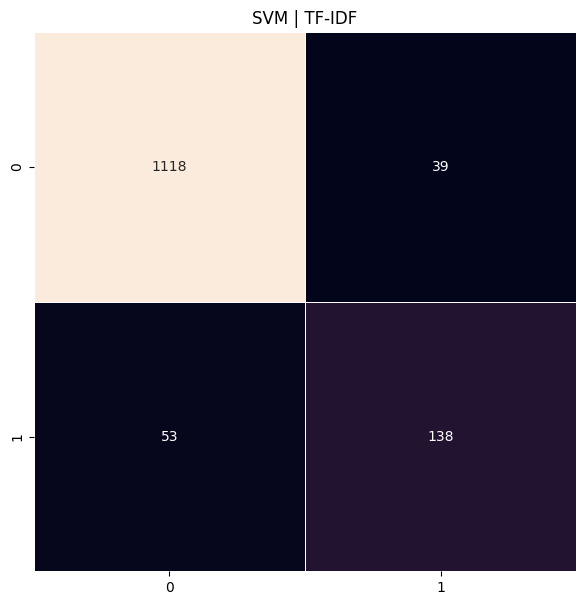

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(7,7))
plt.title("SVM | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


<a id="log"></a>
###### Log Reg

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
log_reg = linear_model.LogisticRegression()
log_reg.fit(train_vectors,y_train)
predictions_log = log_reg.predict(test_vectors)
print("Logistic Regression Accuracy Score -> ",accuracy_score(predictions_log, y_test)*100)

Logistic Regression Accuracy Score ->  81.22033898305084


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1443
           1       0.78      0.83      0.81      1508
           2       0.77      0.77      0.77      1472

    accuracy                           0.79      4423
   macro avg       0.79      0.79      0.79      4423
weighted avg       0.79      0.79      0.79      4423



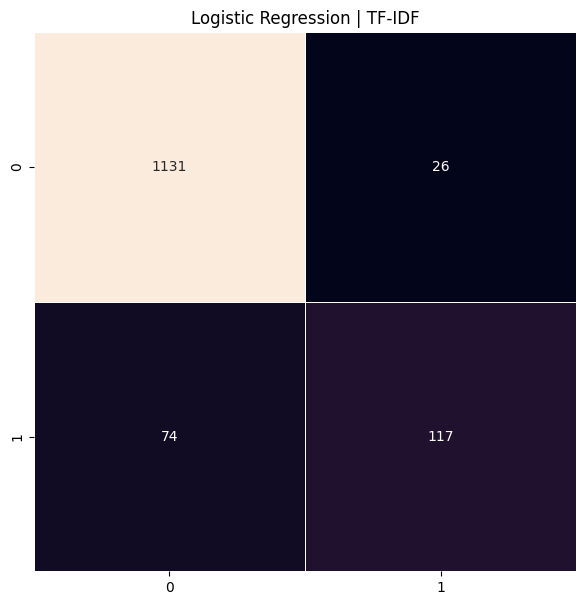

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_log)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

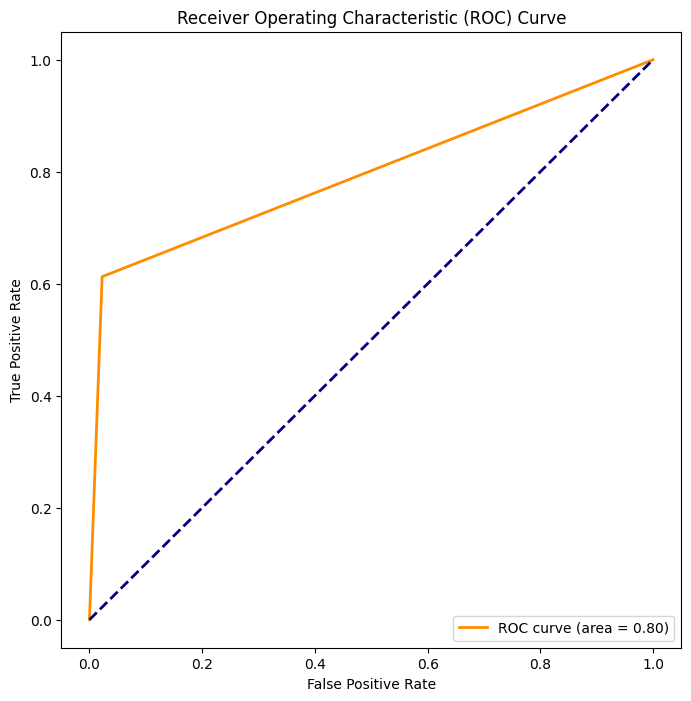

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predictions_log)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<a id="knn"></a>
###### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
number_of_neigbors = 5
minkowski_power = 2 # Manhattan Distance = 1, Euclidean Distance = 2
knn = KNeighborsClassifier(n_neighbors=number_of_neigbors, p =minkowski_power)
model_knn=knn.fit(train_vectors, y_train)
predictions_knn = model_knn.predict(test_vectors)
print("KNN Accuracy Score -> ",accuracy_score(predictions_knn, y_test)*100)





KNN Accuracy Score ->  65.22033898305085


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1157
           1       0.92      0.06      0.12       191

    accuracy                           0.87      1348
   macro avg       0.89      0.53      0.52      1348
weighted avg       0.87      0.87      0.81      1348



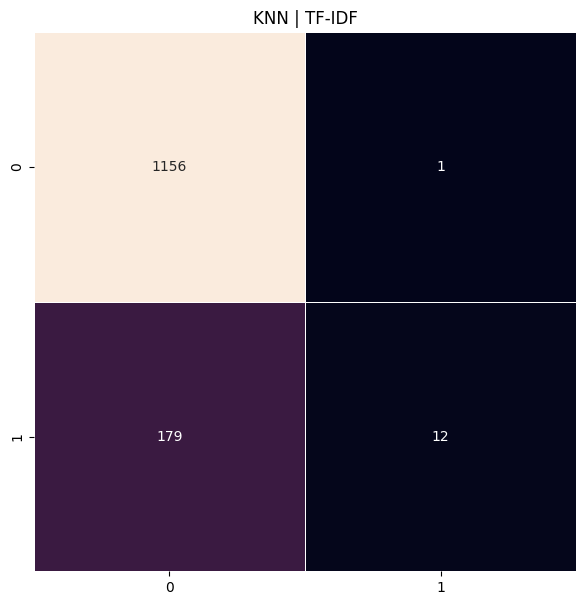

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_knn)
plt.figure(figsize=(7,7))
plt.title("KNN | TF-IDF")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

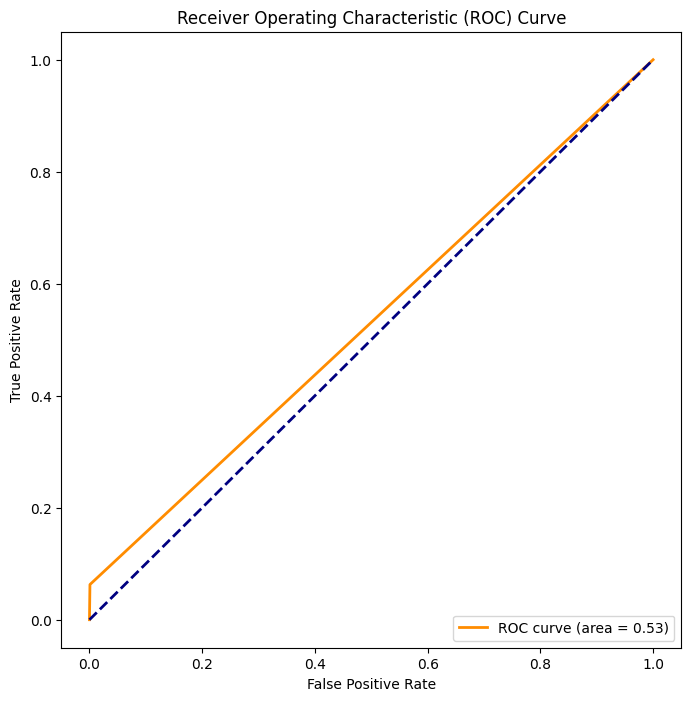

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already imported necessary libraries and have y_test, predicted

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, predictions_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


###### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree sınıflandırıcısını tanımla
tree_clf = DecisionTreeClassifier()

# Modeli eğit
tree_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_tree = tree_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Decision Tree Accuracy Score -> ", accuracy_score(predictions_tree, y_test) * 100)


Decision Tree Accuracy Score ->  75.9322033898305


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_tree))


              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3431
           1       0.68      0.70      0.69       611

    accuracy                           0.91      4042
   macro avg       0.81      0.82      0.82      4042
weighted avg       0.91      0.91      0.91      4042



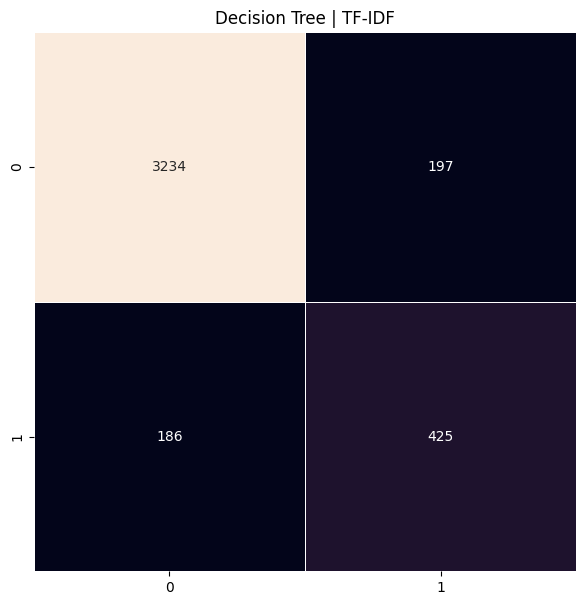

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Karar ağacı modeli için confusion matrix oluştur
cm_tree = confusion_matrix(y_test, predictions_tree)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Decision Tree | TF-IDF")
sns.heatmap(cm_tree, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


######Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest sınıflandırıcısını tanımla
rf_clf = RandomForestClassifier()

# Modeli eğit
rf_clf.fit(train_vectors, y_train)

# Test verileri üzerinde tahmin yap
predictions_rf = rf_clf.predict(test_vectors)

# Doğruluk skorunu hesapla ve yazdır
print("Random Forest Accuracy Score -> ", accuracy_score(predictions_rf, y_test) * 100)


Random Forest Accuracy Score ->  81.42372881355932


In [ ]:
from sklearn.metrics import classification_report

# Sınıflandırma raporunu yazdır
print(classification_report(y_test, predictions_rf))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3431
           1       0.83      0.64      0.72       611

    accuracy                           0.93      4042
   macro avg       0.88      0.81      0.84      4042
weighted avg       0.92      0.93      0.92      4042



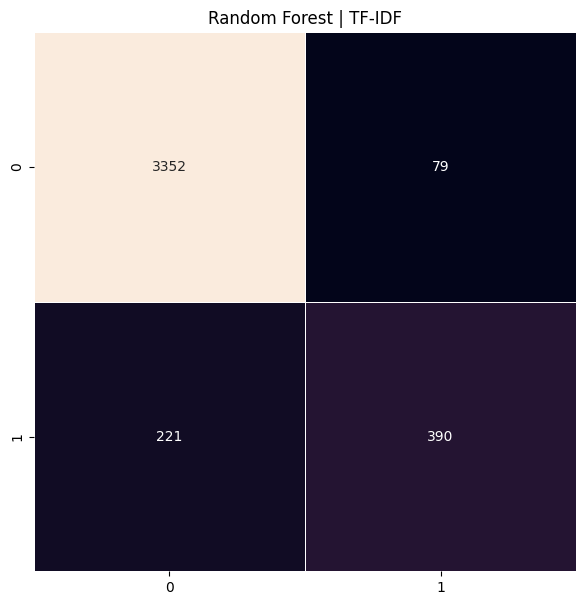

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest modeli için confusion matrix oluştur
cm_rf = confusion_matrix(y_test, predictions_rf)

# Heatmap'i çiz
plt.figure(figsize=(7,7))
plt.title("Random Forest | TF-IDF")
sns.heatmap(cm_rf, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()


* #### [W2V](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)


###### Kütüphanelerin eklenmesi

In [ ]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
#dirve da kullanacaksanız buras şart yoksa yorum satırına alınız
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Bil482/  #çalışılacak drve dizinni


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/Bil482/ #çalışılacak drve dizinni'
/content/drive/My Drive/Bil482


'\n\ndata = pd.read_csv("db.csv",index_col=0)\ndata.isnull().values.any()\n\ndata.head()'

In [ ]:
data = pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
data=df

In [ ]:
data['Text'].isnull().values.any()

False

In [ ]:
data.head()

Text  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                                                              tokens  \
0                         ["['Micro', 'growth', 'remain', 'murat']"]   
1  ["['Chinese', 'stick', 'leave', 'of', 'investor', 'vulnerable']"]   
2       ["['of', 'stick', 'finish', 'fix', 'maid', 'each', 'sell']"]   
3     ["['OPEC', 'reduces', 'estimate', 'oil', 'demand', 'growth']"]   
4   ["['immediate', 'support', 'rule', 'place', '5510', 'bonanza']"]   

   text_length                                        hibrit  \
0           33                   wipro growth remains mirage   
1           48  chinese stocks leave us investors vulnerable   
2           45      us stocks finish mixed amid tech selling   
3           42       opec reduces estimate oil demand growth   
4           55        immediate support rupee placed bonanza   

                           USAirPrePro  \
0            wipro growth remain mirag   
1  chines stock leav u investor vulner   
2    u stock finish mix amid tech sell   
3   opec reduc estim oil demand growth   
4    immedi support rupe place bonanza   

                                USAirPrePro2  \
0                wipro growth remains mirage   
1  chinese stock leave u investor vulnerable   
2     u stock finish mixed amid tech selling   
3    opec reduces estimate oil demand growth   
4     immediate support rupee placed bonanza   

                                  MuammerNLPPrePRro  \
0                    At Wipro growth remains mirage   
1  Why Chinese stocks leave US investors vulnerable   
2     US stocks finish mixed amid more tech selling   
3        Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at Bonanza   

                                        MuammerNLPPrePRro2  \
0                        At Wipro, growth remains a mirage   
1         Why Chinese stocks leave US investors vulnerable   
2            US stocks finish mixed amid more tech selling   
3               Opec reduces estimate on oil demand growth   
4  Immediate support for rupee is placed at 55.10: Bonanza   

                  MuammerNLPLSTMPrePRro  score  
0           wipro , growth remain mirag     -1  
1  chines stock leav us investor vulner     -1  
2    us stock finish mix amid tech sell     -1  
3    opec reduc estim oil demand growth     -1  
4     immedi support rupe place bonanza     -1

In [ ]:
data.shape

(14741, 10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
data['Text'] = data['Text'].values.astype('U')
"""data['Text'] = data['Comment'].values.astype('U')"""

"data['Text'] = data['Comment'].values.astype('U')"

In [ ]:
data['Text'].head()

0                          At Wipro, growth remains a mirage
1           Why Chinese stocks leave US investors vulnerable
2              US stocks finish mixed amid more tech selling
3                 Opec reduces estimate on oil demand growth
4    Immediate support for rupee is placed at 55.10: Bonanza
Name: Text, dtype: object

###### **Word2Vec Features**

**Word Embeddings**
1. Word2Vec Embeddings

- 100 dim,
- cbow

In [ ]:
data=x

In [ ]:
data

0                                                                        wipro growth remains mirage
1                                                          chinese stock leave u investor vulnerable
2                                                             u stock finish mixed amid tech selling
3                                                            opec reduces estimate oil demand growth
4                                                             immediate support rupee placed bonanza
                                                    ...                                             
14736                                                       also strengthen ruukki offshore business
14737                                              apl apollo tube hit record high hdfc mf buy share
14738    purchase operation part yit strategy expand offering building system service geographically
14739                                                sobha developer heading jp stuck ashwani gujral
14740               decent uptick stock like bharti happen reliance bid aggressively prashastha seth
Name: USAirPrePro2, Length: 14741, dtype: object

In [ ]:
data= x.to_frame(name='Text')


In [ ]:
data['score']=df['oh_label']

In [ ]:
data.columns

Index(['Text', 'score'], dtype='object')

In [ ]:
data= x.to_frame(name='Text')


In [ ]:
data['score'].shape

(14742,)

In [ ]:
tokenized_tweet = data['Text'].head(14741).apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=100,
            window=5, # context window size
            min_count=2,
            sg = 0, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['Text']), epochs=20)

(2524897, 2870660)

In [ ]:
tokenized_tweet


0                                                                               [wipro, growth, remains, mirage]
1                                                               [chinese, stock, leave, u, investor, vulnerable]
2                                                                 [u, stock, finish, mixed, amid, tech, selling]
3                                                                 [opec, reduces, estimate, oil, demand, growth]
4                                                                   [immediate, support, rupee, placed, bonanza]
                                                          ...                                                   
14736                                                             [also, strengthen, ruukki, offshore, business]
14737                                               [apl, apollo, tube, hit, record, high, hdfc, mf, buy, share]
14738    [purchase, operation, part, yit, strategy, expand, offering, building, system, service, geographically]
14739                                                    [sobha, developer, heading, jp, stuck, ashwani, gujral]
14740               [decent, uptick, stock, like, bharti, happen, reliance, bid, aggressively, prashastha, seth]
Name: Text, Length: 14741, dtype: object

In [ ]:
tokenized_tweet.shape

(14741,)

In [ ]:
null_count = 0
from contextlib import nullcontext

# Örnek bir tokenized_tweet listesi oluşturalım
tokenized_tweet = [{"Text": "#NULL!"}, {"Text": "some_text"}, {"Text": "#NULL!"}]

# Sözlük olup olmadığını kontrol edelim ve "Text" anahtarının varlığını kontrol edelim
for tweet in tokenized_tweet:
    if isinstance(tweet, dict) and "Text" in tweet:
        if tweet["Text"] == '#NULL!':
            null_count += 1

print(null_count)


2


In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary

            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
# Assuming 'model_w2v' is the Word2Vec model you trained earlier
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the word is not in the vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

In [ ]:
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(3, 100)

In [ ]:
# Assuming 'model_w2v' is the Word2Vec model you trained earlier
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the word is not in the vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape


(3, 100)

In [ ]:
ytrain = ytrain.drop(index='score', errors='ignore')


In [ ]:
# Eğer ytrain bir Series ise:
ytrain.head()


10708    2.0
10857    2.0
2640     0.0
1250     0.0
6834     1.0
Name: score, dtype: float64

In [ ]:
ytrain

10708    2.0
10857    2.0
2640     0.0
1250     0.0
6834     1.0
        ... 
5191     1.0
13418    2.0
5390     1.0
860      0.0
7270     1.0
Name: score, Length: 11792, dtype: float64

In [ ]:
data=data.drop(index='score', errors='ignore')

In [ ]:
data['score'] = data['score'].drop(index='score', errors='ignore')


In [ ]:
data['score']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14736    2.0
14737    2.0
14738    2.0
14739    2.0
14740    2.0
Name: score, Length: 14741, dtype: float64

In [ ]:
print("tokenized_tweet:", len(tokenized_tweet))
print("wordvec_df:", wordvec_df.shape)
print("data['score']:", len(data['score']))

tokenized_tweet: 3
wordvec_df: (3, 100)
data['score']: 14742


In [ ]:
# 1. Tüm veriyi tokenize et (buradaki 'text' sütunun adı sana bağlı)
tokenized_tweet = [str(text).split() for text in data['Text']]  # veya kendi tokenizer'ın varsa kullan

# 2. Word2Vec modelini oluştur
from gensim.models import Word2Vec
model_w2v = Word2Vec(sentences=tokenized_tweet, vector_size=100, window=5, min_count=2)

# 3. Ortalama vektör fonksiyonu (seninkini aynen kullanıyoruz)
def get_tweet_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

# 4. Tüm tweet'leri vektöre çevir
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = get_tweet_vector(tokenized_tweet[i], 100)

wordvec_df = pd.DataFrame(wordvec_arrays)

# 5. Etiketlerle aynı uzunlukta mı kontrol et
print(wordvec_df.shape)         # (21863, 100) olmalı
print(len(data['score']))       # 21863 olmalı


(14741, 100)
14741


In [ ]:
wordvec_df

0         1         2         3         4         5         6   \
0     -0.204346  0.153233 -0.258025 -0.013667  0.059015 -0.199979  0.321500   
1     -0.173318  0.078042 -0.281105 -0.110236  0.129851 -0.109086  0.149283   
2     -0.178538  0.086960 -0.295844 -0.100059  0.122845 -0.117026  0.176357   
3     -0.226747  0.133993 -0.492373  0.013168  0.122254 -0.119822  0.320144   
4     -0.190073  0.115638 -0.241536 -0.069696  0.089154 -0.136978  0.211173   
...         ...       ...       ...       ...       ...       ...       ...   
14736 -0.232368  0.326340 -0.100248 -0.076561  0.015710 -0.346469  0.426744   
14737 -0.183285  0.053480 -0.327016 -0.048285  0.107368 -0.134550  0.215596   
14738 -0.230025  0.282509 -0.152956 -0.107205  0.060239 -0.281713  0.335701   
14739 -0.173824  0.025313 -0.205054 -0.119339  0.067829 -0.124705  0.059208   
14740 -0.133225  0.073569 -0.213873 -0.048778  0.086584 -0.092220  0.127420   

             7         8         9   ...        90        91        92  \
0      0.541740 -0.258724 -0.194447  ...  0.436128 -0.170171  0.139538   
1      0.432357 -0.238177 -0.062713  ...  0.395064 -0.083697  0.043114   
2      0.455453 -0.236244 -0.086060  ...  0.399241 -0.096224  0.056073   
3      0.544895 -0.277933 -0.251081  ...  0.365436 -0.130504  0.084054   
4      0.447901 -0.207136 -0.073112  ...  0.388467 -0.087380  0.044903   
...         ...       ...       ...  ...       ...       ...       ...   
14736  0.766350 -0.351114 -0.100034  ...  0.614230 -0.244208  0.111691   
14737  0.439232 -0.223861 -0.195367  ...  0.355420 -0.139808  0.131481   
14738  0.684593 -0.321746 -0.036761  ...  0.580891 -0.171774  0.049888   
14739  0.252971 -0.105425  0.026801  ...  0.238765  0.083857  0.005113   
14740  0.302994 -0.165067 -0.035438  ...  0.265301 -0.028786  0.028963   

             93        94        95        96        97        98        99  
0      0.056370  0.294243  0.131588 -0.045305 -0.294756  0.079290 -0.266410  
1      0.170731  0.245439  0.453337  0.008863 -0.327704  0.135443 -0.415375  
2      0.150522  0.256004  0.414733  0.002354 -0.326753  0.120129 -0.396432  
3      0.101949  0.251141  0.307747 -0.006542 -0.373940  0.022513 -0.310110  
4      0.115648  0.244221  0.327121 -0.016718 -0.268785  0.108623 -0.319038  
...         ...       ...       ...       ...       ...       ...       ...  
14736  0.081989  0.569246  0.163064 -0.142326 -0.259276  0.181357 -0.345315  
14737  0.126852  0.179079  0.316826  0.009103 -0.364599  0.096800 -0.361535  
14738  0.128018  0.489621  0.329431 -0.080752 -0.280504  0.191819 -0.375366  
14739  0.178891  0.114654  0.401583  0.108302 -0.230142  0.100997 -0.265238  
14740  0.109704  0.166975  0.300755  0.017295 -0.223910  0.084711 -0.237183  

[14741 rows x 100 columns]

**2. Doc2Vec Embedding**

- 100 dim,


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score



> Blok alıntı ekle



In [ ]:
from sklearn.model_selection import train_test_split

train_w2v = wordvec_df.iloc[:150000, :]
test_w2v = wordvec_df.iloc[150000:, :]
"""
# Splitting data into training and validation set
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, data['BinaryNumTarget'],random_state=42,test_size=0.2)
"""

# Splitting data into training and validation set
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, data['score'],random_state=42,test_size=0.2)


In [ ]:
yvalid.head()

9512     1.0
8014     1.0
8596     1.0
1714     0.0
11210    2.0
Name: score, dtype: float64

In [ ]:
ytrain

10708    2.0
10857    2.0
2640     0.0
1250     0.0
6834     1.0
        ... 
5191     1.0
13418    2.0
5390     1.0
860      0.0
7270     1.0
Name: score, Length: 11792, dtype: float64

In [ ]:
test_w2v.shape

(0, 100)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
lreg = linear_model.LogisticRegression()

In [ ]:
ytrain

10708    2.0
10857    2.0
2640     0.0
1250     0.0
6834     1.0
        ... 
5191     1.0
13418    2.0
5390     1.0
860      0.0
7270     1.0
Name: score, Length: 11793, dtype: float64

###### **1. Logistic Regression**

In [ ]:
lreg.fit(xtrain_w2v, ytrain)

LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# Ölçeklendirme işlemi (özellikle Word2Vec gibi vektörlerde önerilir)
scaler = StandardScaler()
xtrain_w2v_scaled = scaler.fit_transform(xtrain_w2v)
xvalid_w2v_scaled = scaler.transform(xvalid_w2v)

# Modeli tanımla ve max_iter artır
lreg = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial'
)

# Eğit
lreg.fit(xtrain_w2v_scaled, ytrain)

# Tahmin yap
prediction = lreg.predict(xvalid_w2v_scaled)

# F1 skorunu hesapla (çok sınıflı olduğun için average='macro')
f1 = f1_score(yvalid, prediction, average='macro')
print("F1 Score (macro):", f1)

F1 Score (macro): 0.5713234055920834


In [ ]:
"""lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)

# Assuming prediction_int is the binary predictions based on a threshold
prediction_int = (prediction[:, 1] >= 0.3).astype(int)

f1_score_result = f1_score(yvalid, prediction_int)
print("F1 Score:", f1_score_result)"""


'lreg.fit(xtrain_w2v, ytrain)\n\nprediction = lreg.predict_proba(xvalid_w2v)\n\n# Assuming prediction_int is the binary predictions based on a threshold\nprediction_int = (prediction[:, 1] >= 0.3).astype(int)\n\nf1_score_result = f1_score(yvalid, prediction_int)\nprint("F1 Score:", f1_score_result)'

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction))

              precision    recall  f1-score   support

          -1       0.58      0.53      0.56       984
           0       0.61      0.66      0.63      1007
           1       0.47      0.46      0.46       958

    accuracy                           0.55      2949
   macro avg       0.55      0.55      0.55      2949
weighted avg       0.55      0.55      0.55      2949



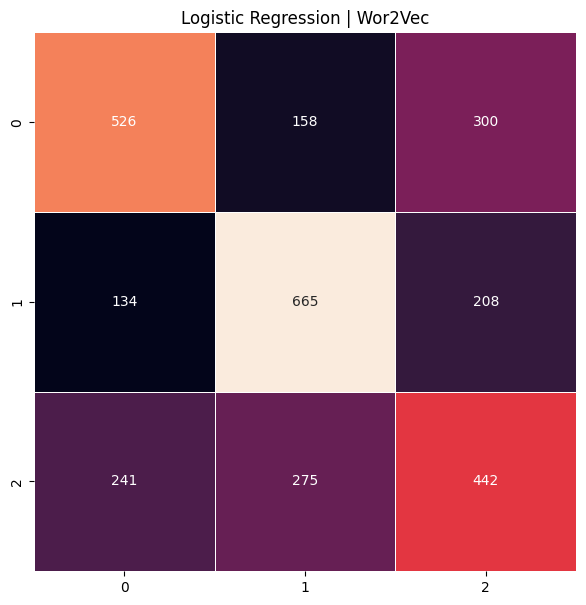

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction)
plt.figure(figsize=(7,7))
plt.title("Logistic Regression | Wor2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### **2. Support Vector Machine**

In [ ]:
from sklearn import svm


In [ ]:
import numpy as np
from sklearn import svm
from sklearn.metrics import f1_score

# Modeli eğit
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

# Olasılık tahmini
prediction_proba = svc.predict_proba(xvalid_w2v)

# Sınıf tahmini: en yüksek olasılığa sahip sınıf
prediction_int = np.argmax(prediction_proba, axis=1)

# f1 skoru hesapla
f1 = f1_score(yvalid, prediction_int, average='macro')
print("F1 Score (macro):", f1)


F1 Score (macro): 0.4792185594511316


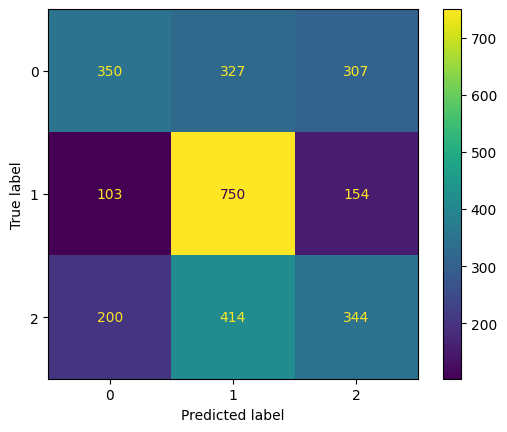

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(yvalid, prediction_int, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()


In [ ]:
import numpy as np
from sklearn import svm
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)
f1 = f1_score(yvalid, prediction, average='macro')
print("F1 Score (macro):", f1)
#f1_score(yvalid, prediction_int)


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction_int))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       494
           1       0.48      0.44      0.46       106

    accuracy                           0.82       600
   macro avg       0.68      0.67      0.68       600
weighted avg       0.81      0.82      0.81       600



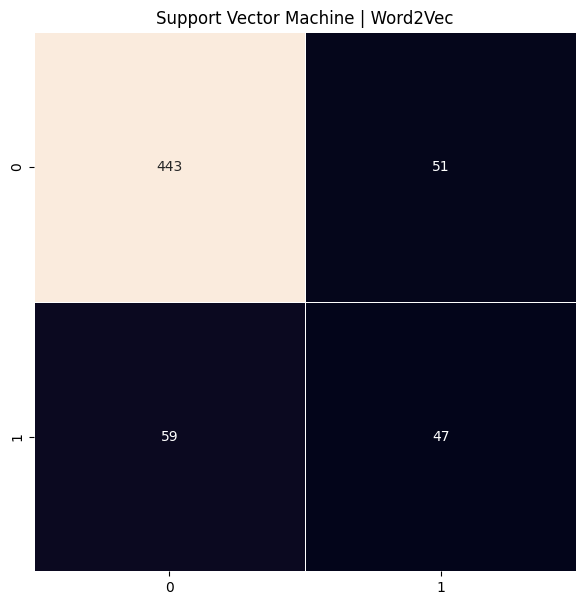

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_int)
plt.figure(figsize=(7,7))
plt.title("Support Vector Machine | Word2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

**3. dt**

>**Word2Vec Features**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt = DecisionTreeClassifier().fit(xtrain_w2v, ytrain)

prediction_r = dt.predict(xvalid_w2v)
f1_score(yvalid, prediction_r)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, prediction_r))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       494
           1       0.28      0.33      0.30       106

    accuracy                           0.73       600
   macro avg       0.56      0.57      0.57       600
weighted avg       0.75      0.73      0.74       600



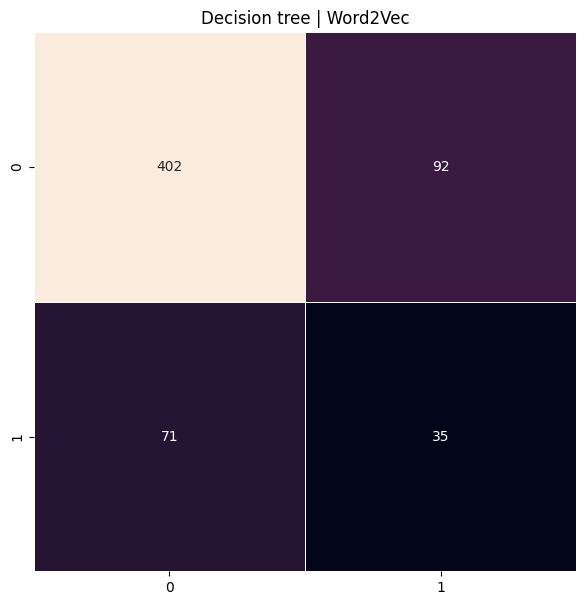

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, prediction_r)
plt.figure(figsize=(7,7))
plt.title("Decision tree | Word2Vec")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

###### NB

In [ ]:
ytrain

10708    2.0
10857    2.0
2640     0.0
1250     0.0
6834     1.0
        ... 
5191     1.0
13418    2.0
5390     1.0
860      0.0
7270     1.0
Name: score, Length: 11792, dtype: float64

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score

# 1. Negatif değerleri kaldır
xtrain_w2v = np.abs(xtrain_w2v)
xvalid_w2v = np.abs(xvalid_w2v)

# 2. Modeli eğit
nb_model = MultinomialNB()
nb_model.fit(xtrain_w2v, ytrain)

# 3. Tahmin yap
predictions = nb_model.predict(xvalid_w2v)

# 4. Değerlendirme
print(classification_report(yvalid, predictions))
print("F1 Score (macro):", f1_score(yvalid, predictions, average='macro'))


              precision    recall  f1-score   support

         0.0       0.51      0.23      0.32       984
         1.0       0.43      0.81      0.56      1007
         2.0       0.40      0.26      0.31       958

    accuracy                           0.44      2949
   macro avg       0.45      0.43      0.40      2949
weighted avg       0.45      0.44      0.40      2949

F1 Score (macro): 0.39908728596593007


In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_w2v, ytrain)
# Vektörlerde negatif değerleri kaldırmak için mutlak değeri alıyoruz
xtrain_w2v = np.abs(xtrain_w2v)
xvalid_w2v = np.abs(xvalid_w2v)

# Naive Bayes modelini oluştur ve eğit
nb_model = MultinomialNB()
nb_model.fit(xtrain_w2v, ytrain)

# Tahmin yap
predictions = nb_model.predict(xvalid_w2v)

# Değerlendirme
print(classification_report(yvalid, predictions))
print("F1 Score (macro):", f1_score(yvalid, predictions, average='macro'))



              precision    recall  f1-score   support

         0.0       0.51      0.23      0.32       984
         1.0       0.43      0.81      0.56      1007
         2.0       0.40      0.26      0.31       958

    accuracy                           0.44      2949
   macro avg       0.45      0.43      0.40      2949
weighted avg       0.45      0.44      0.40      2949

F1 Score (macro): 0.39908728596593007


In [ ]:
#test the performance of our model on the test set to predict the sentiment labels
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(xvalid_w2v)
print("Naive Bayes Accuracy Score -> ", accuracy_score(yvalid,predicted)*100)


ValueError: X has 100 features, but MultinomialNB is expecting 10000 features as input.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yvalid, predicted))

ValueError: Found input variables with inconsistent numbers of samples: [2949, 4423]

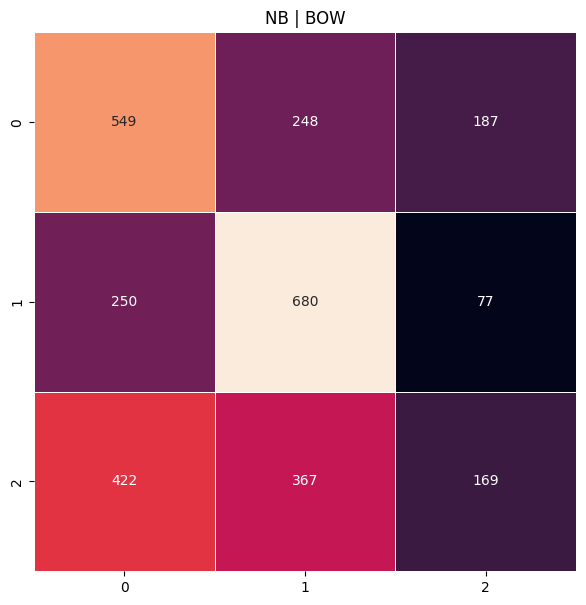

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid, predicted)
plt.figure(figsize=(7,7))
plt.title("NB | BOW")
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.7 ,cbar=False)
plt.show()

* #### [LSTM](#p1)
    * #### [NB](#nb)
    * #### [SVM](#svm)
    * #### [LOGISTIC REG](#log)


In [ ]:
# importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

/kaggle/input/amazon-product-reviews/amazon.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/BİL482/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/BİL482/'
/content/drive/My Drive/Bil482


In [ ]:
train_df = pd.read_csv("twitter_racism_parsed_dataset.csv",index_col=0)

In [ ]:
train_df.isnull().values.any()

False

In [ ]:
train_df=df['USAirPrePro2']

In [ ]:
train_df


0                                                                        wipro growth remains mirage
1                                                          chinese stock leave u investor vulnerable
2                                                             u stock finish mixed amid tech selling
3                                                            opec reduces estimate oil demand growth
4                                                             immediate support rupee placed bonanza
                                                    ...                                             
14736                                                       also strengthen ruukki offshore business
14737                                              apl apollo tube hit record high hdfc mf buy share
14738    purchase operation part yit strategy expand offering building system service geographically
14739                                                sobha developer heading jp stuck ashwani gujral
14740               decent uptick stock like bharti happen reliance bid aggressively prashastha seth
Name: USAirPrePro2, Length: 14741, dtype: object

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
stemmer = PorterStemmer()
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'(.)\1{2,}', '', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'\b(\w+)\s+(\1\s+){2,}', r'\1 ', text)
    text = re.sub(r'[^a-zA-Z\s,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

def preprocess_text2(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'[^a-zA-Z\s,\']', '', text)
    tokens = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords_set]
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
x=train_df

In [ ]:
train_df=train_df.to_frame()

In [ ]:
preprocess_data=lambda text:preprocess_text(text)
train_df["Text_prepro"]=train_df["USAirPrePro2"].apply(preprocess_data)

In [ ]:
train_df

USAirPrePro2  \
0                                                                      wipro growth remains mirage   
1                                                        chinese stock leave u investor vulnerable   
2                                                           u stock finish mixed amid tech selling   
3                                                          opec reduces estimate oil demand growth   
4                                                           immediate support rupee placed bonanza   
...                                                                                            ...   
14736                                                     also strengthen ruukki offshore business   
14737                                            apl apollo tube hit record high hdfc mf buy share   
14738  purchase operation part yit strategy expand offering building system service geographically   
14739                                              sobha developer heading jp stuck ashwani gujral   
14740             decent uptick stock like bharti happen reliance bid aggressively prashastha seth   

                                                                      Text_prepro  
0                                                       wipro growth remain mirag  
1                                             chines stock leav u investor vulner  
2                                               u stock finish mix amid tech sell  
3                                              opec reduc estim oil demand growth  
4                                               immedi support rupe place bonanza  
...                                                                           ...  
14736                                         also strengthen ruukki offshor busi  
14737                           apl apollo tube hit record high hdfc mf buy share  
14738    purchas oper part yit strategi expand offer build system servic geograph  
14739                                  sobha develop head jp stuck ashwani gujral  
14740  decent uptick stock like bharti happen relianc bid aggress prashastha seth  

[14741 rows x 2 columns]

In [ ]:
x=train_df
y=df['oh_label']

In [ ]:
X=train_df.drop(["Text","oh_label"],axis=1)
y=train_df["oh_label"]

In [ ]:
X = x


In [ ]:
X

USAirPrePro2  \
0                                                                      wipro growth remains mirage   
1                                                        chinese stock leave u investor vulnerable   
2                                                           u stock finish mixed amid tech selling   
3                                                          opec reduces estimate oil demand growth   
4                                                           immediate support rupee placed bonanza   
...                                                                                            ...   
14736                                                     also strengthen ruukki offshore business   
14737                                            apl apollo tube hit record high hdfc mf buy share   
14738  purchase operation part yit strategy expand offering building system service geographically   
14739                                              sobha developer heading jp stuck ashwani gujral   
14740             decent uptick stock like bharti happen reliance bid aggressively prashastha seth   

                                                                      Text_prepro  
0                                                       wipro growth remain mirag  
1                                             chines stock leav u investor vulner  
2                                               u stock finish mix amid tech sell  
3                                              opec reduc estim oil demand growth  
4                                               immedi support rupe place bonanza  
...                                                                           ...  
14736                                         also strengthen ruukki offshor busi  
14737                           apl apollo tube hit record high hdfc mf buy share  
14738    purchas oper part yit strategi expand offer build system servic geograph  
14739                                  sobha develop head jp stuck ashwani gujral  
14740  decent uptick stock like bharti happen relianc bid aggress prashastha seth  

[14741 rows x 2 columns]

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
14736    2
14737    2
14738    2
14739    2
14740    2
Name: oh_label, Length: 14741, dtype: int64

In [ ]:
tokenized_documents=[preprocess_text2(doc) for doc in X["USAirPrePro2"]]

In [ ]:
len(tokenized_documents)

13471

In [ ]:
tokenized_documents[0]

['aalwuhaib',
 'muslim',
 'mob',
 'violenc',
 'hindu',
 'bangladesh',
 'continu',
 'islam',
 'httptcocjbwjwurc']

In [ ]:
from gensim.models import Word2Vec
ukuran_vektor=100
word2vec_model = Word2Vec(sentences=tokenized_documents,
                          min_count=1, vector_size=ukuran_vektor,sg=1)

In [ ]:
print(word2vec_model)

Word2Vec<vocab=11631, vector_size=100, alpha=0.025>


In [ ]:
all_words =word2vec_model.wv.index_to_key
print("50 kata pertama dalam model Word2Vec:")
for index, word in enumerate(all_words):
    if index < 50:
        print(f"{word} : {index}")
    else:
        break

50 kata pertama dalam model Word2Vec:
eur : 0
net : 1
stock : 2
profit : 3
mn : 4
compani : 5
r : 6
share : 7
sale : 8
oper : 9
q : 10
market : 11
million : 12
year : 13
crore : 14
finnish : 15
said : 16
bank : 17
loss : 18
quarter : 19
price : 20
per : 21
period : 22
group : 23
mln : 24
euro : 25
fall : 26
new : 27
report : 28
trade : 29
total : 30
servic : 31
india : 32
increas : 33
busi : 34
first : 35
invest : 36
finland : 37
nifti : 38
cent : 39
rt : 40
may : 41
oyj : 42
compar : 43
product : 44
buy : 45
sell : 46
high : 47
industri : 48
futur : 49


In [ ]:
max_length = train_df['Text_prepro'].apply(lambda x: len(x.split())).max()

In [ ]:
max_length

49

In [ ]:
train_df=X

In [ ]:
max_length_index = train_df['Text_prepro'].apply(len).idxmax()
print("Index baris dengan max_length adalah :", max_length_index)

Index baris dengan max_length adalah : 5171


In [ ]:
train_df.at[max_length_index, 'Text_prepro']

'cablevis system corp cvc madison squar garden divis own oper new york knickerbock basketbal team also madison squar garden arena new york ranger hockey team new york liberti woman basketbal team hartford wolf pack hockey team'

In [ ]:
train_df.at[max_length_index, 'Text_prepro']

'cablevis system corp cvc madison squar garden divis own oper new york knickerbock basketbal team also madison squar garden arena new york ranger hockey team new york liberti woman basketbal team hartford wolf pack hockey team'

In [ ]:
sequences = [
    [word2vec_model.wv.key_to_index[word] for word in text if word in word2vec_model.wv.key_to_index]
    for text in [preprocess_text2(doc) for doc in X['Text_prepro']]
]


In [ ]:
sequences = [[word2vec_model.wv.key_to_index[word] for word in text]
             for text in [preprocess_text2(doc) for doc in X['Text_prepro']]]

KeyError: 'chine'

In [ ]:
len(sequences)

14741

In [ ]:
sequences[0]

[702, 94, 138, 6850]

In [ ]:
from keras.preprocessing.sequence import pad_sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
padded_sequences.shape

(14741, 49)

In [ ]:
y = np.asarray(df['oh_label'])

In [ ]:
jumlah_kelas=len(df["oh_label"].unique())

In [ ]:
jumlah_kelas

3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, y,
                                            test_size=0.3,
                                            random_state=42, stratify=y)

In [ ]:
embedding_matrix = np.zeros((len(word2vec_model.wv.key_to_index) + 1, word2vec_model.vector_size))
for word, i in word2vec_model.wv.key_to_index.items():
    embedding_vector = word2vec_model.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input,Embedding,GlobalMaxPooling1D
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1],
                  trainable=False))
model.add(LSTM(ukuran_vektor, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(jumlah_kelas, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.3479 - loss: 1.0979 - val_accuracy: 0.3941 - val_loss: 1.0976
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.3685 - loss: 1.0972 - val_accuracy: 0.4131 - val_loss: 1.0970
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.3843 - loss: 1.0967 - val_accuracy: 0.4165 - val_loss: 1.0963
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.3981 - loss: 1.0954 - val_accuracy: 0.4018 - val_loss: 1.0954
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.4135 - loss: 1.0949 - val_accuracy: 0.4355 - val_loss: 1.0938
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.4285 - loss: 1.0927 - val_accuracy: 0.4327 - val_loss: 1.0896
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.4252 - loss: 1.0756 - val_accuracy: 0.4203 - val_loss: 1.0561
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.4511 - loss: 1.0440 - val_

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 60.75%


In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.6379 - loss: 0.7884 - val_accuracy: 0.5985 - val_loss: 0.8732
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.6383 - loss: 0.8046 - val_accuracy: 0.5971 - val_loss: 0.8749
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.6347 - loss: 0.7975 - val_accuracy: 0.5998 - val_loss: 0.8592
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.6344 - loss: 0.8023 - val_accuracy: 0.6100 - val_loss: 0.8512
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.6240 - loss: 0.8120 - val_accuracy: 0.5700 - val_loss: 0.9453
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.6157 - loss: 0.8417 - val_accuracy: 0.6129 - val_loss: 0.8431
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.6395 - loss: 0.8006 - val_accuracy: 0.6154 - val_loss: 0.8391
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.6362 - loss: 0.8049 - va

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 62.97%


In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.6755 - loss: 0.7196 - val_accuracy: 0.6159 - val_loss: 0.8562
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 201ms/step - accuracy: 0.6649 - loss: 0.7434 - val_accuracy: 0.6258 - val_loss: 0.8285
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.6747 - loss: 0.7265 - val_accuracy: 0.6306 - val_loss: 0.8072
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - accuracy: 0.6786 - loss: 0.7208 - val_accuracy: 0.6116 - val_loss: 0.8692
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.6693 - loss: 0.7458 - val_accuracy: 0.6159 - val_loss: 0.8641
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.6664 - loss: 0.7522 - val_accuracy: 0.6292 - val_loss: 0.8176
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.6849 - loss: 0.7145 - val_accuracy: 0.6340 - val_loss: 0.8091
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.6798 - loss: 0.7225 - val_ac

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 64.46%


In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.7036 - loss: 0.6814 - val_accuracy: 0.6444 - val_loss: 0.7981
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step - accuracy: 0.7147 - loss: 0.6618 - val_accuracy: 0.6410 - val_loss: 0.8047
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.7031 - loss: 0.6828 - val_accuracy: 0.6322 - val_loss: 0.8217
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.7048 - loss: 0.6841 - val_accuracy: 0.6416 - val_loss: 0.8108
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.7105 - loss: 0.6610 - val_accuracy: 0.6426 - val_loss: 0.7969
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.7164 - loss: 0.6656 - val_accuracy: 0.6369 - val_loss: 0.8492
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.7126 - loss: 0.6606 - val_accuracy: 0.6362 - val_loss: 0.8128
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.7095 - loss: 0.6747 - val_

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 64.39%


In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.7022 - loss: 0.6763 - val_accuracy: 0.6491 - val_loss: 0.8020
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.7141 - loss: 0.6631 - val_accuracy: 0.6396 - val_loss: 0.8018
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.7016 - loss: 0.6743 - val_accuracy: 0.6175 - val_loss: 0.8510
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.7083 - loss: 0.6672 - val_accuracy: 0.6459 - val_loss: 0.7965
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.7030 - loss: 0.6688 - val_accuracy: 0.6317 - val_loss: 0.8111
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.7083 - loss: 0.6625 - val_accuracy: 0.6450 - val_loss: 0.8050
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.7059 - loss: 0.6719 - val_accuracy: 0.6428 - val_loss: 0.7948
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.7111 - loss: 0.6603 - val_

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.7253 - loss: 0.6448 - val_accuracy: 0.6493 - val_loss: 0.8007
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.7018 - loss: 0.6985 - val_accuracy: 0.6457 - val_loss: 0.7926
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.7271 - loss: 0.6485 - val_accuracy: 0.6516 - val_loss: 0.7966
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.7205 - loss: 0.6449 - val_accuracy: 0.6450 - val_loss: 0.8042
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.7203 - loss: 0.6513 - val_accuracy: 0.6484 - val_loss: 0.7930
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 186ms/step - accuracy: 0.7276 - loss: 0.6363 - val_accuracy: 0.6116 - val_loss: 0.8709
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.7024 - loss: 0.6875 - val_accuracy: 0.6498 - val_loss: 0.7991
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.7240 - loss: 0.6503 - val_a

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.7160 - loss: 0.6492 - val_accuracy: 0.6446 - val_loss: 0.8081
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.7230 - loss: 0.6469 - val_accuracy: 0.6383 - val_loss: 0.8324
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.7112 - loss: 0.6596 - val_accuracy: 0.6473 - val_loss: 0.7996
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.7242 - loss: 0.6373 - val_accuracy: 0.6568 - val_loss: 0.7869
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.7107 - loss: 0.6677 - val_accuracy: 0.6383 - val_loss: 0.8152
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.7198 - loss: 0.6473 - val_accuracy: 0.6376 - val_loss: 0.8213
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.7259 - loss: 0.6396 - val_accuracy: 0.6545 - val_loss: 0.7880
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.7291 - loss: 0.6299 - va

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.7305 - loss: 0.6230 - val_accuracy: 0.6577 - val_loss: 0.7940
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.7425 - loss: 0.6039 - val_accuracy: 0.6432 - val_loss: 0.8287
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.7352 - loss: 0.6318 - val_accuracy: 0.6568 - val_loss: 0.8021
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.7440 - loss: 0.6205 - val_accuracy: 0.6371 - val_loss: 0.8447
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.7376 - loss: 0.6244 - val_accuracy: 0.6392 - val_loss: 0.8360
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.7208 - loss: 0.6516 - val_accuracy: 0.6412 - val_loss: 0.8774
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.7031 - loss: 0.6805 - val_accuracy: 0.6550 - val_loss: 0.7805
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - accuracy: 0.7375 - loss: 0.6152 - val

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 182ms/step - accuracy: 0.7281 - loss: 0.6337 - val_accuracy: 0.6579 - val_loss: 0.7912
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.7390 - loss: 0.6201 - val_accuracy: 0.6541 - val_loss: 0.8038
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - accuracy: 0.7429 - loss: 0.6097 - val_accuracy: 0.6554 - val_loss: 0.7960
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.7443 - loss: 0.6037 - val_accuracy: 0.6498 - val_loss: 0.8113
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - accuracy: 0.7418 - loss: 0.6126 - val_accuracy: 0.6550 - val_loss: 0.8040
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.7357 - loss: 0.6219 - val_accuracy: 0.6240 - val_loss: 0.8680
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.7064 - loss: 0.6856 - val_accuracy: 0.6281 - val_loss: 0.8374
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.7178 - loss: 0.6418 - val_ac

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.7539 - loss: 0.5879 - val_accuracy: 0.6620 - val_loss: 0.8008
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.7481 - loss: 0.5974 - val_accuracy: 0.6525 - val_loss: 0.8153
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.7455 - loss: 0.5960 - val_accuracy: 0.6534 - val_loss: 0.8100
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.7474 - loss: 0.6015 - val_accuracy: 0.6593 - val_loss: 0.8046
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.7441 - loss: 0.6042 - val_accuracy: 0.6543 - val_loss: 0.8014
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.7447 - loss: 0.6115 - val_accuracy: 0.6561 - val_loss: 0.8123
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.7521 - loss: 0.5916 - val_accuracy: 0.6570 - val_loss: 0.8226
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.7582 - loss: 0.5837 - val_

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - accuracy: 0.7510 - loss: 0.5918 - val_accuracy: 0.6661 - val_loss: 0.7961
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 188ms/step - accuracy: 0.7565 - loss: 0.5767 - val_accuracy: 0.6586 - val_loss: 0.8134
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.7597 - loss: 0.5818 - val_accuracy: 0.6593 - val_loss: 0.8257
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.7585 - loss: 0.5750 - val_accuracy: 0.6629 - val_loss: 0.8095
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.7391 - loss: 0.6096 - val_accuracy: 0.6615 - val_loss: 0.8164
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.7502 - loss: 0.5881 - val_accuracy: 0.6588 - val_loss: 0.8055
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.7614 - loss: 0.5805 - val_accuracy: 0.6665 - val_loss: 0.8068
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - accuracy: 0.7515 - loss: 0.5821 - val_

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.7499 - loss: 0.6023 - val_accuracy: 0.6649 - val_loss: 0.7831
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.7537 - loss: 0.5867 - val_accuracy: 0.6661 - val_loss: 0.7968
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.7663 - loss: 0.5643 - val_accuracy: 0.6634 - val_loss: 0.8082
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.7683 - loss: 0.5661 - val_accuracy: 0.6654 - val_loss: 0.8077
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.7648 - loss: 0.5643 - val_accuracy: 0.6597 - val_loss: 0.8037
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.7631 - loss: 0.5691 - val_accuracy: 0.6600 - val_loss: 0.8181
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.7446 - loss: 0.5992 - val_accuracy: 0.6649 - val_loss: 0.7945
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.7658 - loss: 0.5661 - val

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 208ms/step - accuracy: 0.7664 - loss: 0.5734 - val_accuracy: 0.6604 - val_loss: 0.8197
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.7572 - loss: 0.5785 - val_accuracy: 0.6527 - val_loss: 0.8488
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.7518 - loss: 0.5833 - val_accuracy: 0.6667 - val_loss: 0.8024
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.7510 - loss: 0.5939 - val_accuracy: 0.6559 - val_loss: 0.8246
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.7606 - loss: 0.5710 - val_accuracy: 0.6636 - val_loss: 0.7976
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.7619 - loss: 0.5778 - val_accuracy: 0.6609 - val_loss: 0.8035
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.7637 - loss: 0.5672 - val_accuracy: 0.6647 - val_loss: 0.8167
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - accuracy: 0.7749 - loss: 0.5515 - val_

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.7633 - loss: 0.5667 - val_accuracy: 0.6638 - val_loss: 0.8035
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.7645 - loss: 0.5745 - val_accuracy: 0.6676 - val_loss: 0.8059
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.7587 - loss: 0.5828 - val_accuracy: 0.6457 - val_loss: 0.8362
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.7698 - loss: 0.5581 - val_accuracy: 0.6502 - val_loss: 0.8311
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.7727 - loss: 0.5518 - val_accuracy: 0.6627 - val_loss: 0.8165
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - accuracy: 0.7756 - loss: 0.5388 - val_accuracy: 0.6624 - val_loss: 0.8056
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.7687 - loss: 0.5563 - val_accuracy: 0.6667 - val_loss: 0.8079
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.7705 - loss: 0.5545 - val_

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.7774 - loss: 0.5471 - val_accuracy: 0.6609 - val_loss: 0.8188
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.7754 - loss: 0.5472 - val_accuracy: 0.6654 - val_loss: 0.8238
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.7841 - loss: 0.5420 - val_accuracy: 0.6572 - val_loss: 0.8345
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 181ms/step - accuracy: 0.7589 - loss: 0.5715 - val_accuracy: 0.6620 - val_loss: 0.8047
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.7693 - loss: 0.5538 - val_accuracy: 0.6509 - val_loss: 0.8370
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.7681 - loss: 0.5583 - val_accuracy: 0.6683 - val_loss: 0.8117
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.7772 - loss: 0.5450 - val_accuracy: 0.6726 - val_loss: 0.8162
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.7653 - loss: 0.5677 - val_ac

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=256,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.7835 - loss: 0.5309 - val_accuracy: 0.6627 - val_loss: 0.8279
Epoch 2/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.7766 - loss: 0.5501 - val_accuracy: 0.6683 - val_loss: 0.8189
Epoch 3/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.7715 - loss: 0.5559 - val_accuracy: 0.6478 - val_loss: 0.8710
Epoch 4/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.7822 - loss: 0.5330 - val_accuracy: 0.6437 - val_loss: 0.9268
Epoch 5/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.7402 - loss: 0.6151 - val_accuracy: 0.6722 - val_loss: 0.7995
Epoch 6/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.7775 - loss: 0.5431 - val_accuracy: 0.6563 - val_loss: 0.8564
Epoch 7/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.7614 - loss: 0.5748 - val_accuracy: 0.6654 - val_loss: 0.8042
Epoch 8/200
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.7847 - loss: 0.5419 - val

In [ ]:
print("Konfigurasi Lapisan Embedding:")
print(model.layers[0].get_config())

Konfigurasi Lapisan Embedding:
{'name': 'embedding', 'trainable': False, 'dtype': 'float32', 'batch_input_shape': (None, None), 'input_dim': 16524, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False, 'input_length': None}


In [ ]:
print("Bobot Lapisan Embedding:")
print(model.layers[0].get_weights()[0])

Bobot Lapisan Embedding:
[[-0.02519077 -0.0083349  -0.00507532 ... -0.00697542  0.00862303
  -0.01882677]
 [-0.01546945 -0.00932422  0.02222938 ...  0.02358159  0.01446393
  -0.01588584]
 [ 0.03186567 -0.0312441   0.02888137 ...  0.01442247  0.01631055
  -0.01324668]
 ...
 [-0.04440535  0.03652544  0.00264812 ... -0.02638056 -0.04821252
  -0.01761991]
 [-0.0196896   0.01364461  0.04395593 ... -0.04333179 -0.01244133
  -0.00198851]
 [ 0.03868104 -0.0088345   0.02324531 ... -0.01803076 -0.01778073
   0.00430964]]


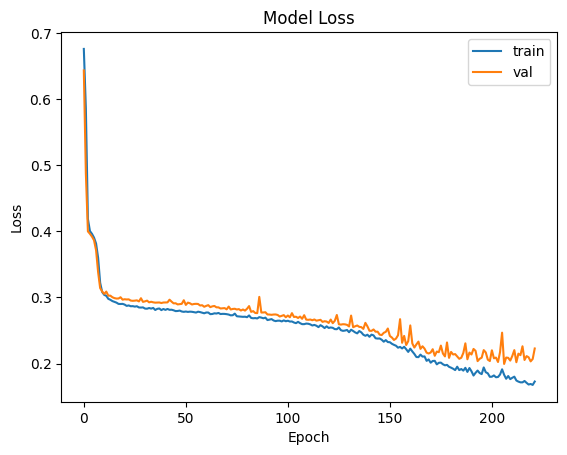

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

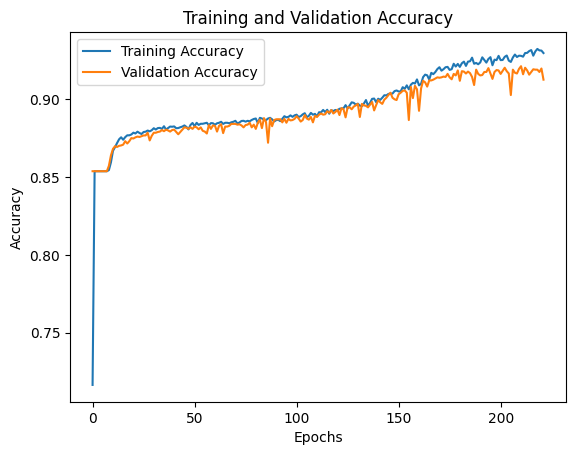

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 100)           1652400   
                                                                 
 lstm (LSTM)                 (None, 24, 100)           80400     
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                        

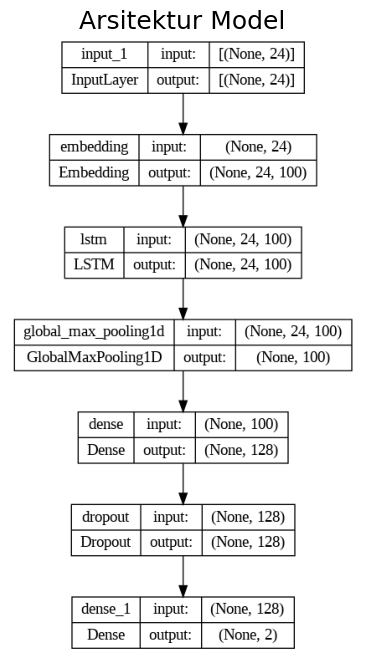

In [ ]:
from keras.utils import plot_model
file_name = 'arsitektur_model.png'
plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)
plt.figure(figsize=(8,8))
img = plt.imread(file_name)
plt.imshow(img)
plt.title('Arsitektur Model', fontsize=18)
plt.axis('off')
plt.savefig(file_name)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_val, y_pred_classes)
print("Classification Report:")
print(report)

127/127 [==============================] - 2s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3451
           1       0.76      0.66      0.70       591

    accuracy                           0.92      4042
   macro avg       0.85      0.81      0.83      4042
weighted avg       0.92      0.92      0.92      4042



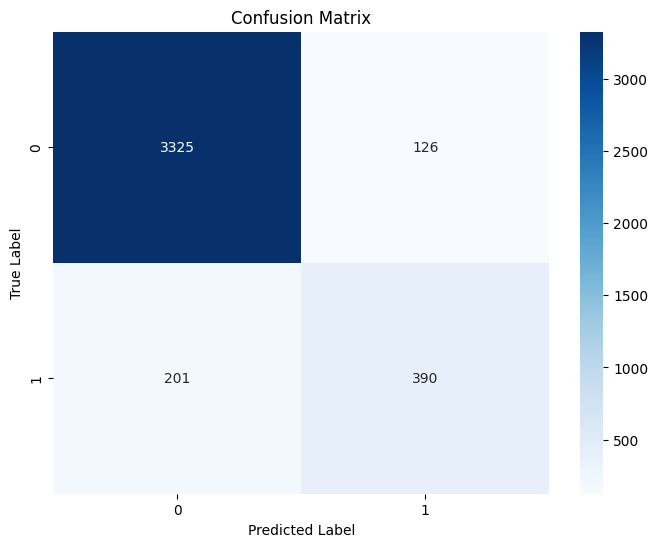

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("model_Amazon_Product_Reviews.h5")
word2vec_model.save("word2vec_model.model")
train_df.to_csv("train_data.csv", index=False)

# [Son](#b1)
